# Exercises

In [12]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

### Data preparation

To better organize the workflow and manage the numerous datasets in this notebook, we have created a loop that iterates through the datasets stored in the folder assigned to our group. It loads each dataset into a DataFrame object and stores them in a list of DataFrames. This allows us to iterate over the list if we want to perform operations on all 10 datasets, avoiding the need to read the datasets repeatedly.

In [13]:
# List to hold all DataFrames
dataframes = []

# Iterate over files in the directory
for f in os.listdir('./ProjectDatasets/Team_7'):
    if f.endswith('.csv'):  # Check if it's a CSV file
        df = pd.read_csv(os.path.join('./ProjectDatasets/Team_7', f))
        df['Company'] = os.path.splitext(f)[0]  # Add a Company column using the filename (without extension)
        # Ensure the 'Date' column is parsed as datetime
        df['Date'] = pd.to_datetime(df['Date'])
        dataframes.append(df)

We define the columns that are numerical and relative to the stock price, so we can call this list when we need it to iterate through these columns to make transformations.

In [14]:
num_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

We have also created a single combined DataFrame in case it proves useful for any exercise.

In [15]:
merged_df = pd.concat(dataframes, ignore_index=True)
columns = ['Company'] + [col for col in merged_df.columns if col != 'Company']
dfm = merged_df[columns]

#### Data Observation

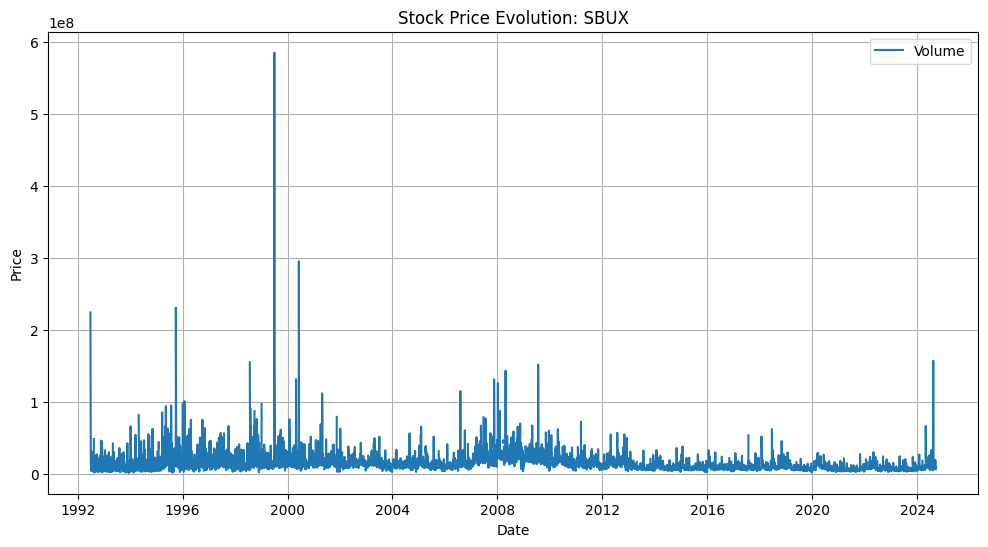

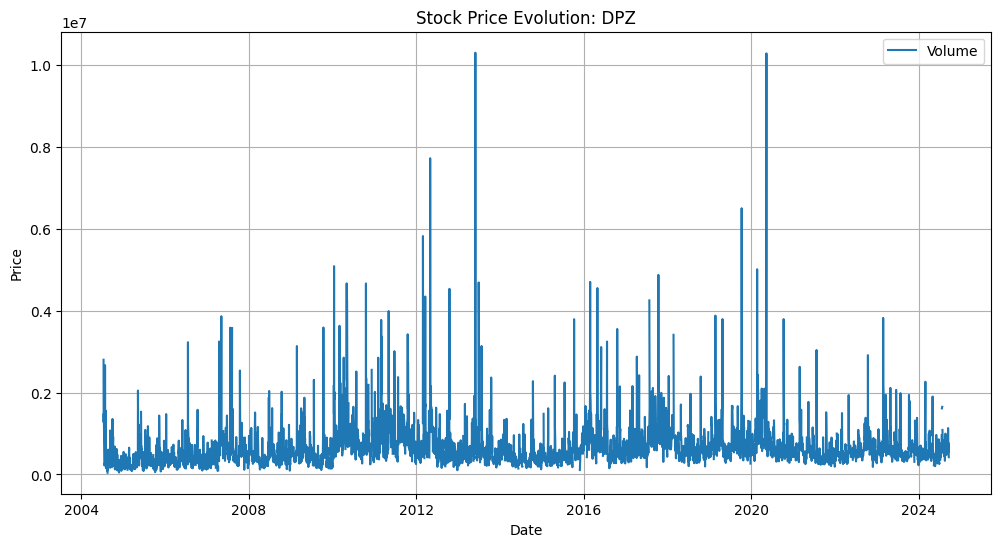

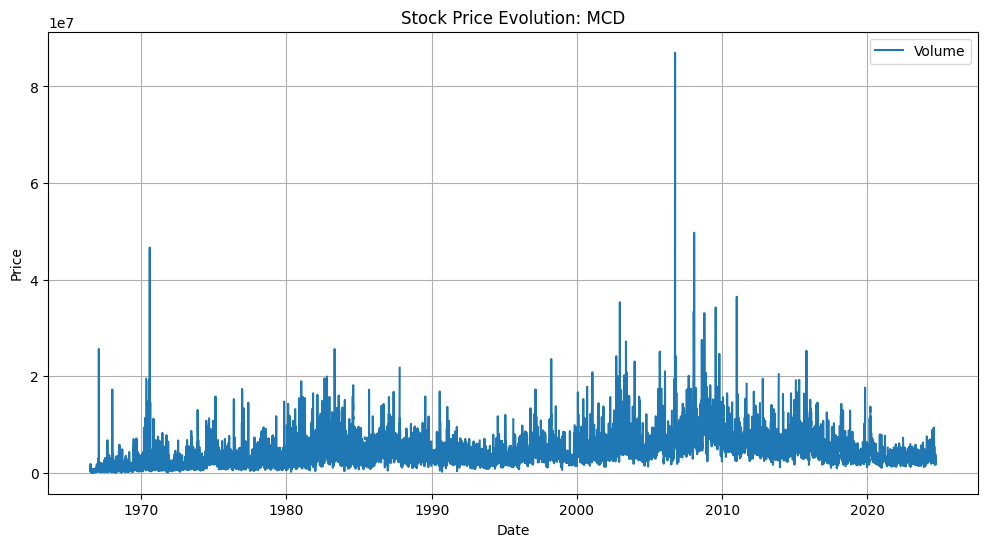

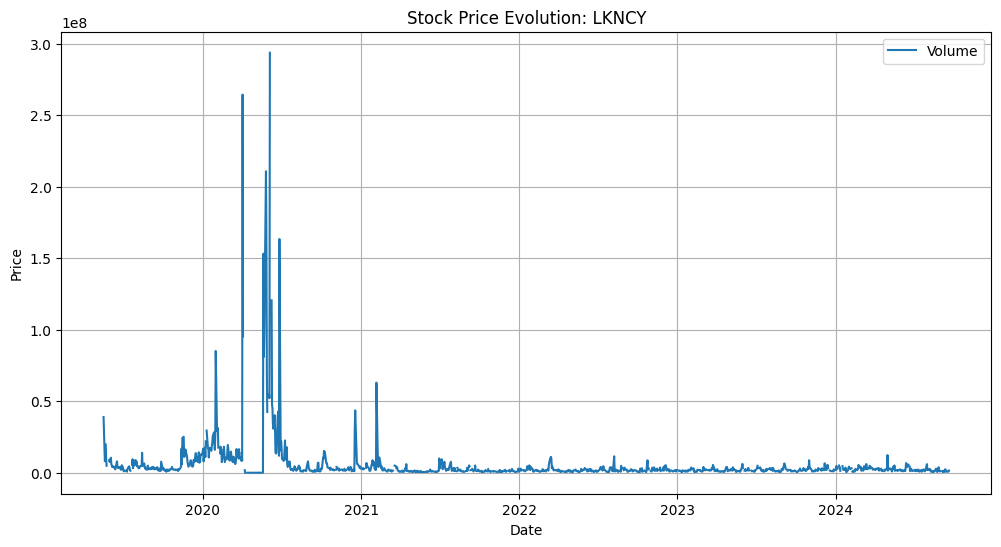

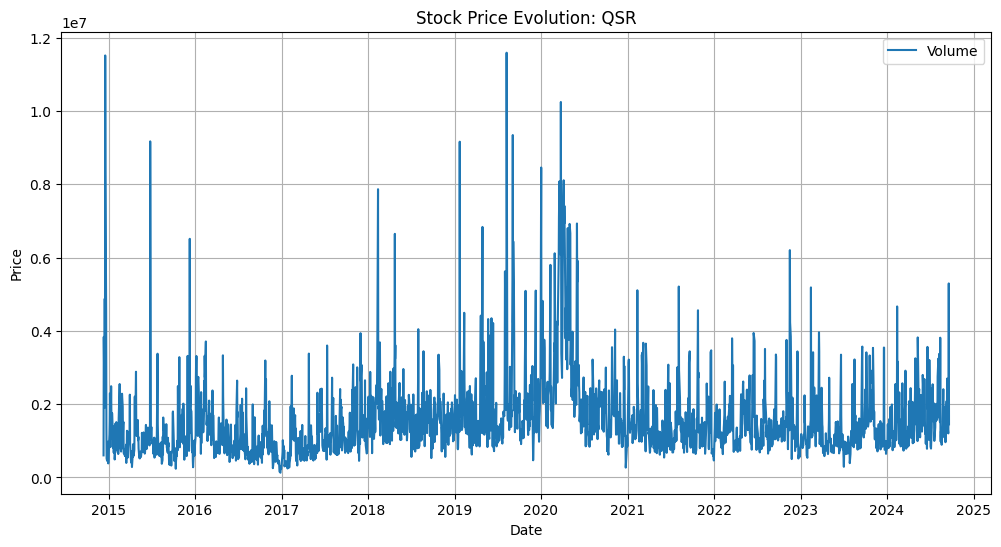

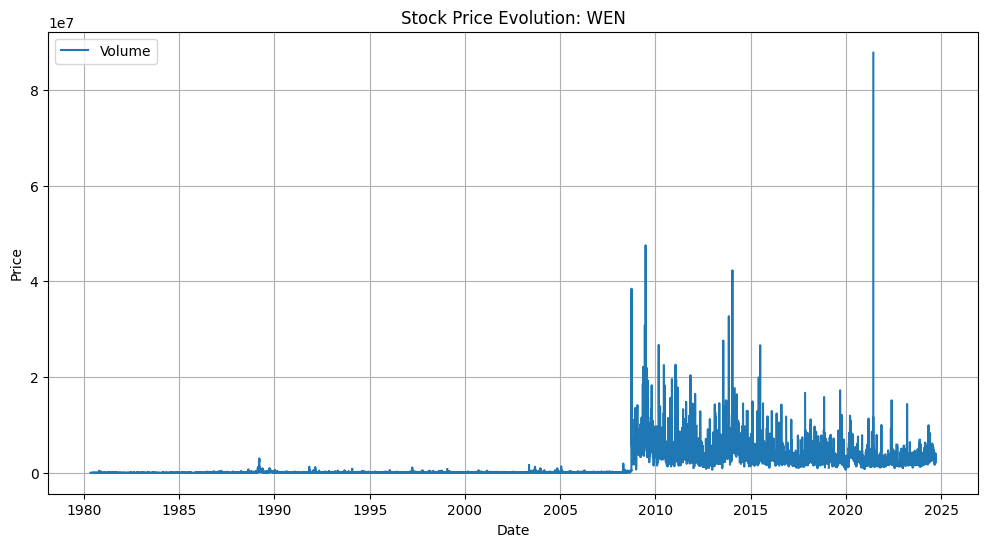

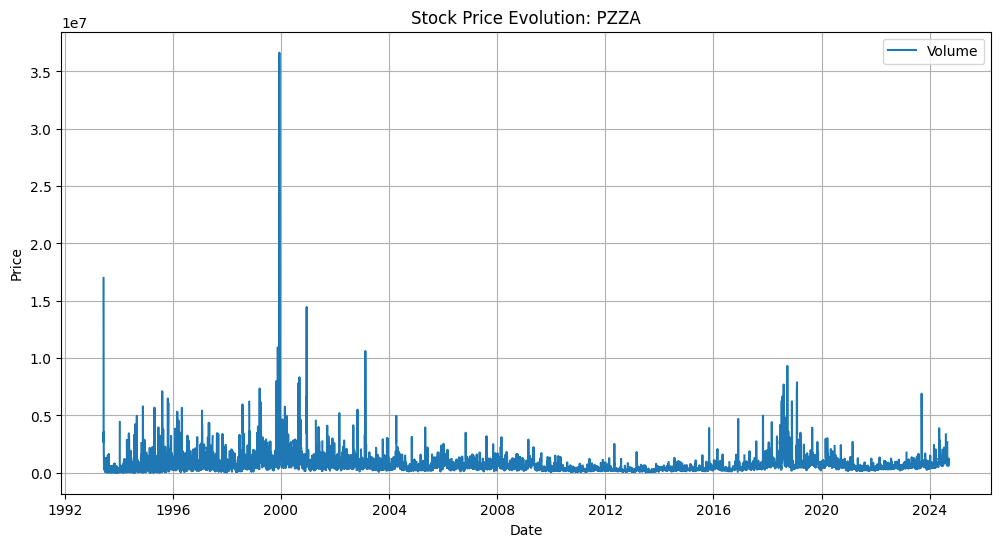

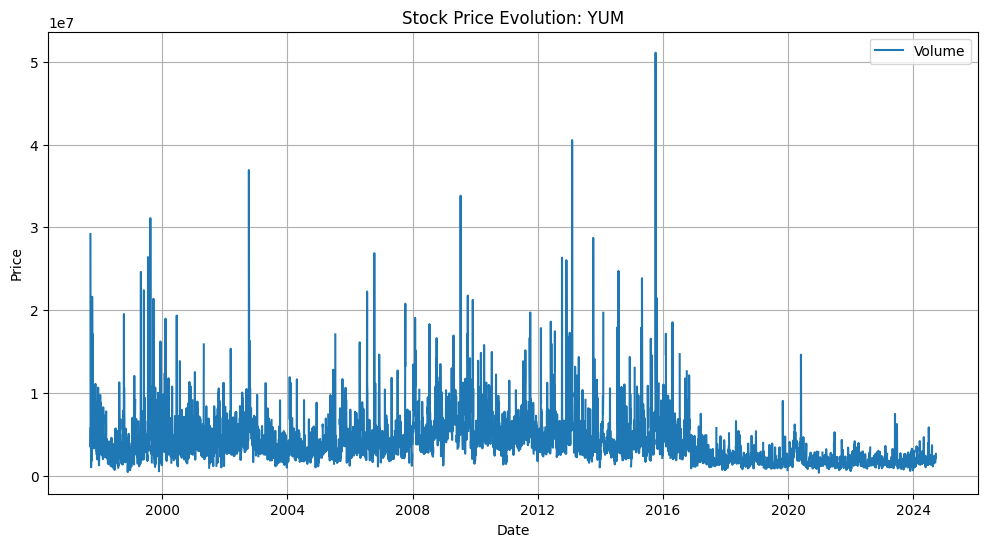

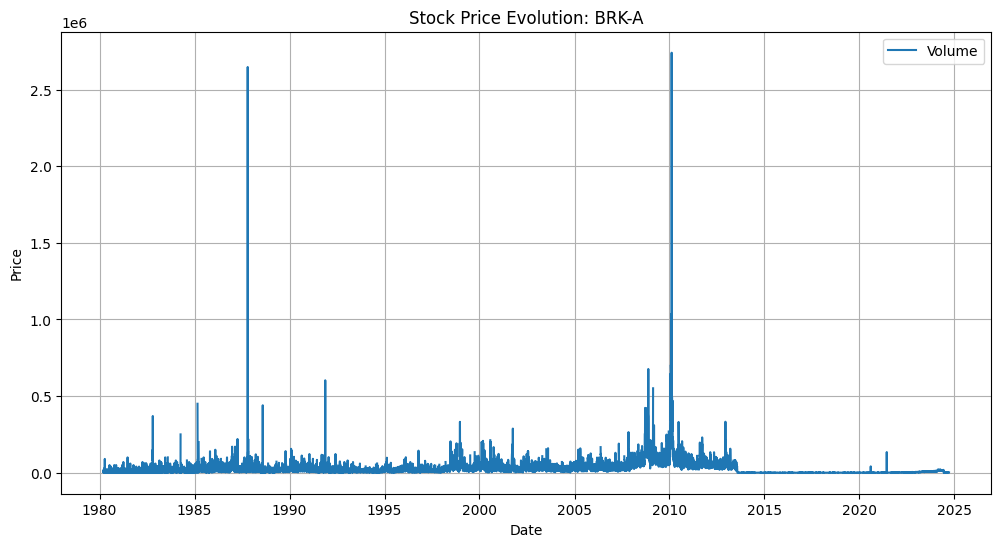

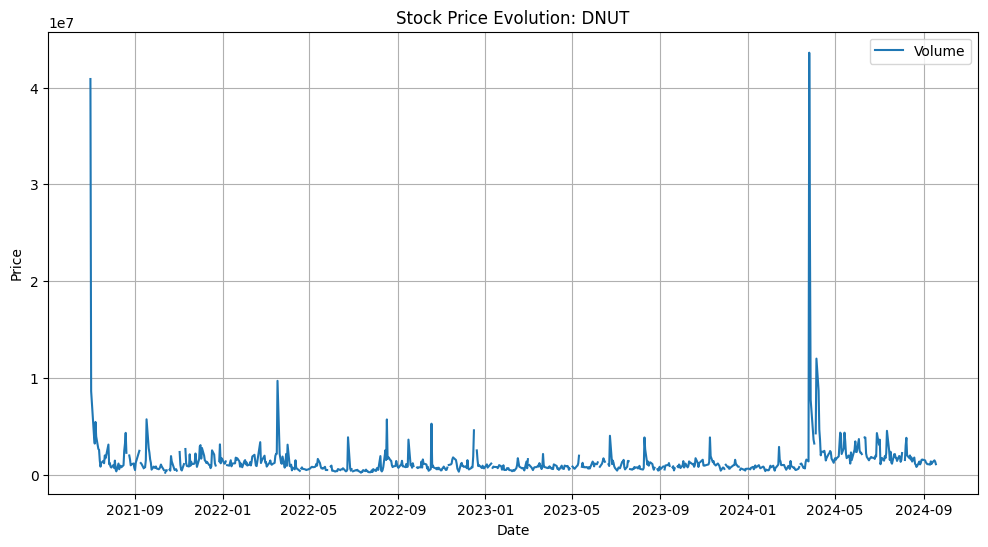

In [16]:
for df in dataframes:
    # Ensure the 'Date' column is parsed as datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort the data by date for proper plotting
    df.sort_values('Date', inplace=True)
    
    # Plot the line chart
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Volume'], label='Volume')
        
    # Chart formatting
    plt.title(f'Stock Price Evolution: {df["Company"][0]}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

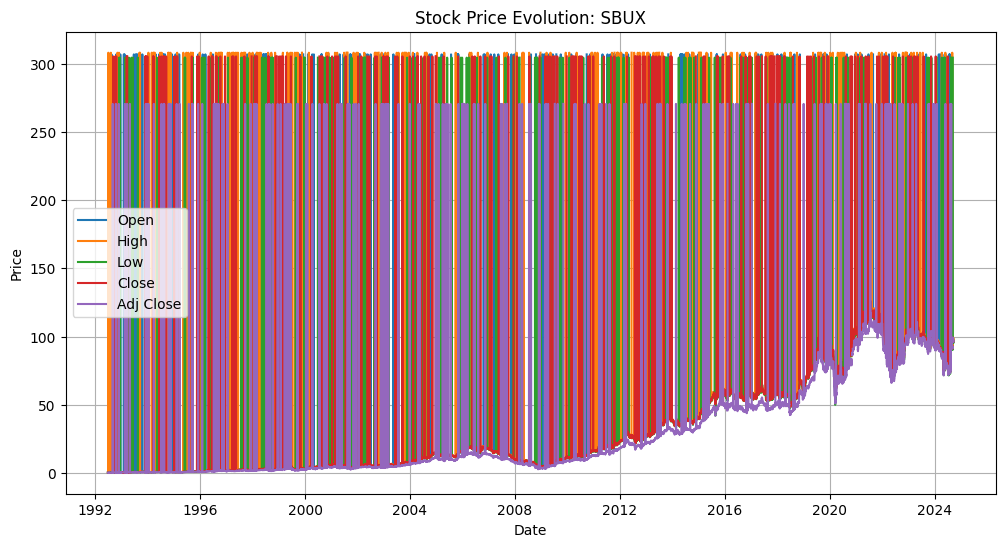

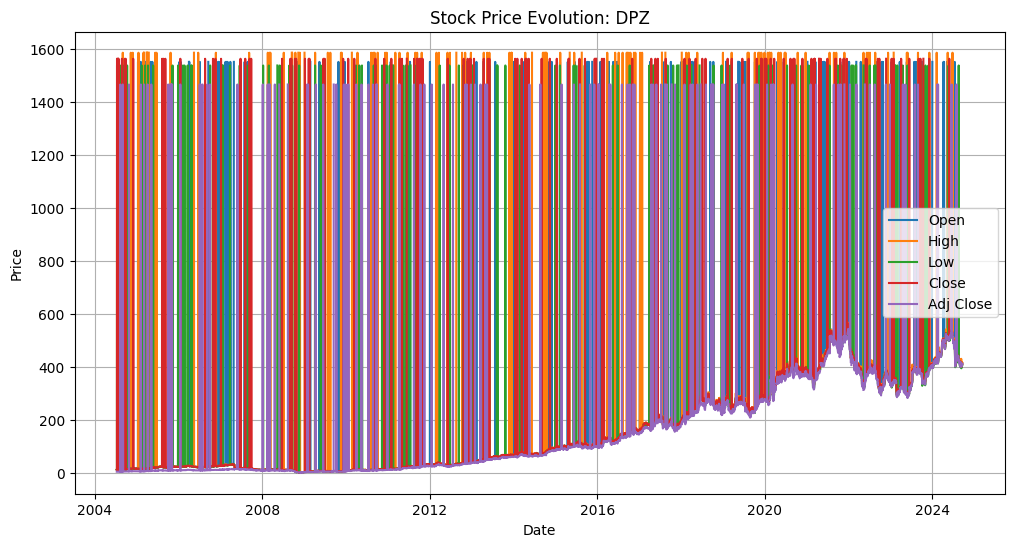

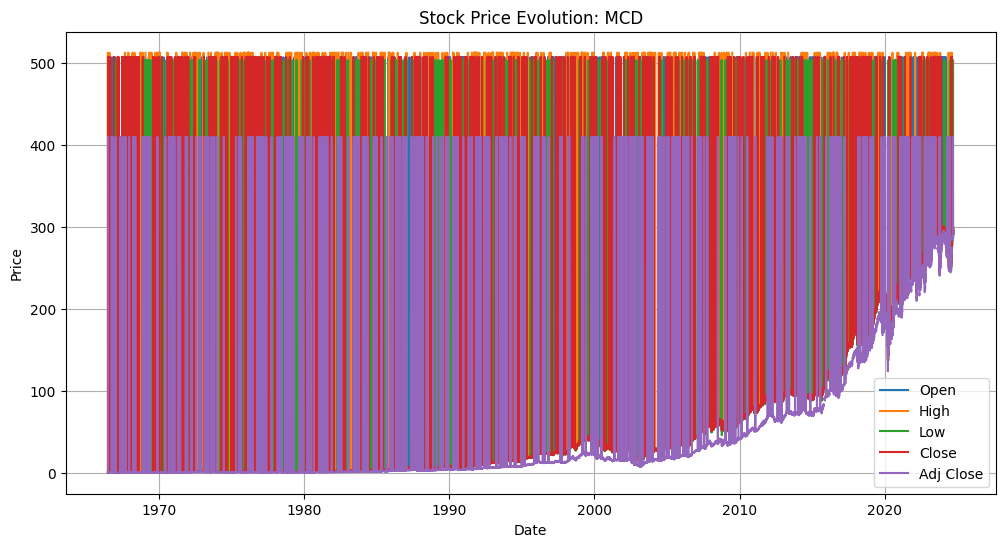

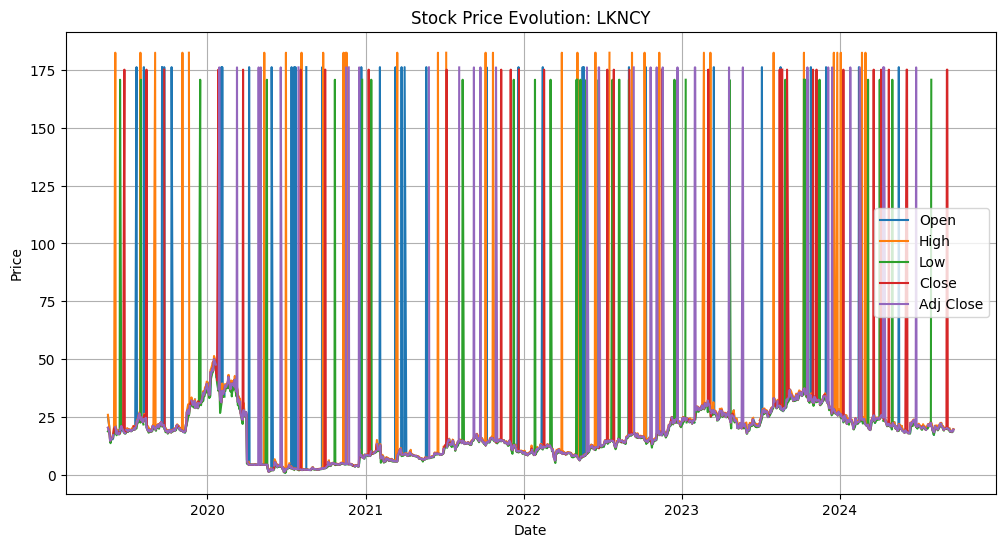

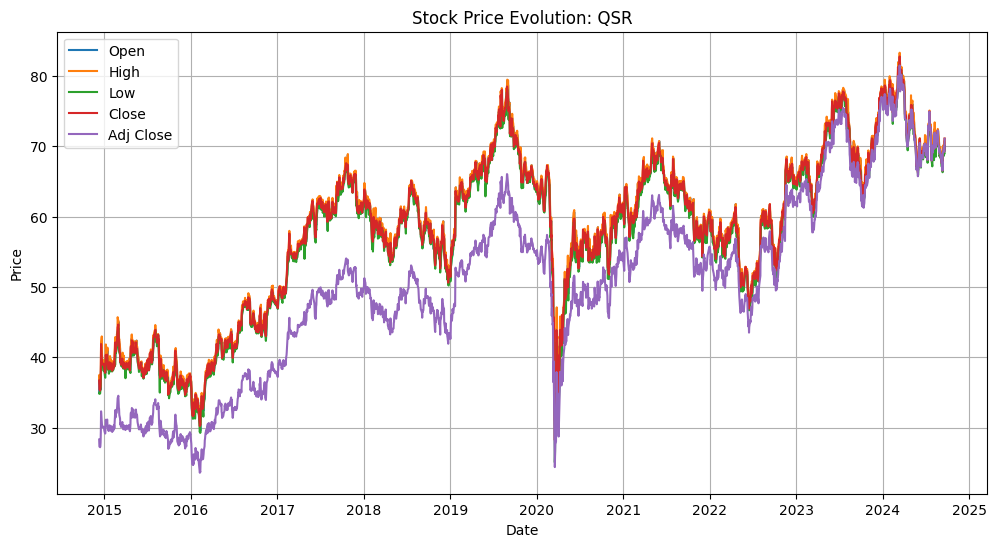

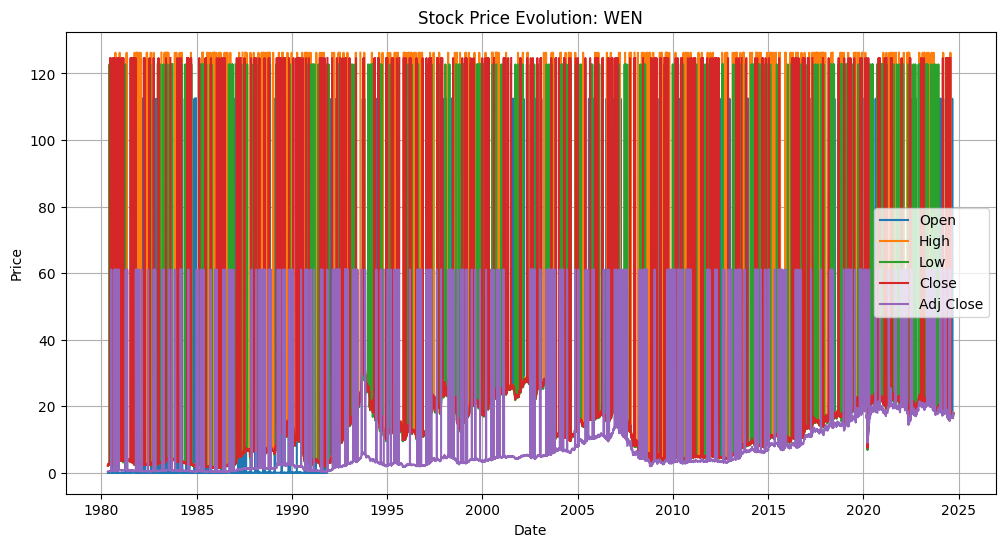

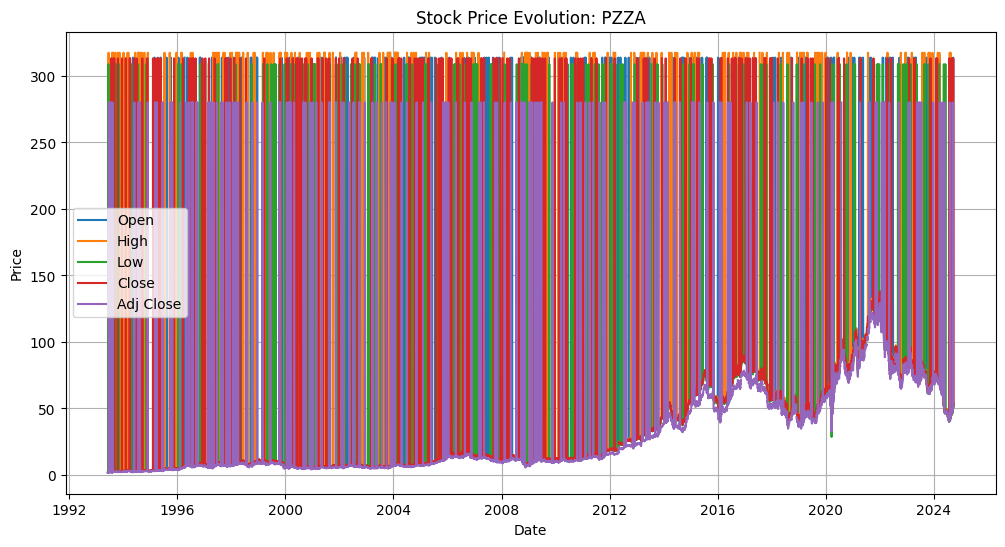

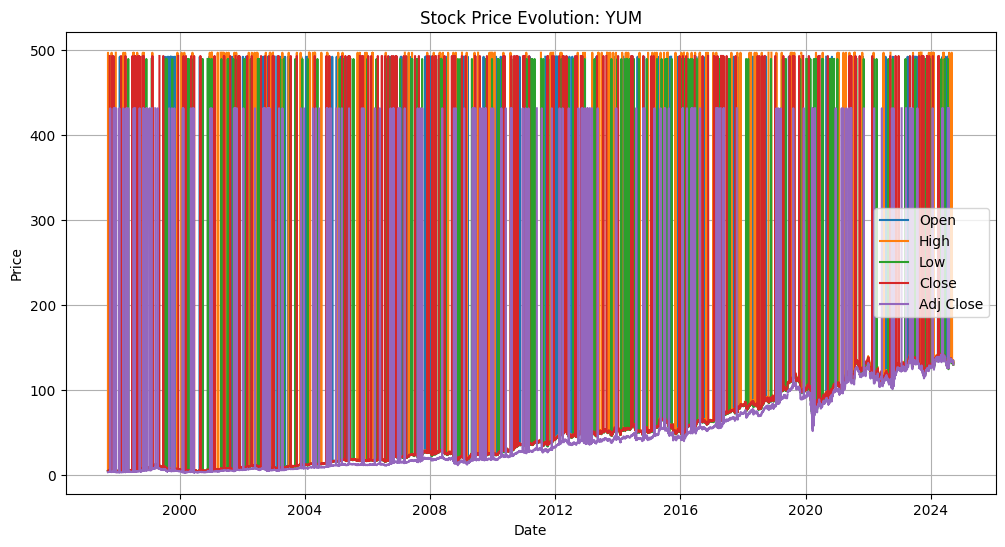

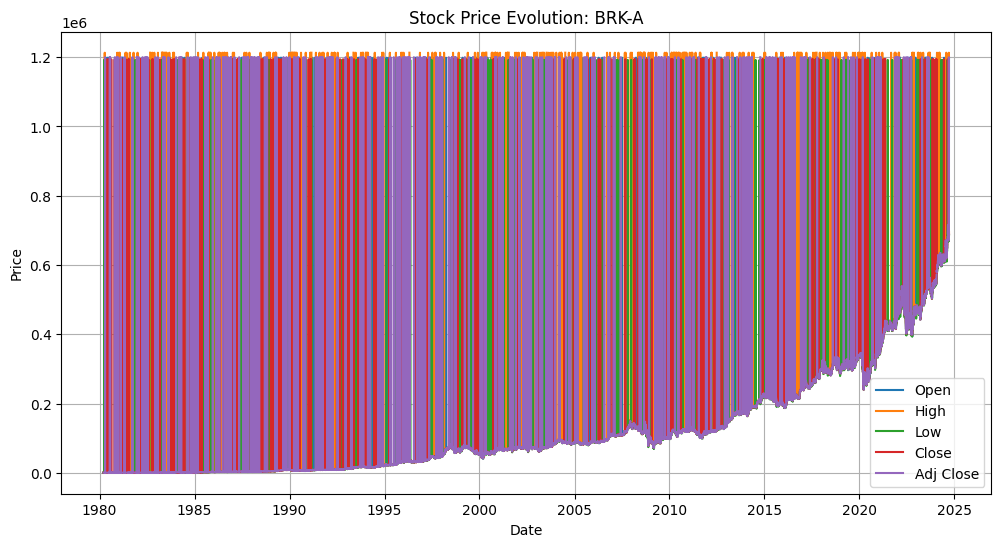

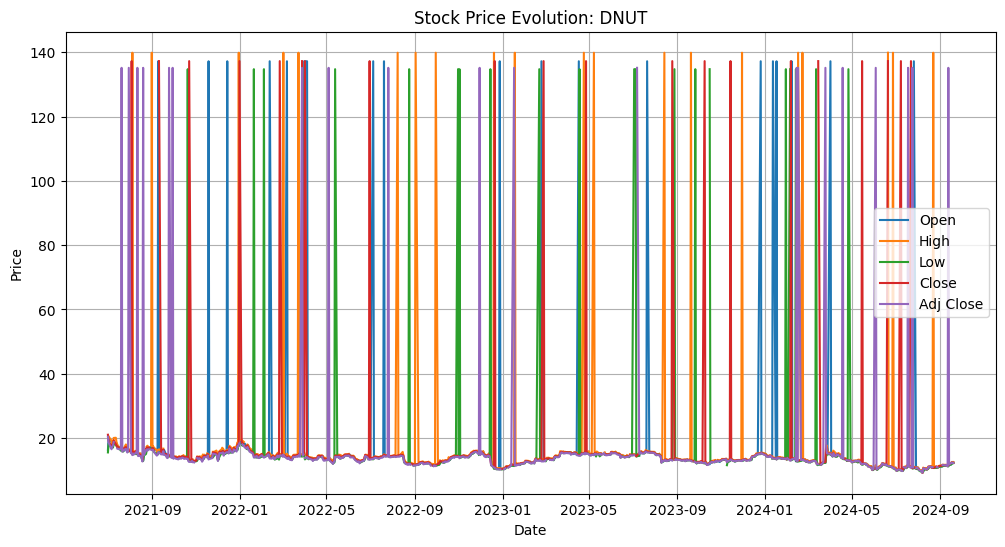

In [17]:
for df in dataframes:
    # Ensure the 'Date' column is parsed as datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort the data by date for proper plotting
    df.sort_values('Date', inplace=True)
    
    # Plot the line chart
    plt.figure(figsize=(12, 6))
    for variable in num_columns[:-1]:
        plt.plot(df["Date"], df[variable], label=variable)
    
    # Chart formatting
    plt.title(f'Stock Price Evolution: {df["Company"][0]}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Missing data

In [18]:
results = []
company_names = []

for df in dataframes:
    company_name = df["Company"][0]
    company_names.append(company_name)
    total_rows = len(df)
    null_percentages = (df.isnull().sum() / total_rows) * 100
    
    result = {"Company": company_name}
    result.update(null_percentages.to_dict())
    results.append(result)

final_df = pd.DataFrame(results, index=company_names)
final_df = final_df.round(2)
final_df

Company  Date  Open  High   Low  Close  Adj Close  Volume
SBUX       0.0   0.0  4.85  4.84  4.88   4.95       4.88    5.00
DPZ        0.0   0.0  4.83  4.87  4.89   4.87       4.91    4.99
MCD        0.0   0.0  4.90  4.88  4.89   4.81       4.89    5.00
LKNCY      0.0   0.0  4.81  4.96  4.89   4.67       4.89    4.96
QSR        0.0   0.0  0.00  0.00  0.00   0.00       0.00    0.00
WEN        0.0   0.0  4.89  4.83  4.86   4.91       4.88    4.99
PZZA       0.0   0.0  4.76  4.83  4.88   4.90       4.86    5.00
YUM        0.0   0.0  4.90  4.87  4.88   4.94       4.87    5.01
BRK-A      0.0   0.0  4.89  4.85  4.93   4.87       4.85    5.00
DNUT       0.0   0.0  5.03  4.79  4.91   4.79       4.91    4.91

As we can observe, there are around 5% missing observations for each variable in each company, except for the company QSR, which has no missing data.

#### Manually manipulated data ranges

With the help of the visualizations above, we identified some manually manipulated ranges of data, where the scale for Volume variable was clearly changed applying what we think is probably a multiplier. In the case of WEN, apart from the Volume, we think the Open Price variable was also manipulated setting to 0 the first values.

In [19]:
window_size = 3
threshold = 0.80

change_range_df = dataframes[6][(dataframes[6]["Date"].dt.year > 2011) & (dataframes[6]["Date"].dt.year <= 2013)]

rolling_mean = change_range_df["Volume"].rolling(window=window_size, center=True).mean()


# rolling_mean = rolling_mean.fillna(method='bfill').fillna(method='ffill')

relative_change = abs(change_range_df["Volume"] - rolling_mean) / rolling_mean
change_scaling_index = relative_change.sort_values(ascending=False).index[0]

# Calculate the proportion
former_scale = dataframes[6].loc[change_scaling_index-3:change_scaling_index-1]["Volume"].mean()
new_scale = dataframes[6].loc[change_scaling_index:change_scaling_index+2]["Volume"].mean()
proportion = former_scale / new_scale

# Apply the scaling to the "Volume" column from index 8416 onward
dataframes[6].loc[change_scaling_index:, "Volume"] = dataframes[6].loc[change_scaling_index:, "Volume"].apply(lambda x: x * proportion)


In [22]:
dataframes[3].loc[7166-3:7166+3]

KeyError: 7163

In [25]:
window_size = 3
threshold = 0.80

change_range_df = dataframes[3][(dataframes[3]["Date"].dt.year >= 2007) & (dataframes[3]["Date"].dt.year <= 2010)]

rolling_mean = change_range_df["Volume"].rolling(window=window_size, center=True).mean()


# rolling_mean = rolling_mean.fillna(method='bfill').fillna(method='ffill')

relative_change = abs(change_range_df["Volume"] - rolling_mean) / rolling_mean
change_scaling_index = relative_change.sort_values(ascending=False).index[0]

# Calculate the proportion
former_scale = dataframes[3].loc[change_scaling_index-3:change_scaling_index-1]["Volume"].mean()
new_scale = dataframes[3].loc[change_scaling_index:change_scaling_index+2]["Volume"].mean()
proportion = former_scale / new_scale

# Apply the scaling to the "Volume" column from index 8416 onward
dataframes[3].loc[change_scaling_index:, "Volume"] = dataframes[3].loc[change_scaling_index:, "Volume"].apply(lambda x: x * proportion)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
change_scaling_index

np.int64(4923)

In [24]:
proportion

np.float64(0.8043143297380585)

In [25]:
dataframes[6]

Date        Open       High         Low       Close  Adj Close  \
0    1993-06-08    2.000000   2.055556    1.888889    1.944444   1.635053   
1    1993-06-09    2.000000        NaN    1.944444    2.194444   1.845275   
2    1993-06-10    2.250000   2.333333    2.055556    2.111111   1.775201   
3    1993-06-11    2.083333   2.277778    2.083333    2.250000   1.891991   
4    1993-06-14    2.305556   2.333333  308.784322    2.333333   1.962063   
...         ...         ...        ...         ...         ...        ...   
7873 2024-09-13   49.220001  50.330002   48.889999   49.599998  49.599998   
7874 2024-09-16  313.769146  51.410000   49.849998   50.799999  50.799999   
7875 2024-09-17   50.959999  53.139999   50.799999  313.218641  52.560001   
7876 2024-09-18   52.709999  53.730000   52.090000   52.250000  52.250000   
7877 2024-09-19   53.389999  53.389999   51.480000   51.680000  51.680000   

            Volume Company  
0     1.698660e+07    PZZA  
1     2.650500e+06    PZZA  
2     3.562200e+06    PZZA  
3     1.931400e+06    PZZA  
4     7.308000e+05    PZZA  
...            ...     ...  
7873  7.355455e+05    PZZA  
7874  6.720851e+05    PZZA  
7875  9.848025e+05    PZZA  
7876  7.160810e+05    PZZA  
7877  7.194592e+05    PZZA  

[7883 rows x 8 columns]

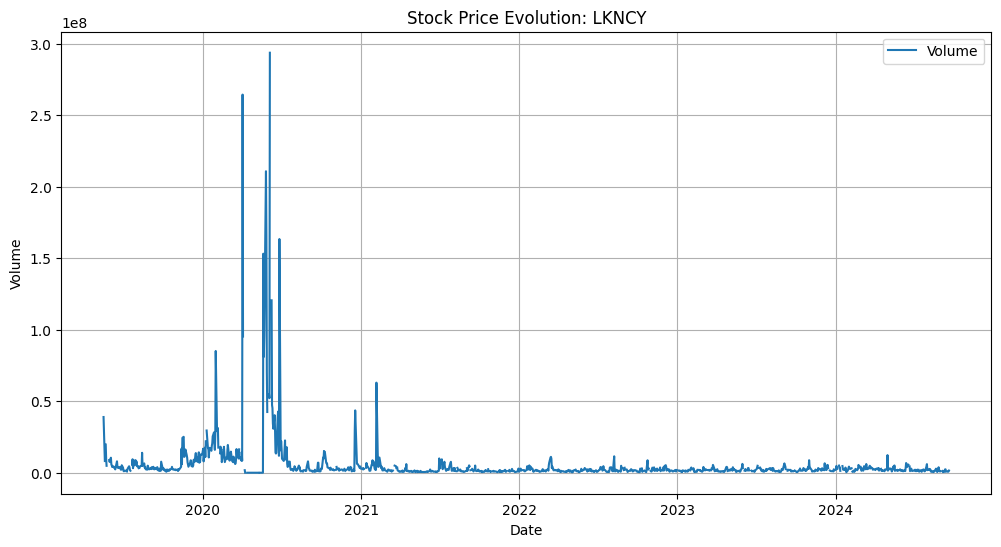

In [26]:
# Ensure the 'Date' column is parsed as datetime
dataframes[3]['Date'] = pd.to_datetime(dataframes[3]['Date'])

# Sort the data by date for proper plotting
dataframes[3].sort_values('Date', inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(dataframes[3]['Date'], dataframes[3]['Volume'], label='Volume')
    
# Chart formatting
plt.title(f"Stock Price Evolution: {dataframes[3]["Company"][0]}")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

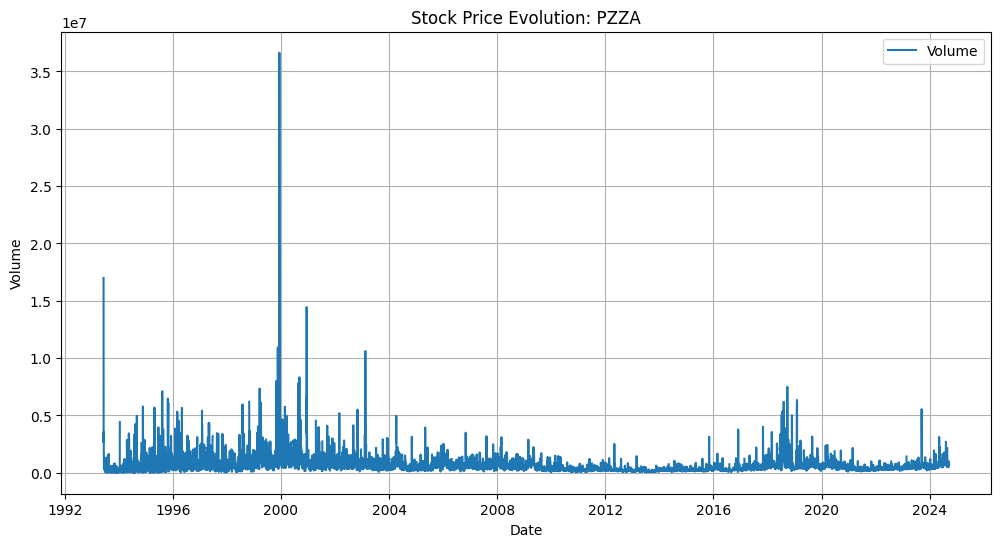

In [11]:
# Ensure the 'Date' column is parsed as datetime
dataframes[6]['Date'] = pd.to_datetime(dataframes[6]['Date'])

# Sort the data by date for proper plotting
dataframes[6].sort_values('Date', inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(dataframes[6]['Date'], dataframes[6]['Volume'], label='Volume')
    
# Chart formatting
plt.title(f"Stock Price Evolution: {dataframes[6]['Company'][0]}")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [765]:
# # Calculate percentage change
# dataframes[6]["Volume_Change"] = dataframes[6]["Volume"].pct_change()

# # Filter out infinity values and find the index of the max value
# max_change_index = dataframes[6][dataframes[6]["Volume_Change"] != float('inf')]["Volume_Change"].idxmax()

# print(f"The index with the highest percentage change (excluding infinity) is: {max_change_index}")


#### Outliers

First, we need to identify whether there are outliers in the datasets and how they are distributed. To do this, we use boxplots for each variable and each company.

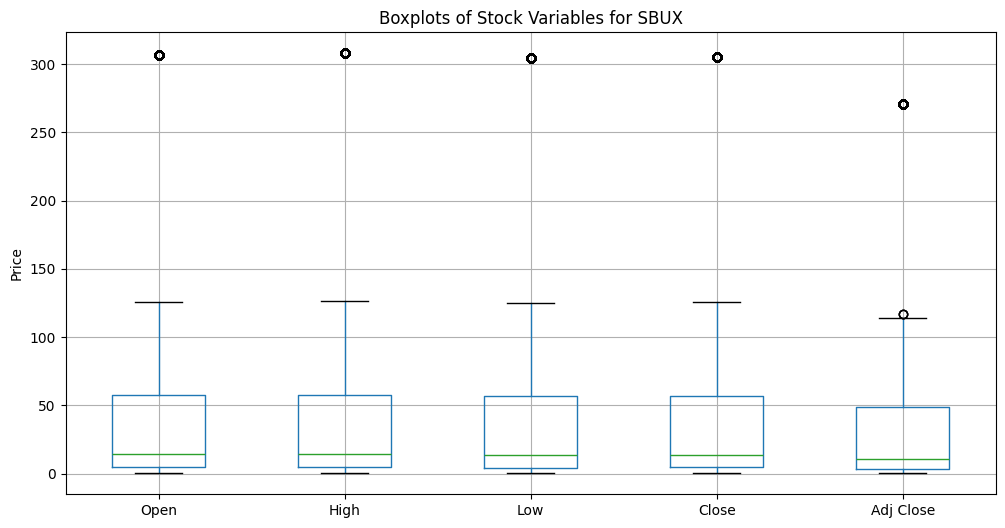

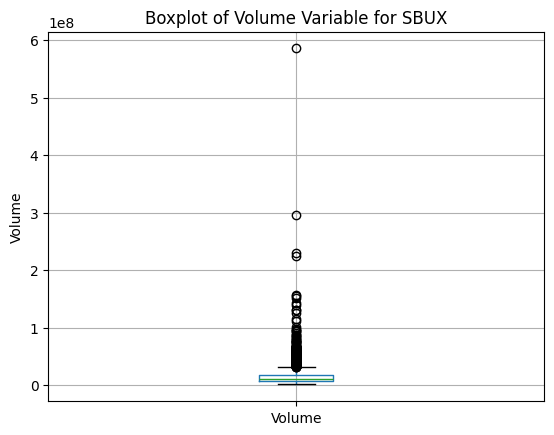

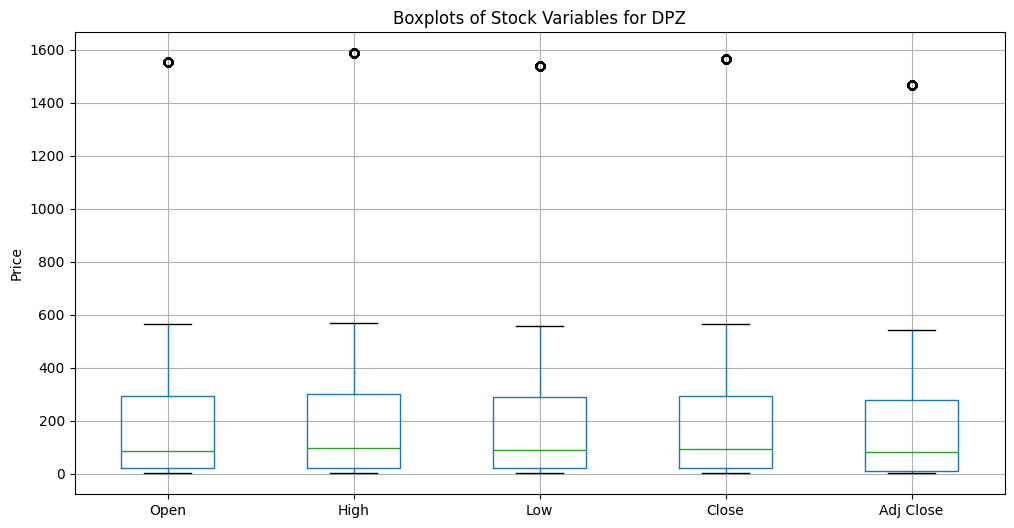

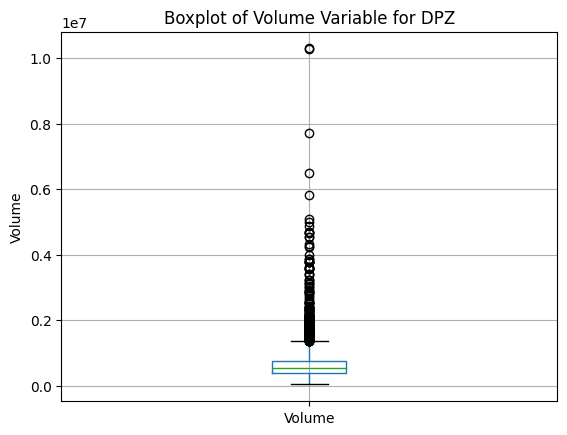

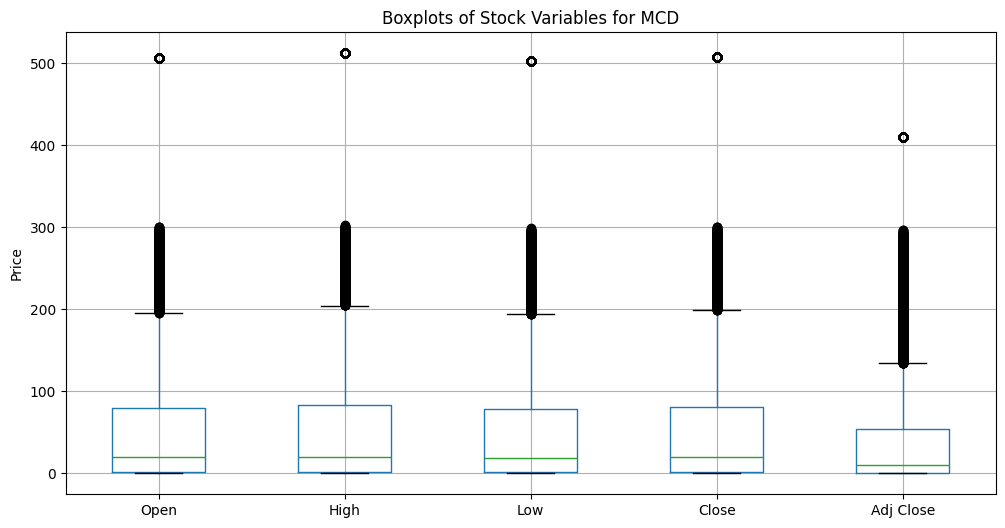

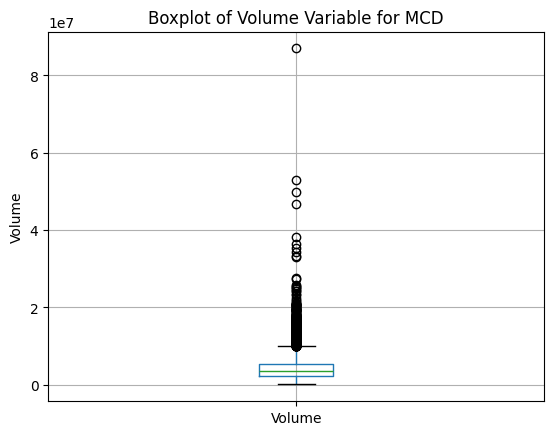

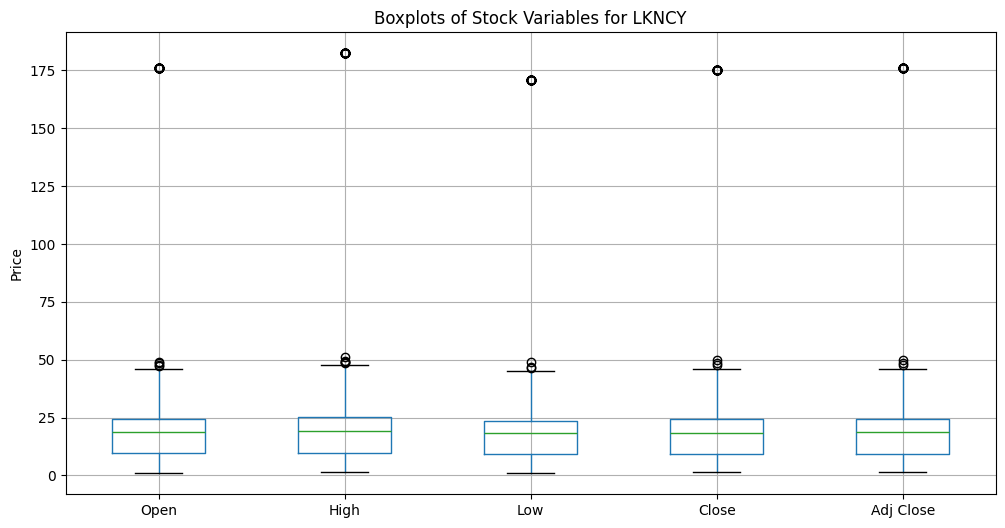

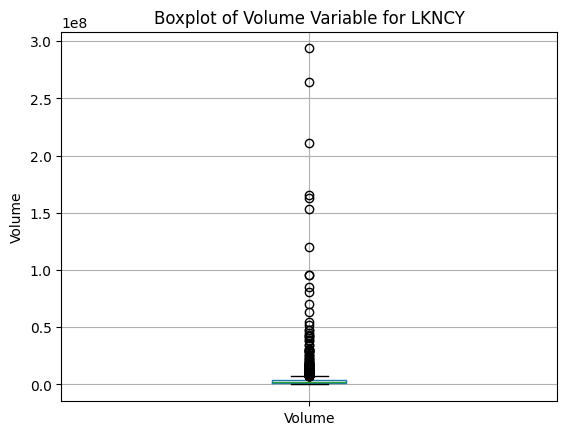

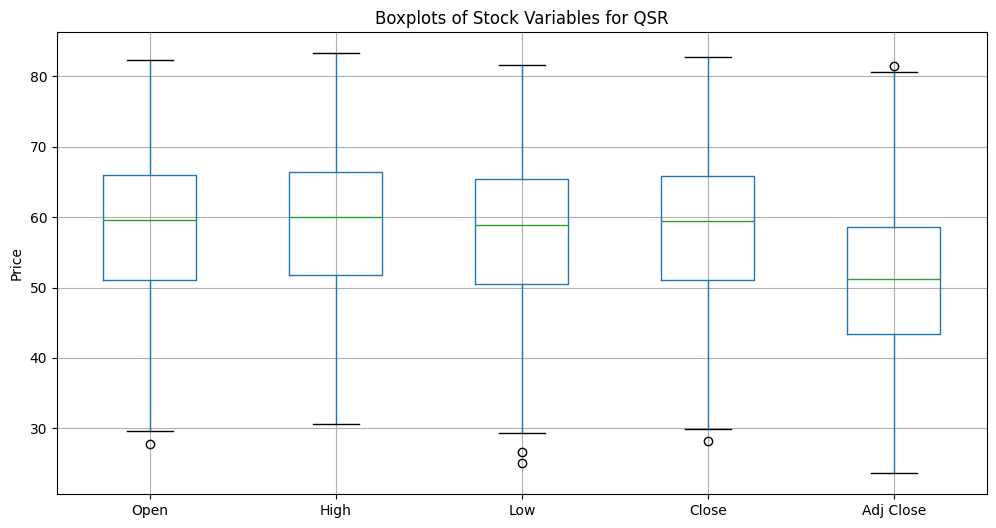

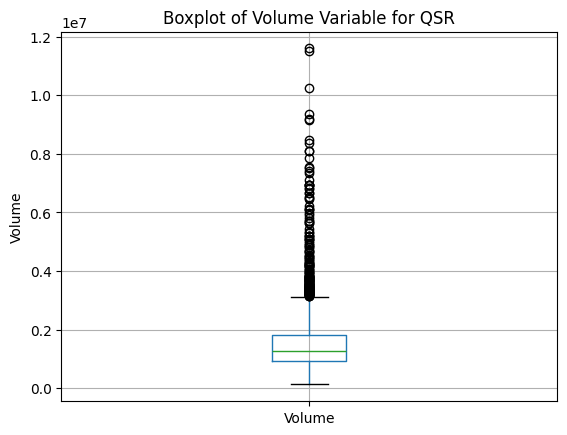

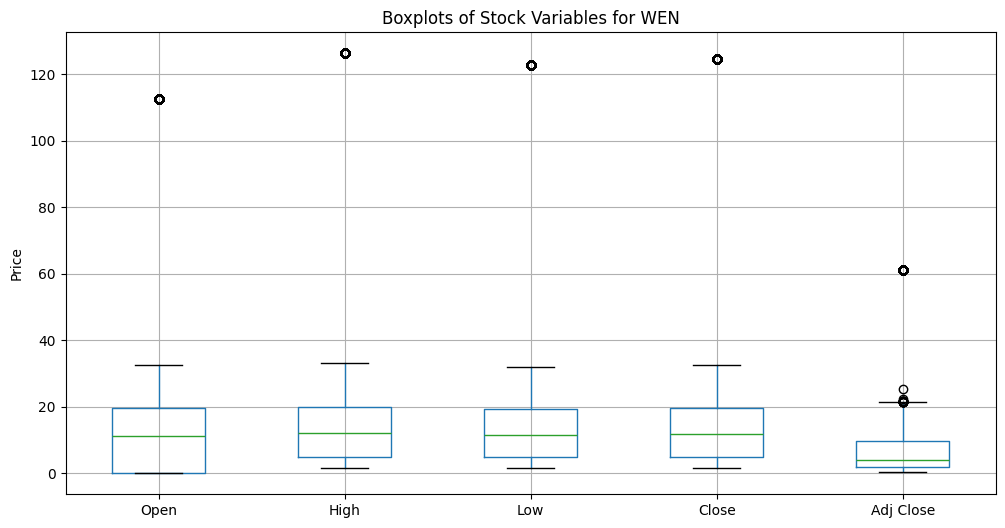

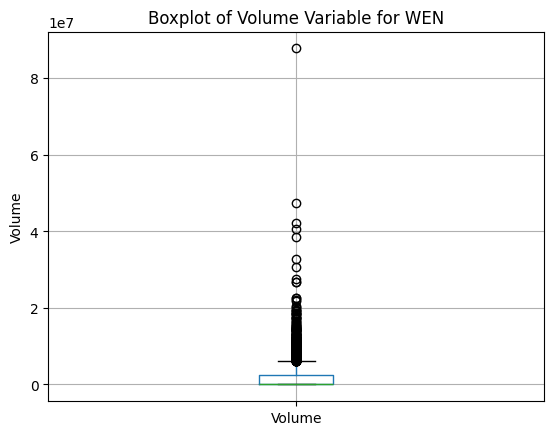

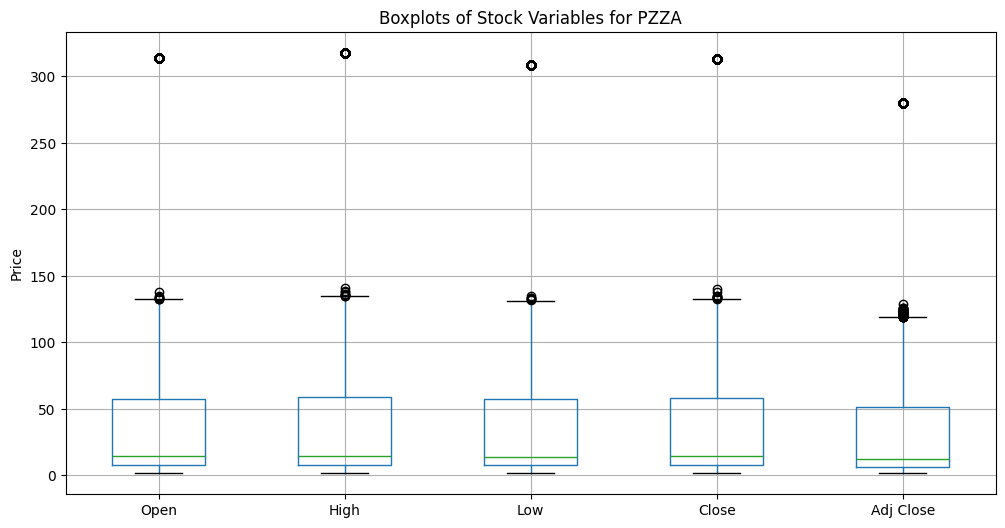

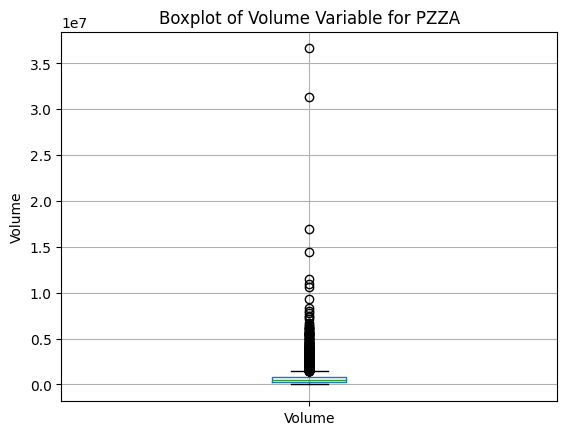

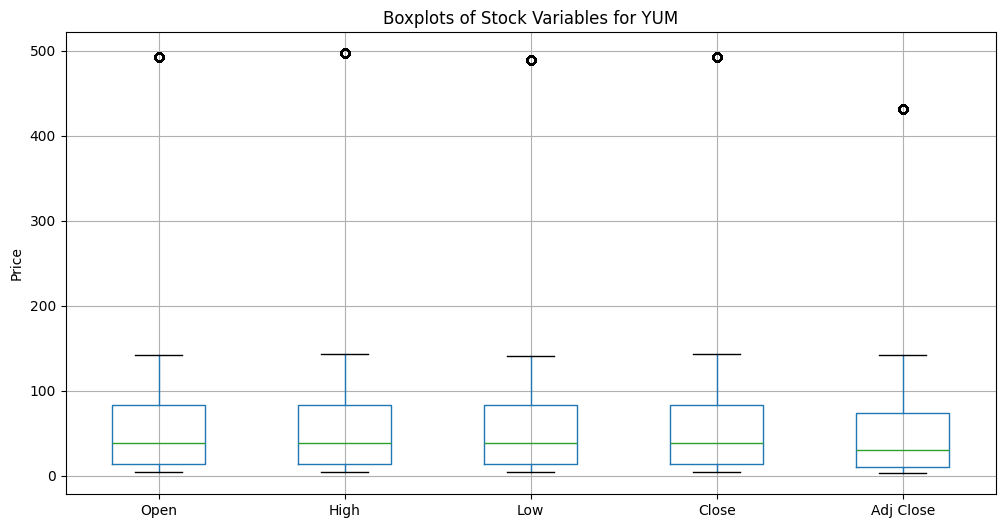

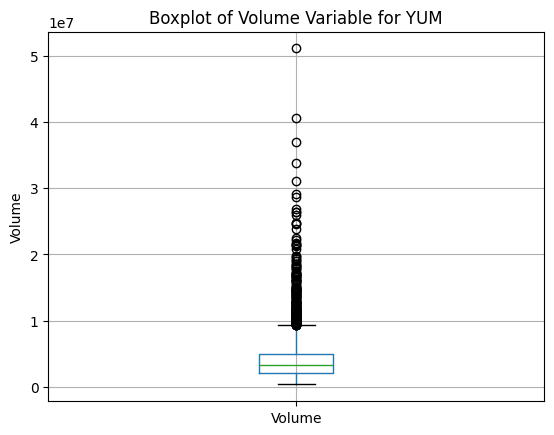

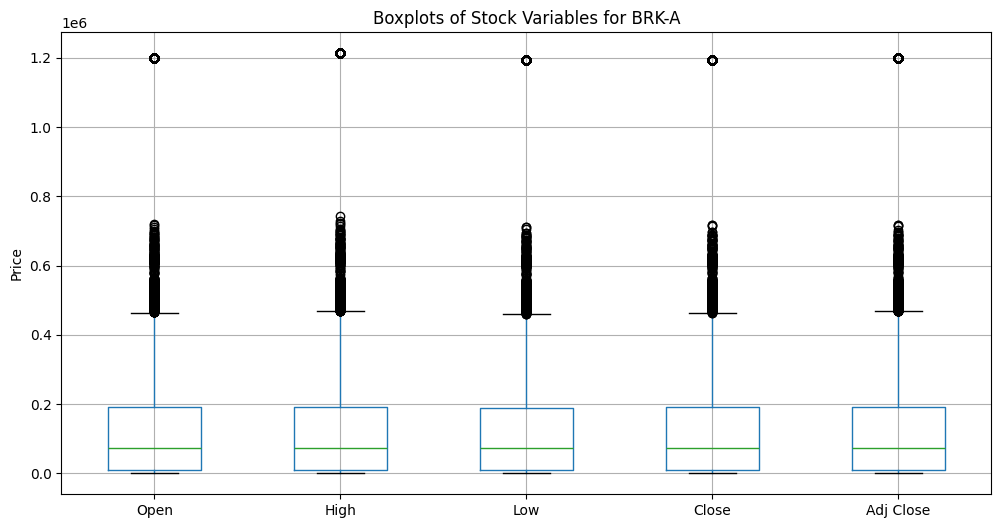

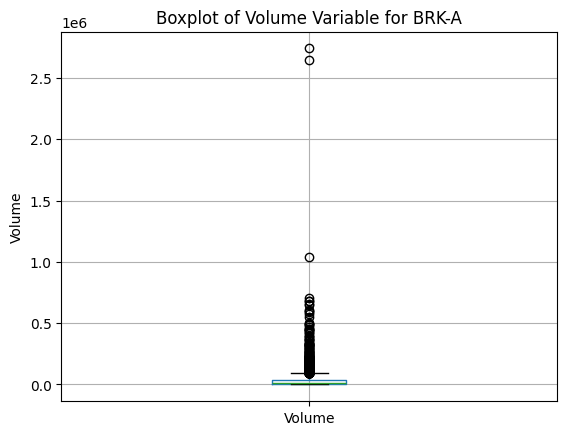

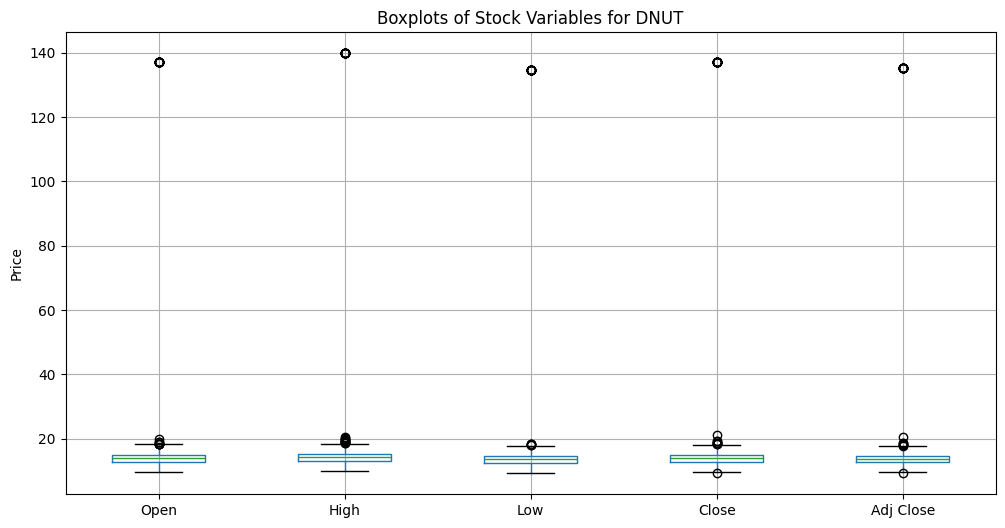

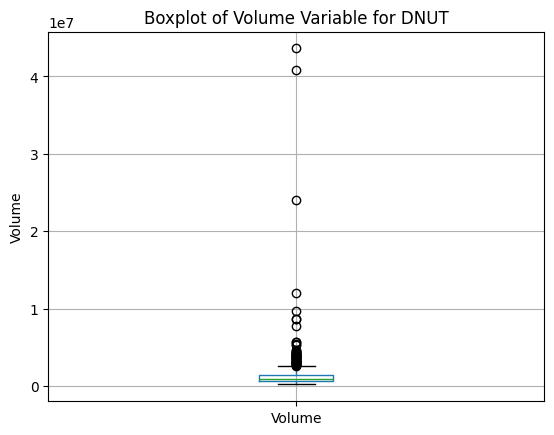

In [27]:
for df in dataframes:
    company_name = df["Company"][0]
    
    # Create a boxplot for each variable
    plt.figure(figsize=(12, 6))
    df[num_columns[:-1]].boxplot()
    plt.title(f"Boxplots of Stock Variables for {company_name}")
    plt.ylabel('Price')
    plt.grid(True, axis='y')
    plt.show()

    plt.figure()
    df[["Volume"]].boxplot()
    plt.title(f"Boxplot of Volume Variable for {company_name}")
    plt.ylabel('Volume')
    plt.grid(True, axis='y')
    plt.show()

It can be observed that all datasets, except for the one from the company QSR, exhibit significant outliers. For the other nine companies, these outliers are located above the 75th percentile, falling into specific ranges considerably higher than this threshold.

To detect outliers and replace them with missing values, given the context of financial time series, we have opted for an approach utilizing sliding windows. The use of sliding windows in financial time series allows us to capture local trends and adapt to dynamic changes in the data, such as seasonal variations or periods of high volatility. This is achieved by using a sliding window (`rolling window`) to calculate the **local median** of each numeric column and comparing the current values to this central trend.

The criterion for identifying an outlier is based on the **relative change**, which measures how much a value deviates from the median relative to its magnitude. If the relative change exceeds a predefined threshold, the value is considered an outlier.

Process Steps
1. **Calculate the sliding median (`rolling_median`)**:
   - A sliding window of size `window_size` is used to calculate the median at each point in the time series.
   - The median is chosen instead of the mean because it is more robust to extreme values (outliers), preventing these values from affecting the central reference.

2. **Fill NaN values at the edges**:
   - Sliding windows produce `NaN` values at the edges of the series, so these are filled using forward (`bfill`) and backward (`ffill`) interpolations to maintain continuity.

3. **Calculate the relative change**:
   - The relative change is defined as:
     $$
     \text{Relative Change} = \frac{|x_t - \text{rolling\_median}|}{\text{rolling\_median}}
     $$
   - This value measures how far a point is from the local central trend.

4. **Identify outliers**:
   - A value is considered an outlier if its relative change exceeds a predefined threshold (`threshold`, e.g., 0.25 or 25%, making the detection highly sensitive).

5. **Replace outliers with `NaN`**:
   - Values identified as outliers are replaced with `NaN` in the DataFrame to prevent them from impacting future analyses.

We used higher `window_size` and `threshold` to manage outliers on the Volume variable, as the scale is different.

In [28]:
window_size = 30
threshold = 1

for df in dataframes:
    print(df["Company"][0])
    print(f"Rows in {df["Company"][0]}: {df.shape[0]}")
    print(df.isnull().sum())

    rolling_median = df["Volume"].rolling(window=window_size, center=True).median()
    rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')

    relative_change = abs(df["Volume"] - rolling_median) / rolling_median

    outliers = relative_change > threshold
    print(f"Outliers detected in {"Volume"}: {outliers.sum()}")

    df.loc[outliers, "Volume"] = np.nan

    print(df.isnull().sum())
    print("******************************************************************************")


SBUX
Rows in SBUX: 8122
Date           0
Open         394
High         393
Low          396
Close        402
Adj Close    396
Volume       406
Company        0
dtype: int64
Outliers detected in Volume: 609
Date            0
Open          394
High          393
Low           396
Close         402
Adj Close     396
Volume       1015
Company         0
dtype: int64
******************************************************************************
DPZ
Rows in DPZ: 5088
Date           0
Open         246
High         248
Low          249
Close        248
Adj Close    250
Volume       254
Company        0
dtype: int64
Outliers detected in Volume: 425
Date           0
Open         246
High         248
Low          249
Close        248
Adj Close    250
Volume       679
Company        0
dtype: int64
******************************************************************************
MCD
Rows in MCD: 14657
Date           0
Open         718
High         715
Low          716
Close        705
Adj Close    717
V

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/1254363800.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/1254363800.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/1254363800.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/1254363800.py:10: FutureWarning: Series.fillna with

In [29]:
window_size = 10
threshold = 0.25

for df in dataframes:
    print(df["Company"][0])
    print(f"Rows in {df["Company"][0]}: {df.shape[0]}")
    print(df.isnull().sum())

    for column in num_columns[:-1]:

        rolling_median = df[column].rolling(window=window_size, center=True).median()
        rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')

        relative_change = abs(df[column] - rolling_median) / rolling_median

        outliers = relative_change > threshold
        print(f"Outliers detected in {column}: {outliers.sum()}")

        df.loc[outliers, column] = np.nan

    print(df.isnull().sum())
    print("******************************************************************************")


SBUX
Rows in SBUX: 8122
Date            0
Open          394
High          393
Low           396
Close         402
Adj Close     396
Volume       1015
Company         0
dtype: int64
Outliers detected in Open: 220
Outliers detected in High: 211
Outliers detected in Low: 247
Outliers detected in Close: 223
Outliers detected in Adj Close: 214
Date            0
Open          614
High          604
Low           643
Close         625
Adj Close     610
Volume       1015
Company         0
dtype: int64
******************************************************************************
DPZ
Rows in DPZ: 5088
Date           0
Open         246
High         248
Low          249
Close        248
Adj Close    250
Volume       679
Company        0
dtype: int64
Outliers detected in Open: 146
Outliers detected in High: 134
Outliers detected in Low: 140
Outliers detected in Close: 130
Outliers detected in Adj Close: 137
Date           0
Open         392
High         382
Low          389
Close        378
Adj Clo

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/3146784517.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/3146784517.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/3146784517.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_median = rolling_median.fillna(method='bfill').fillna(method='ffill')
/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/3146784517.py:12: FutureWarning: Series.fillna with

We can now check again the outliers present in the boxplots. We can observe how there considerably less outliers.

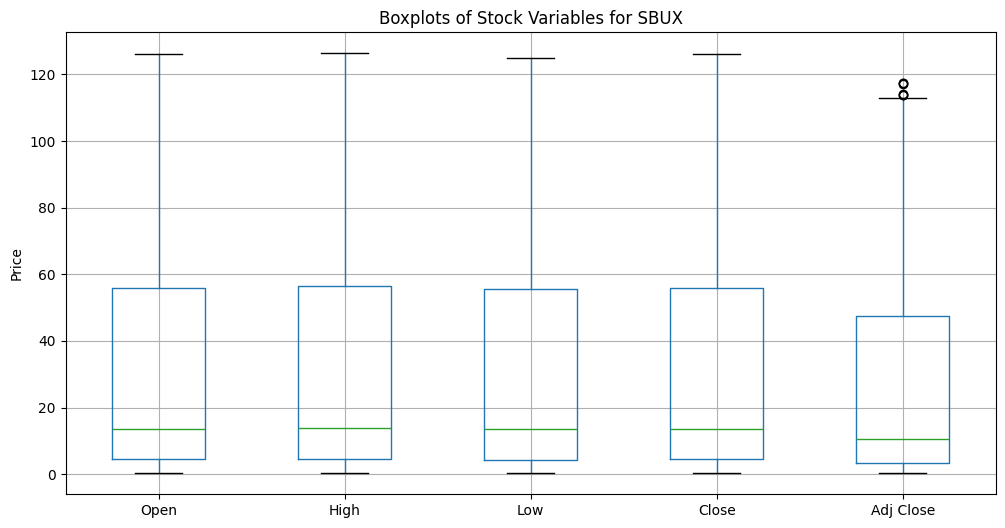

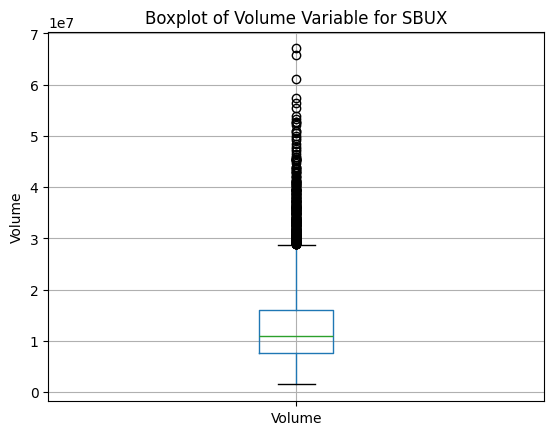

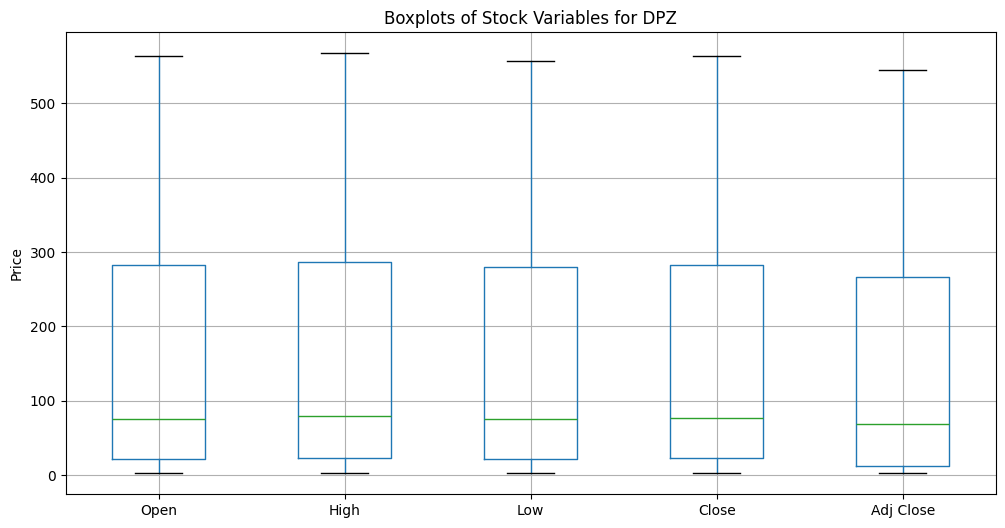

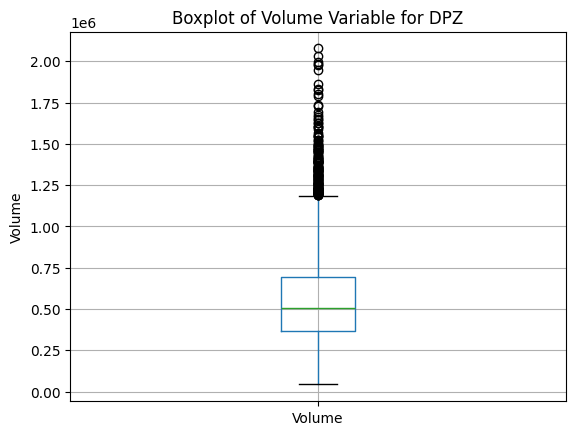

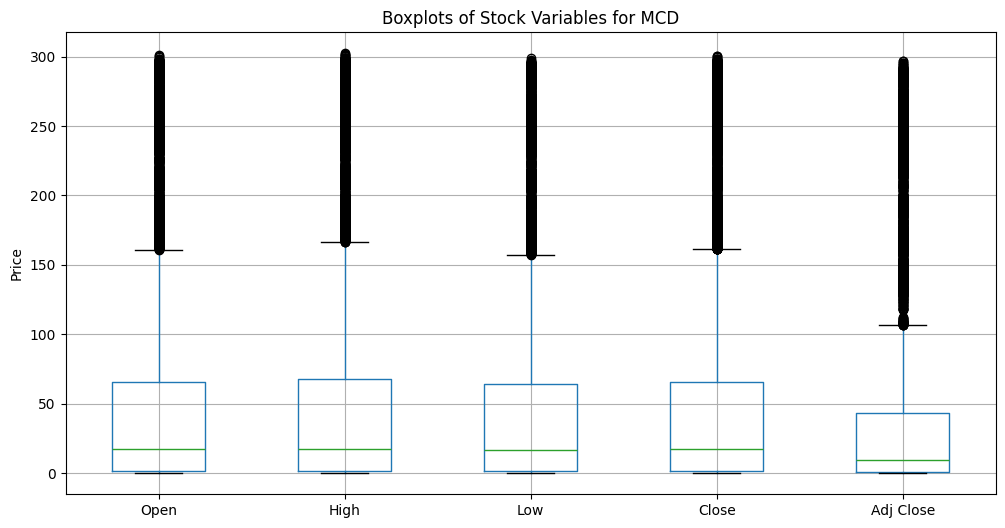

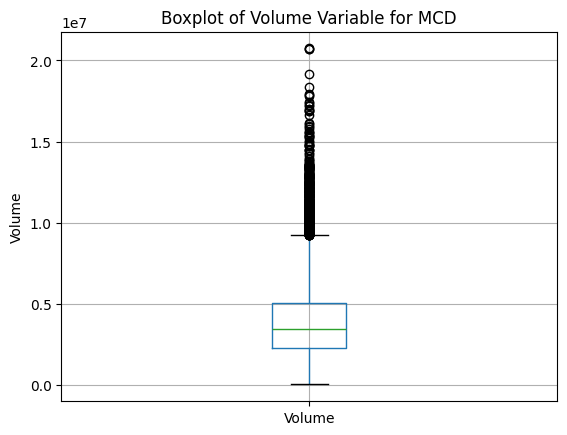

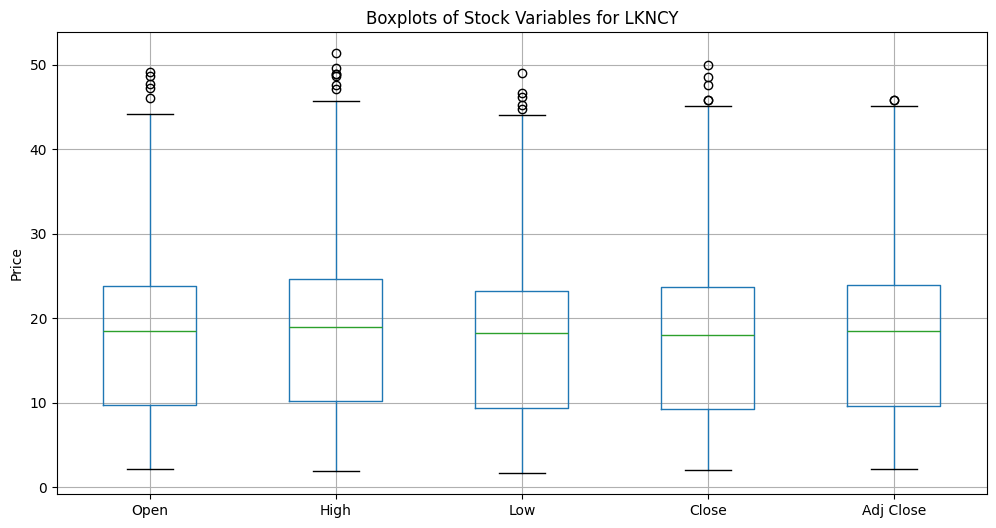

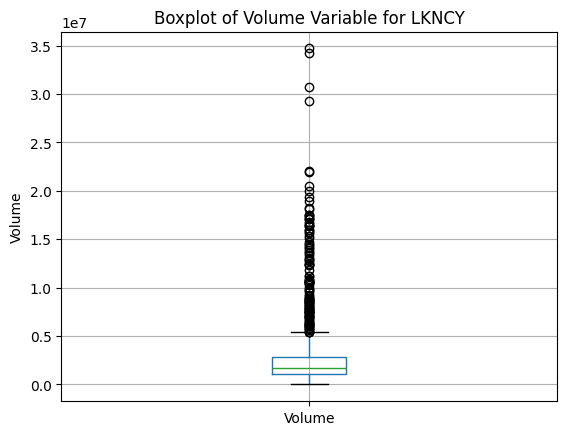

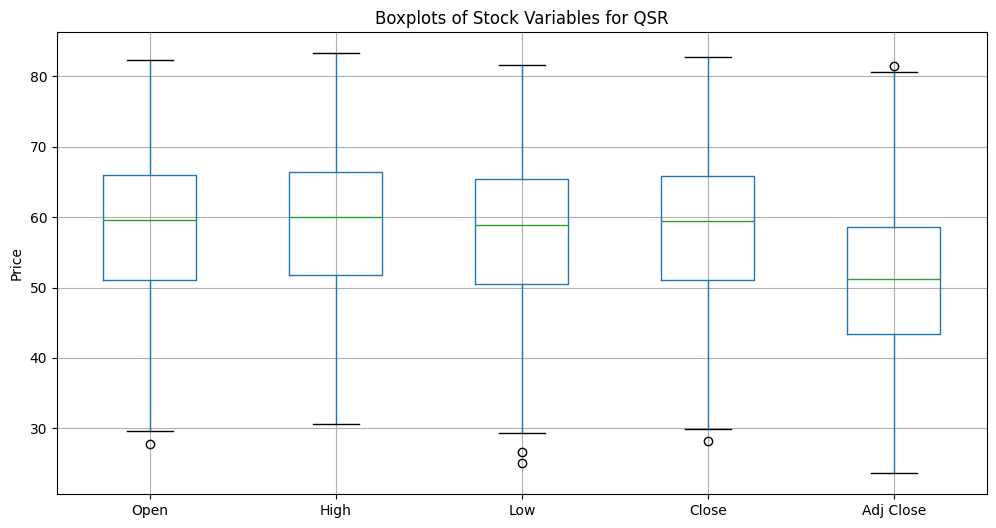

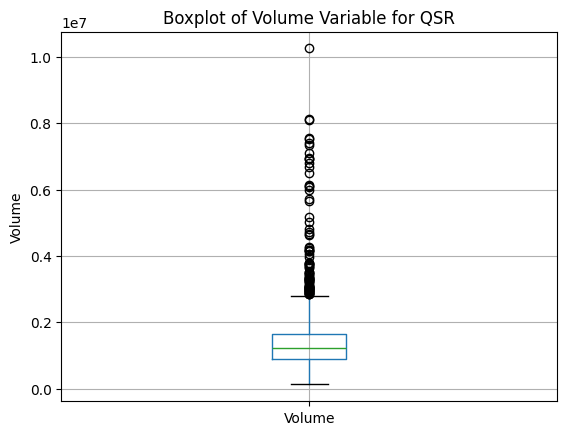

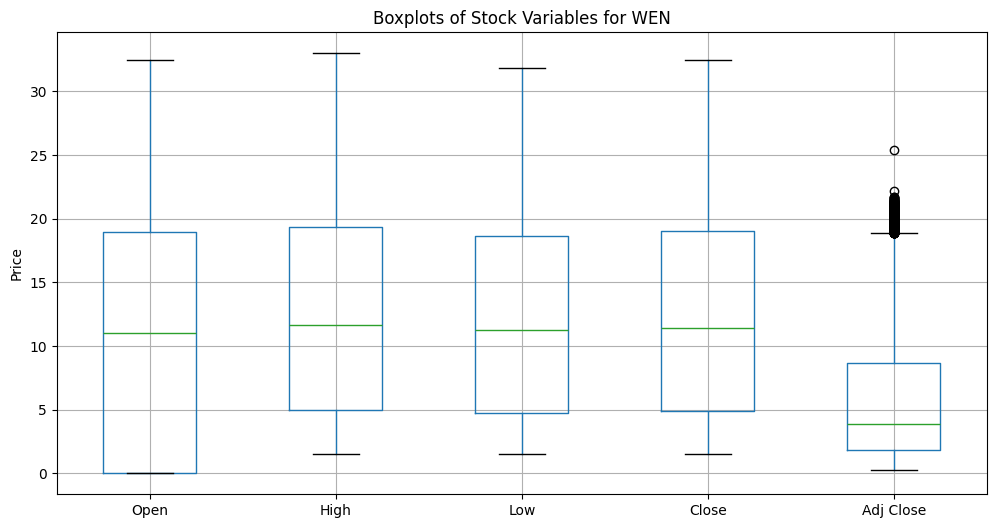

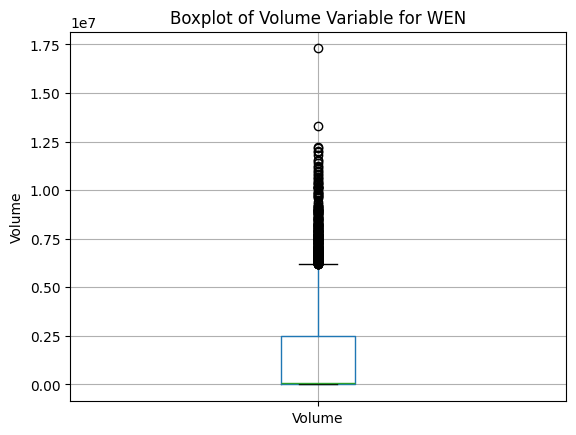

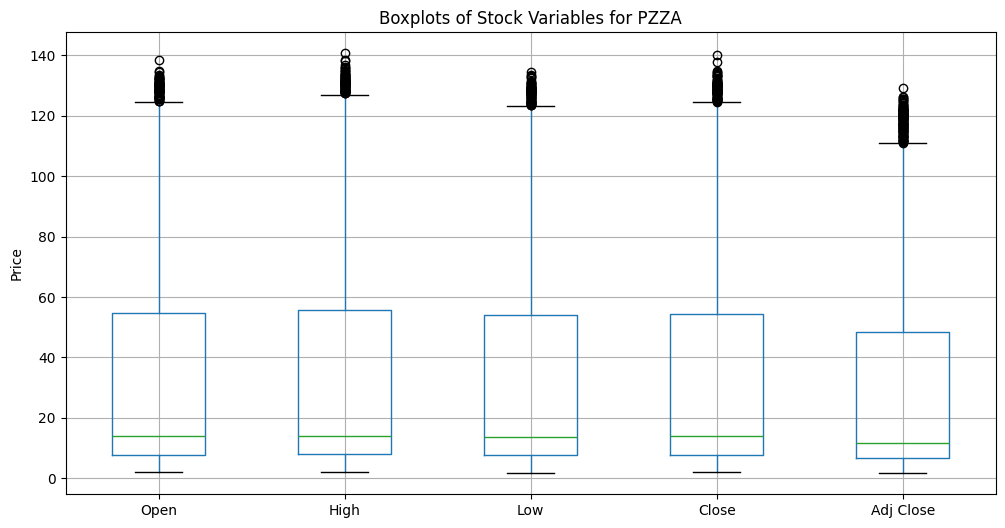

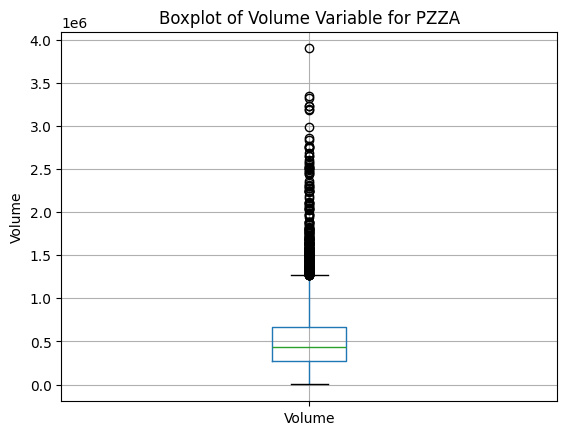

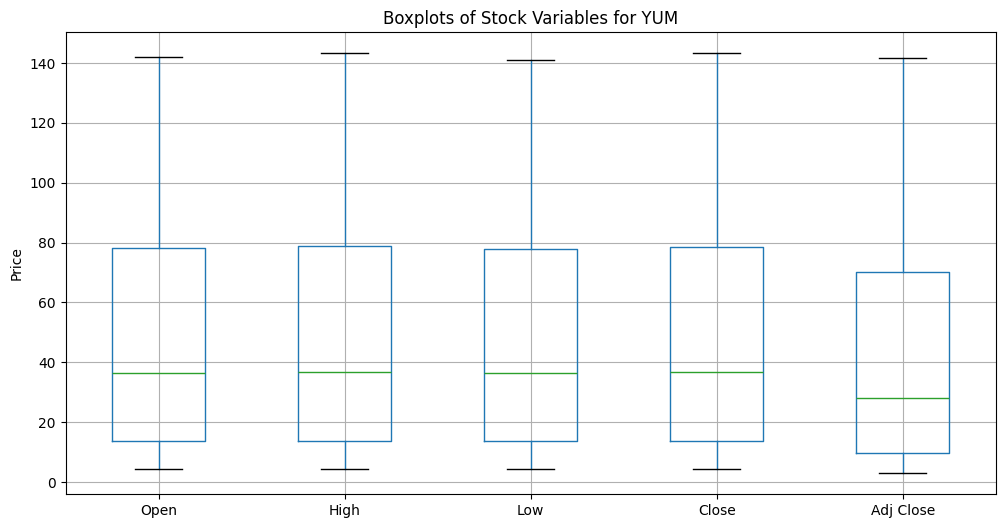

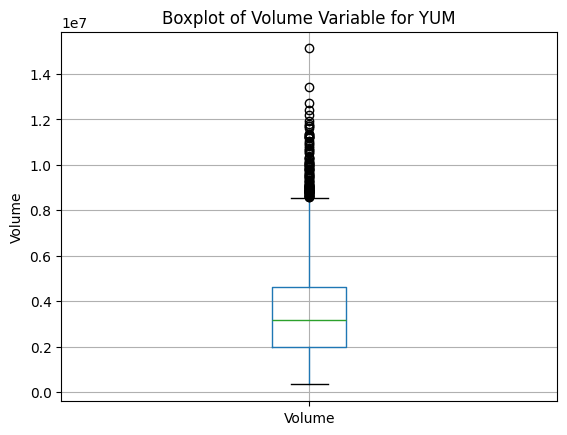

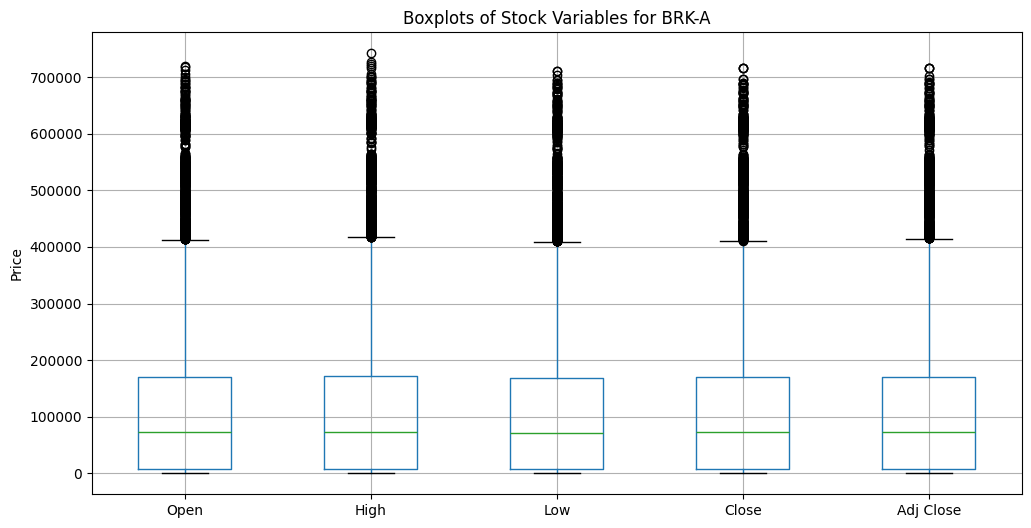

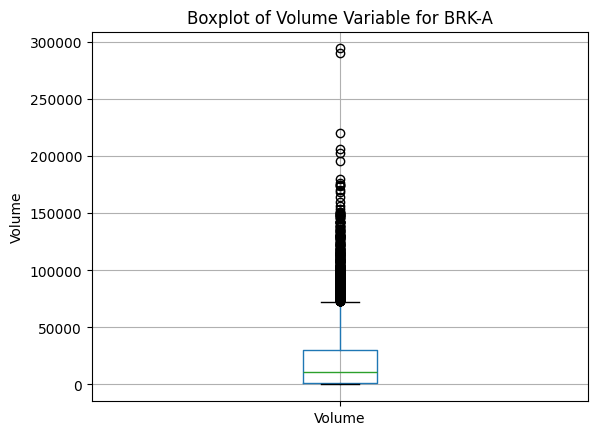

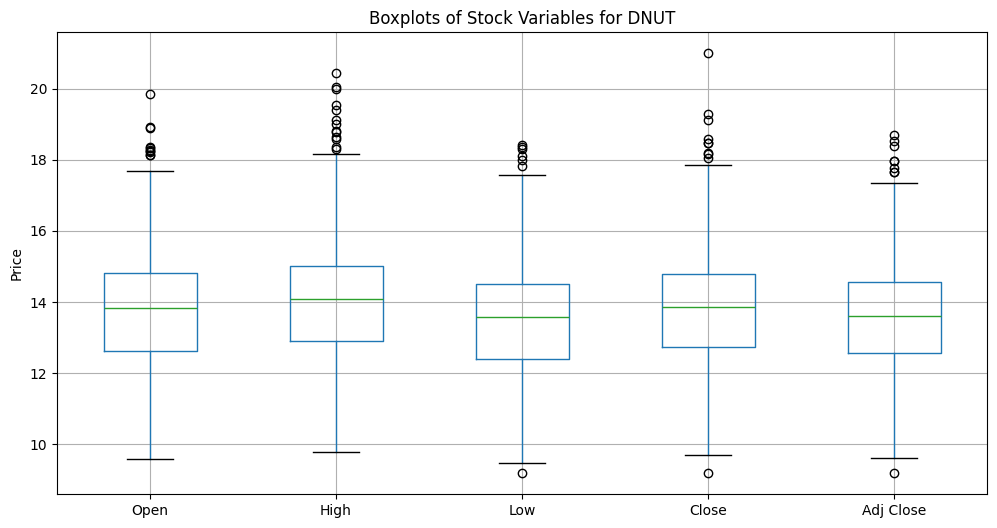

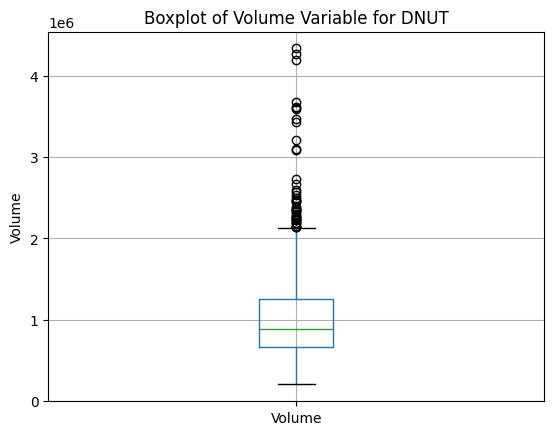

In [30]:
for df in dataframes:
    company_name = df["Company"][0]
    
    # Create a boxplot for each variable
    plt.figure(figsize=(12, 6))
    df[num_columns[:-1]].boxplot()
    plt.title(f"Boxplots of Stock Variables for {company_name}")
    plt.ylabel('Price')
    plt.grid(True, axis='y')
    plt.show()

    plt.figure()
    df[["Volume"]].boxplot()
    plt.title(f"Boxplot of Volume Variable for {company_name}")
    plt.ylabel('Volume')
    plt.grid(True, axis='y')
    plt.show()

As we can also observe in the output of the cell where outliers were replaced with NaN values, this transformation has resulted in a large number of missing values for the "Volume" variable in each company. As shown in the following tables, the number of missing values for the "Volume" variable exceeds 50% of the observations in some cases.

In [31]:
results = []
company_names = []

for df in dataframes:
    company_name = df["Company"][0]
    company_names.append(company_name)
    total_rows = len(df)
    null_percentages = (df.isnull().sum() / total_rows) * 100
    
    result = {"Company": company_name}
    result.update(null_percentages.to_dict())
    results.append(result)

final_df = pd.DataFrame(results, index=company_names)
final_df = final_df.round(2)
final_df

Company  Date   Open   High   Low  Close  Adj Close  Volume
SBUX       0.0   0.0   7.56   7.44  7.92   7.70       7.51   12.50
DPZ        0.0   0.0   7.70   7.51  7.65   7.43       7.61   13.35
MCD        0.0   0.0   7.55   7.39  7.40   7.32       7.42   11.46
LKNCY      0.0   0.0  10.07  10.81  9.70  10.37      10.37   15.56
QSR        0.0   0.0   0.00   0.00  0.00   0.00       0.00    7.36
WEN        0.0   0.0   7.68   7.43  7.76   7.53       7.61   20.67
PZZA       0.0   0.0   7.36   7.52  7.43   7.66       7.48   15.87
YUM        0.0   0.0   7.40   7.54  7.68   7.54       7.40   12.15
BRK-A      0.0   0.0   7.39   7.36  7.46   7.38       7.36   19.03
DNUT       0.0   0.0   7.48   8.22  9.69   7.61       7.48   17.06

In [771]:
for df in dataframes:
    print(df["Volume"].describe())

count    1.140000e+03
mean     2.818600e+06
std      3.670381e+06
min      0.000000e+00
25%      1.088175e+06
50%      1.744300e+06
75%      2.802825e+06
max      3.470920e+07
Name: Volume, dtype: float64
count    4.409000e+03
mean     5.636805e+05
std      2.797807e+05
min      4.300000e+04
25%      3.683000e+05
50%      5.091000e+05
75%      6.955000e+05
max      2.077600e+06
Name: Volume, dtype: float64
count    2.278000e+03
mean     1.391255e+06
std      8.367087e+05
min      1.282000e+05
25%      8.863250e+05
50%      1.232350e+06
75%      1.654825e+06
max      1.024860e+07
Name: Volume, dtype: float64
count      8869.000000
mean      59047.738409
std       45982.269612
min           0.000000
25%       25600.000000
50%       49881.193146
75%       80104.438410
max      435304.349287
Name: Volume, dtype: float64
count    5.975000e+03
mean     3.511294e+06
std      1.920127e+06
min      3.404000e+05
25%      1.980050e+06
50%      3.173427e+06
75%      4.621389e+06
max      1.511975e

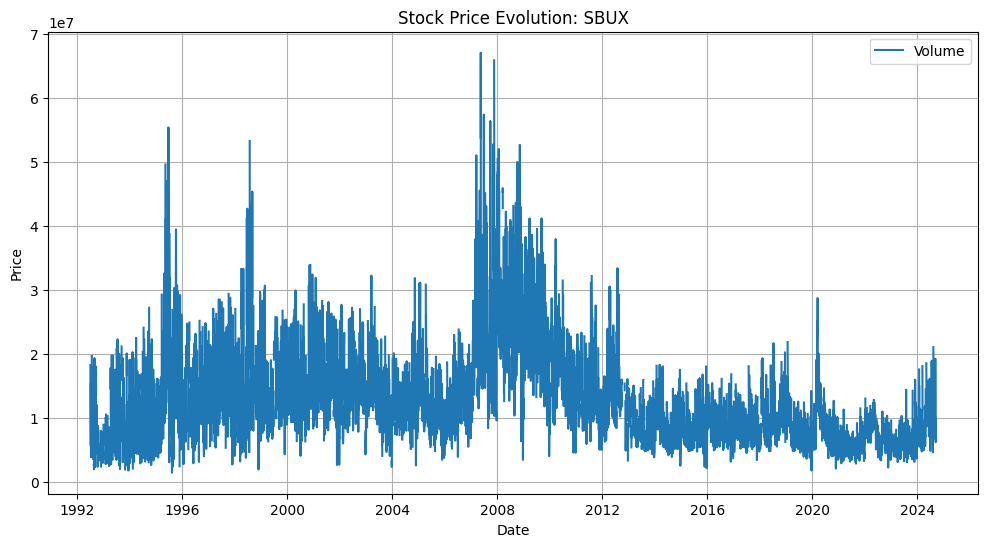

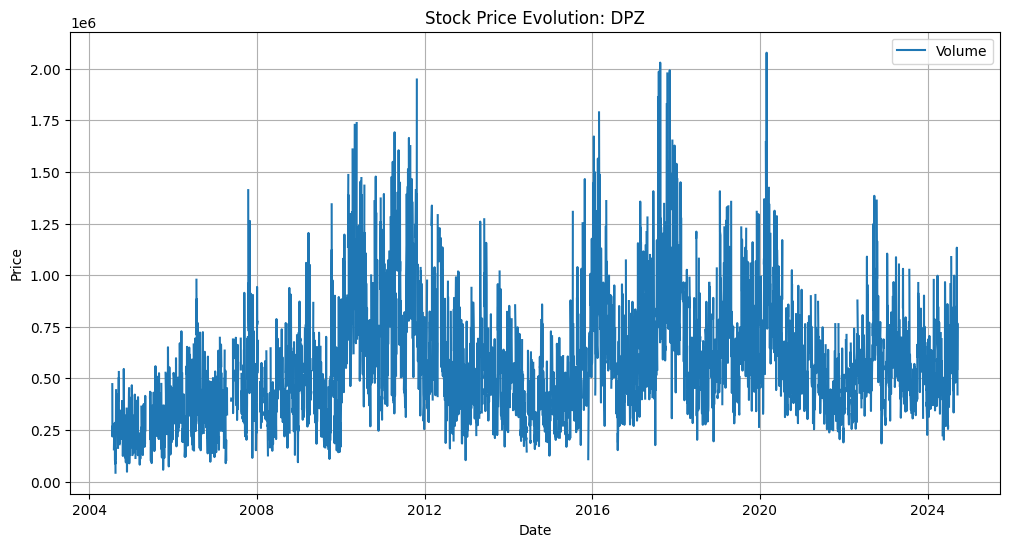

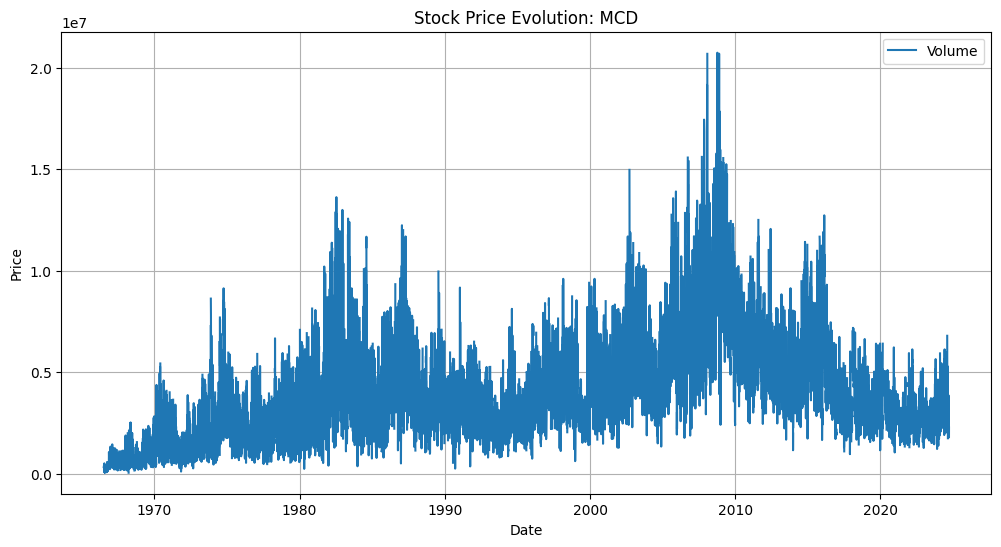

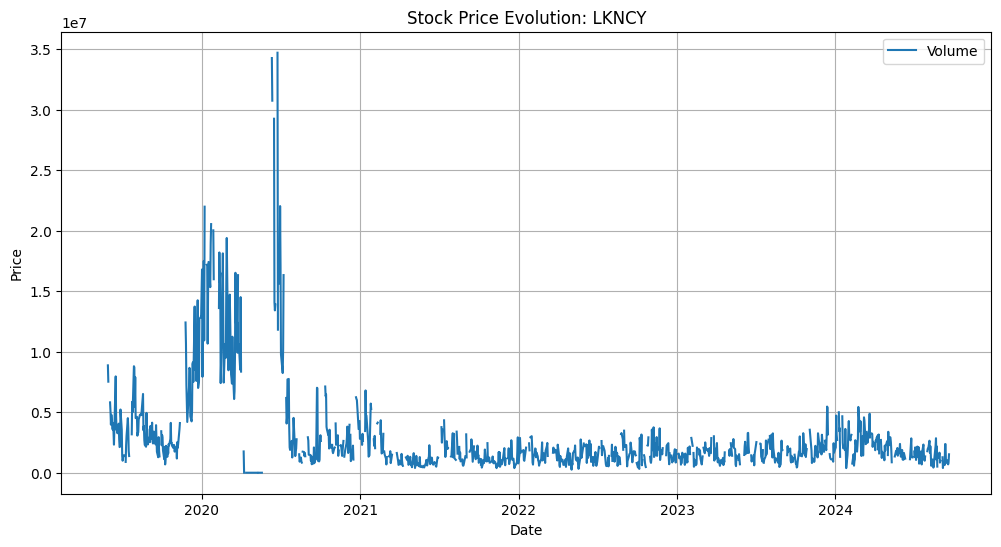

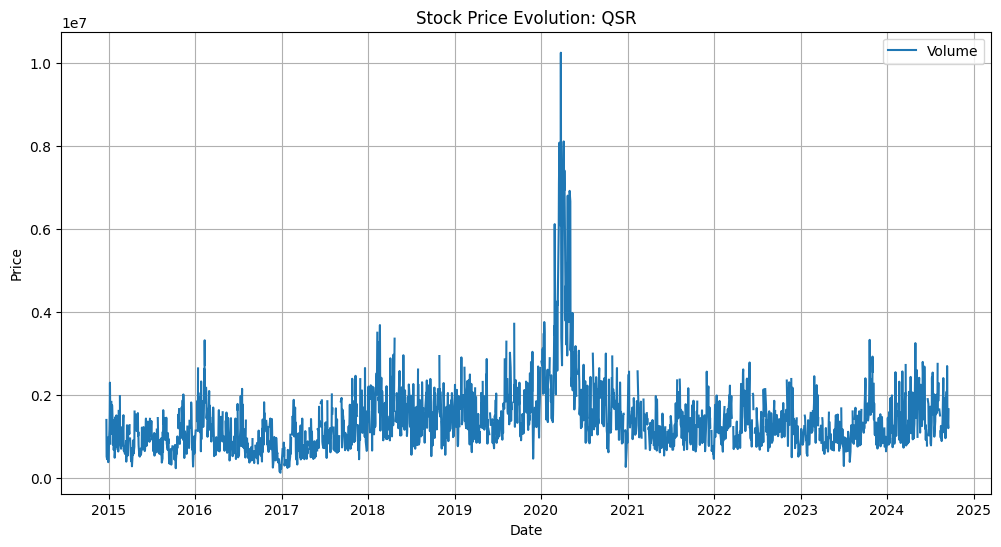

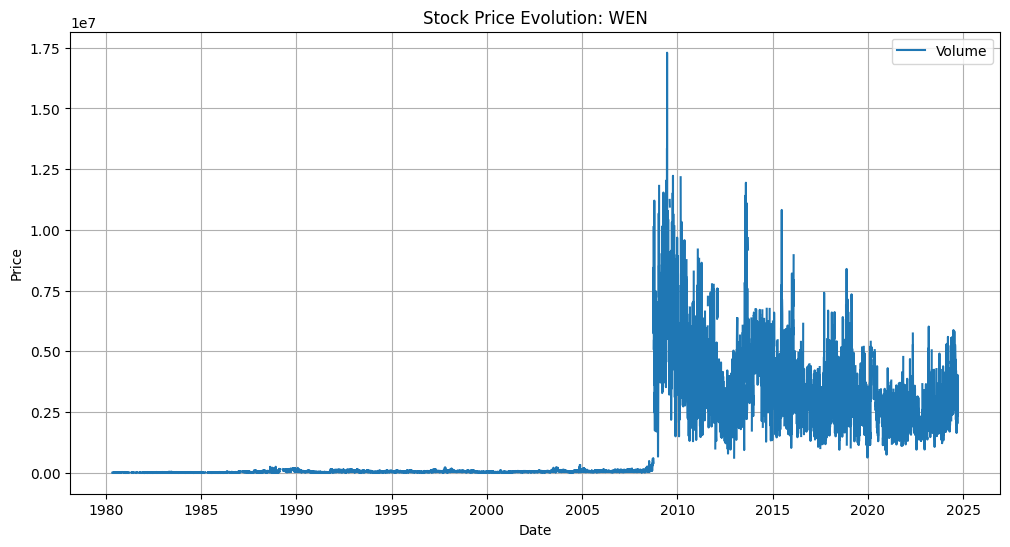

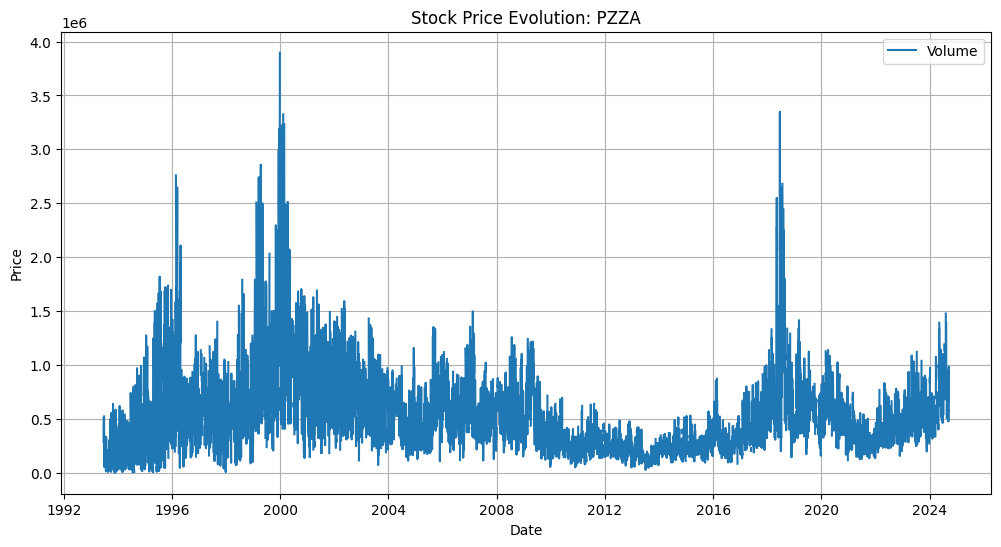

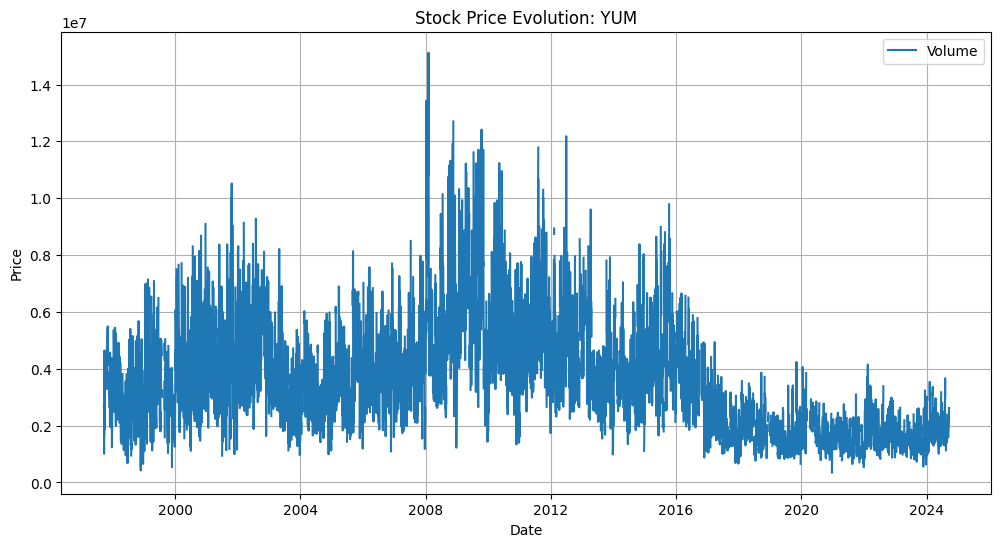

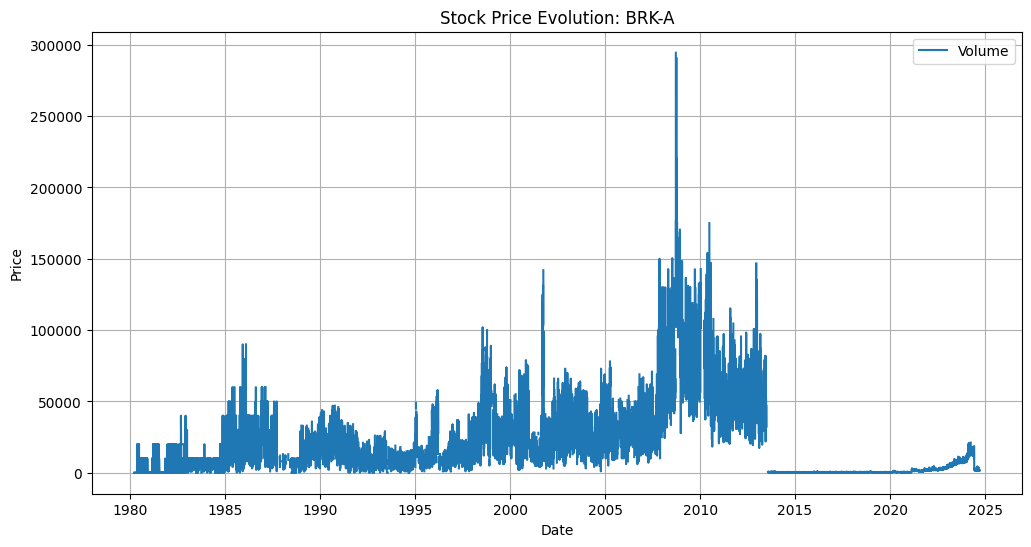

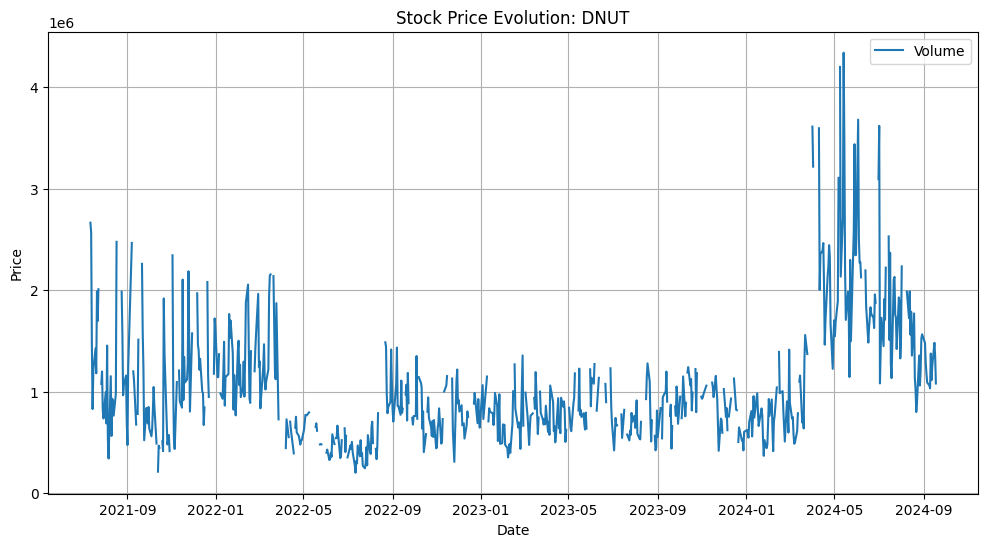

In [32]:
for df in dataframes:
    # Ensure the 'Date' column is parsed as datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort the data by date for proper plotting
    df.sort_values('Date', inplace=True)
    
    # Plot the line chart
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Volume'], label='Volume')
        
    # Chart formatting
    plt.title(f"Stock Price Evolution: {df["Company"][0]}")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Replace Missing Data

We used **interpolation** as the primary technique to replace missing values in the time series. Interpolation involves estimating the missing values based on adjacent known data, leveraging the continuity of the time series.

Interpolation Process
1. **Method Selection**:
   - We opted for **linear interpolation**, which assumes that data changes uniformly between the nearest known points.
   - This method is suitable for time series with smooth transitions and relatively stable patterns.

2. **Filling Missing Values**:
   - Each `NaN` value was estimated by calculating the slope between the nearest known points (previous and next) and assigning a proportional value within the interval.
   - For values at the start or end of the series, where sufficient data points were unavailable, forward and backward propagation methods were used as needed.

For the "Volume" variable, it was decided not to replace its missing values using any technique. In exercises where this variable is needed (7 and 8), the missing values will simply be discarded. We believe this approach is better than imputing values using any method, as it avoids introducing artificial values given the large proportion of missing data.

In [33]:
for df in dataframes:
    print(f"Procesando: {df['Company'][0]}")
    print("Valores NaN antes de la interpolación:")
    print(df.isnull().sum())

    for column in num_columns[:-1]:

        df[column] = df[column].interpolate(method='linear', limit_direction='both')

    print("Valores NaN después de la interpolación:")
    print(df.isnull().sum())
    print("******************************************************************************")


Procesando: SBUX
Valores NaN antes de la interpolación:
Date            0
Open          614
High          604
Low           643
Close         625
Adj Close     610
Volume       1015
Company         0
dtype: int64
Valores NaN después de la interpolación:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume       1015
Company         0
dtype: int64
******************************************************************************
Procesando: DPZ
Valores NaN antes de la interpolación:
Date           0
Open         392
High         382
Low          389
Close        378
Adj Close    387
Volume       679
Company        0
dtype: int64
Valores NaN después de la interpolación:
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       679
Company        0
dtype: int64
******************************************************************************
Procesando: MCD
Valores NaN antes de 

Finally, we can observe the time series obtained for each dataset after the interpolation process.

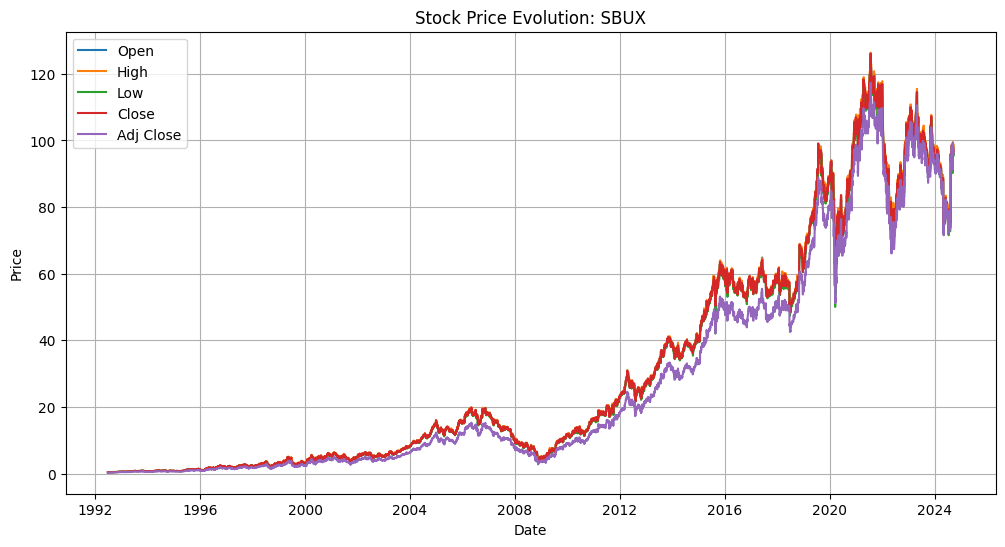

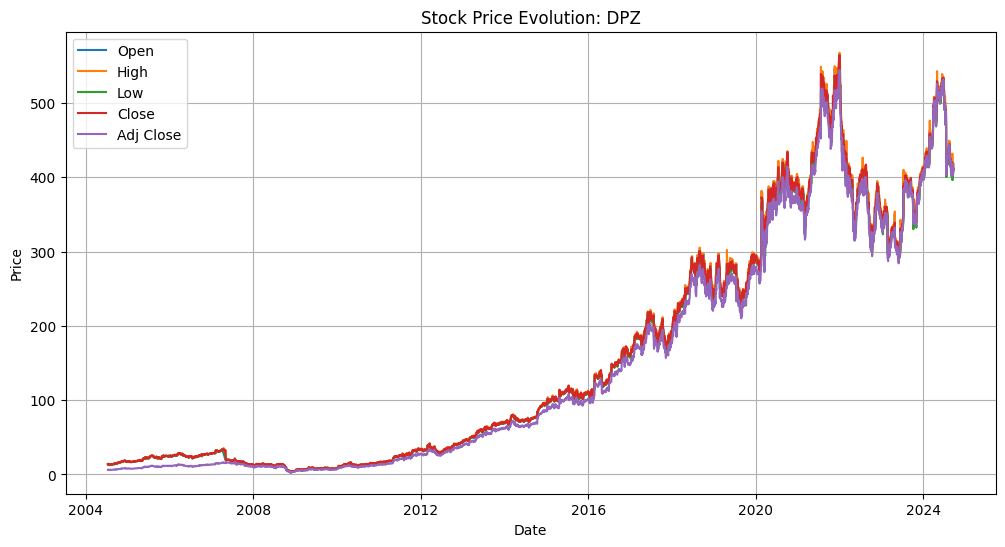

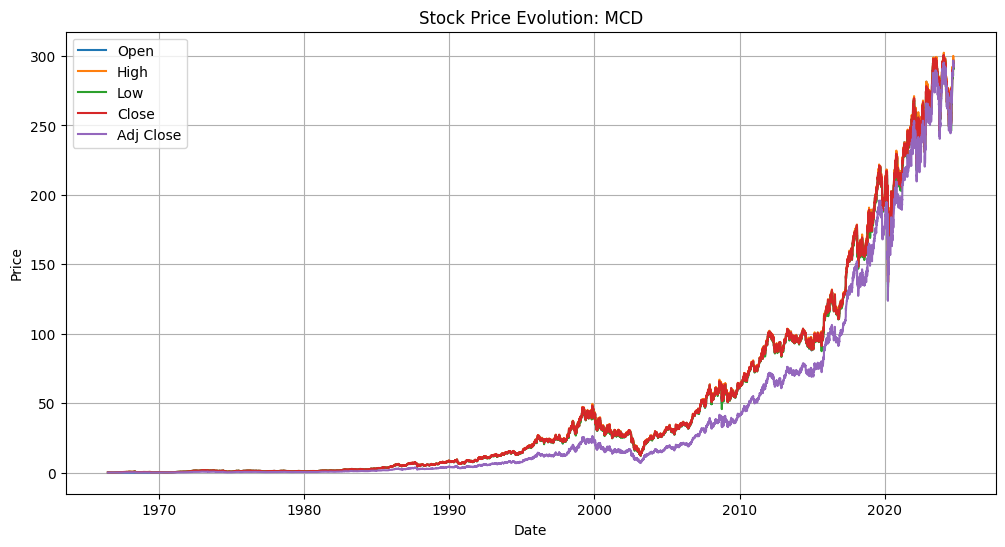

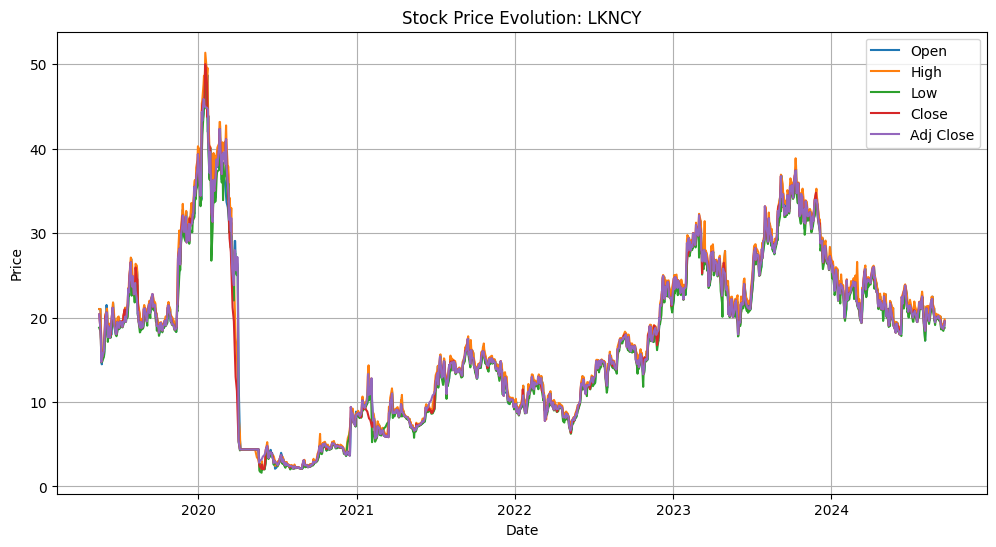

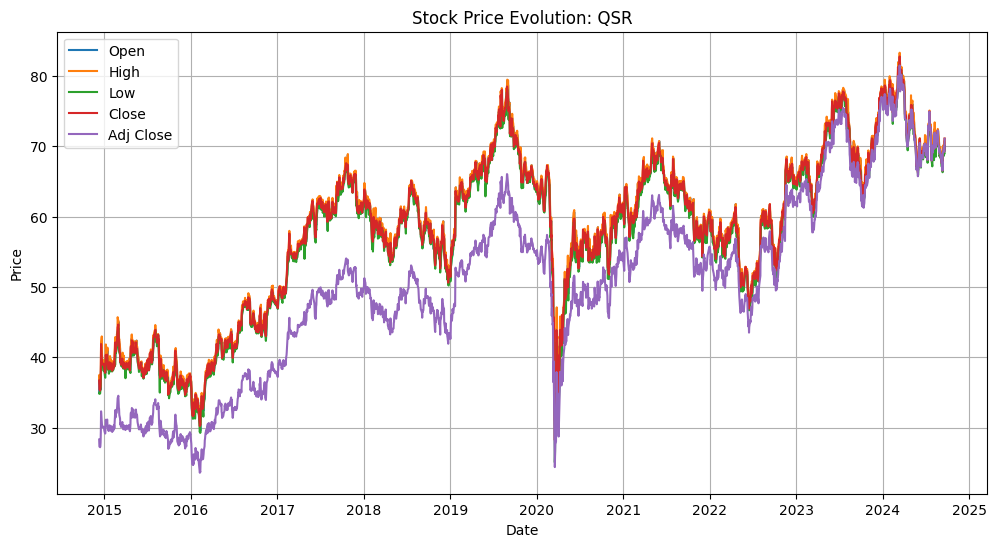

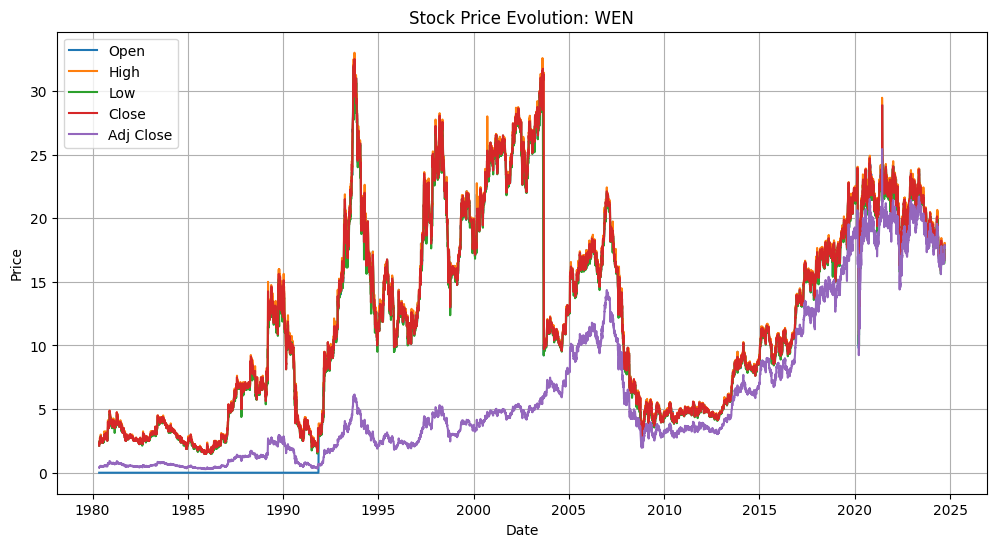

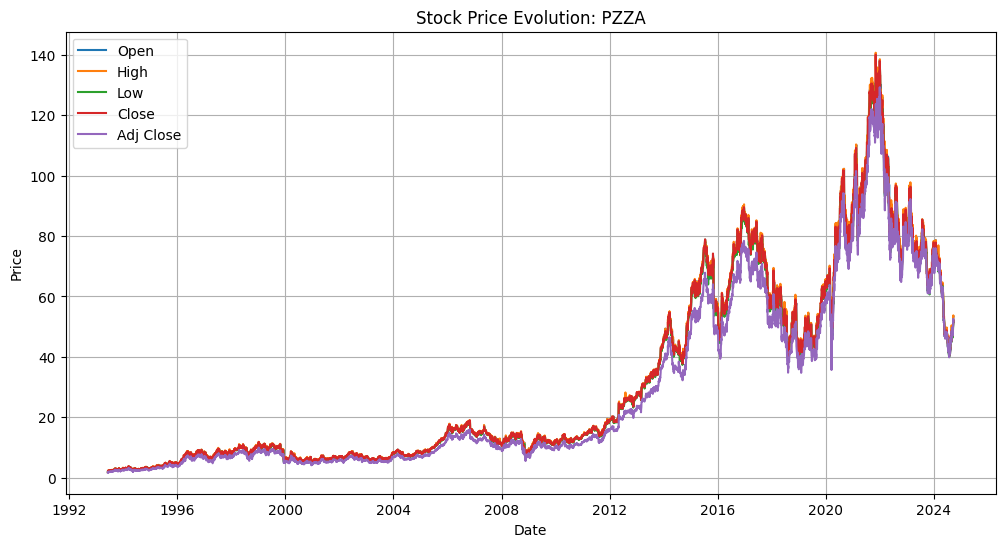

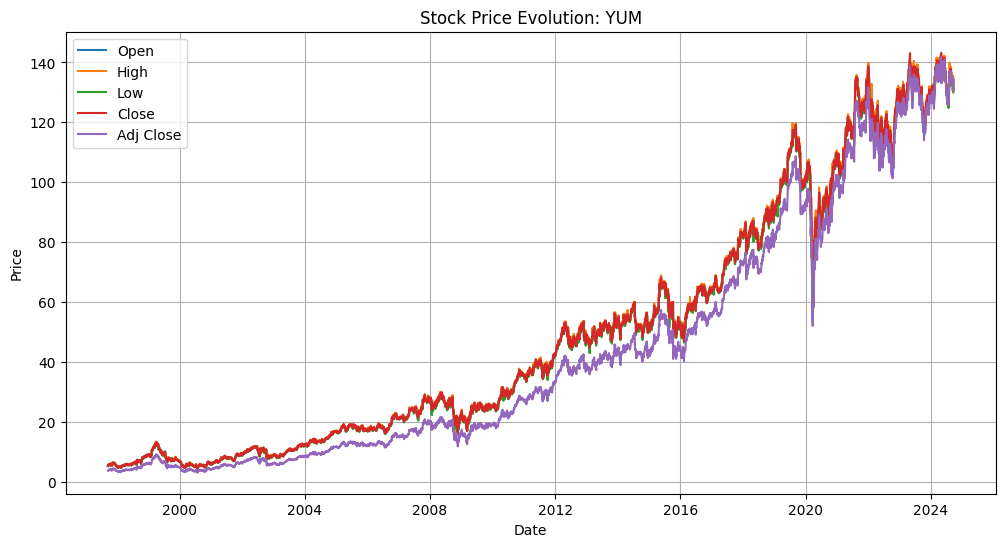

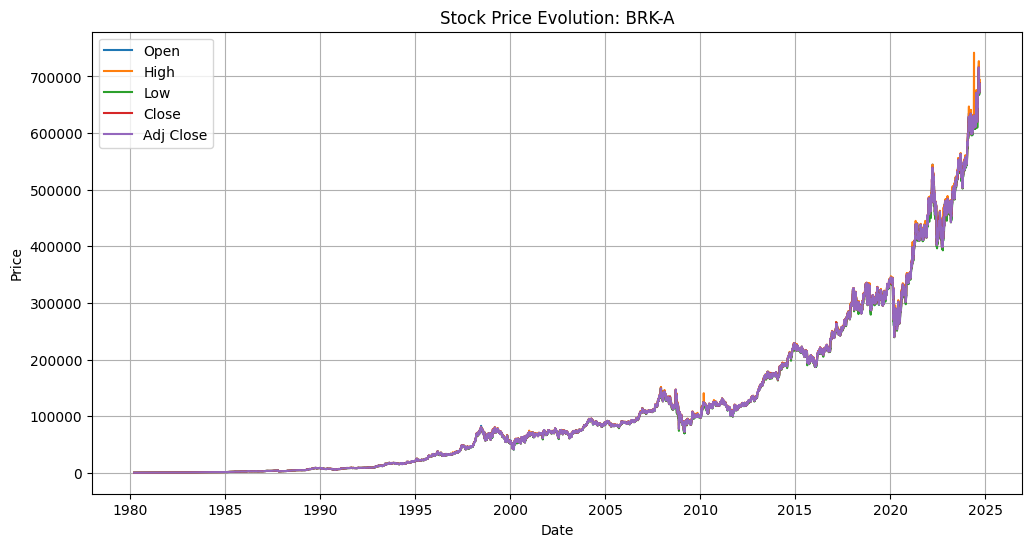

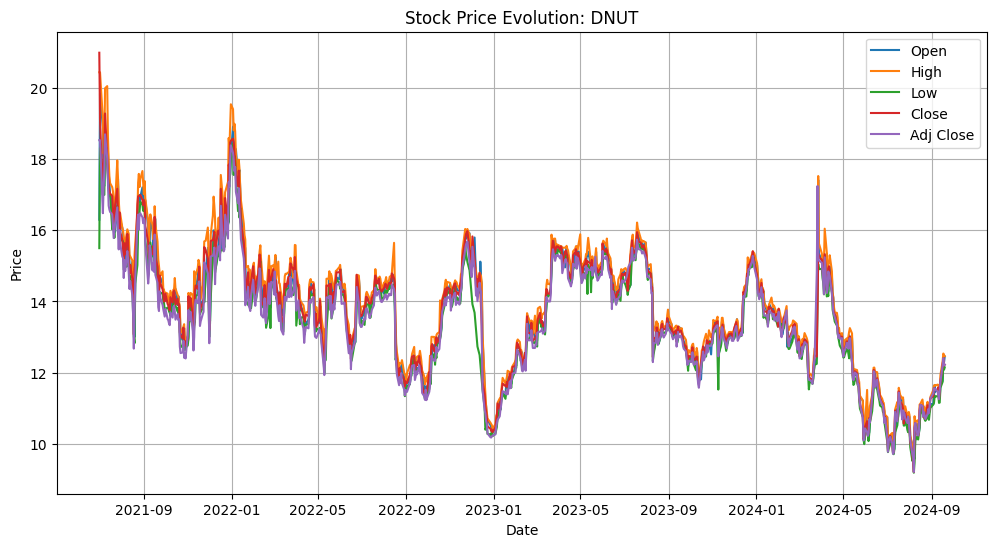

In [34]:
for df in dataframes:
    # Ensure the 'Date' column is parsed as datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort the data by date for proper plotting
    df.sort_values('Date', inplace=True)
    
    # Plot the line chart
    plt.figure(figsize=(12, 6))
    for variable in num_columns[:-1]:
        plt.plot(df["Date"], df[variable], label=variable)
    # plt.plot(df['Date'], df['Open'], label='Open')
    # plt.plot(df['Date'], df['High'], label='High')
    # plt.plot(df['Date'], df['Low'], label='Low')
    # plt.plot(df['Date'], df['Close'], label='Close')
    # plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
    
    # Chart formatting
    plt.title(f"Stock Price Evolution: {df["Company"][0]}")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
results = []
company_names = []

for df in dataframes:
    company_name = df["Company"][0]
    company_names.append(company_name)
    total_rows = len(df)
    null_percentages = (df.isnull().sum() / total_rows) * 100
    
    result = {"Company": company_name}
    result.update(null_percentages.to_dict())
    results.append(result)

final_df = pd.DataFrame(results, index=company_names)
final_df = final_df.round(2)
final_df

Company  Date  Open  High  Low  Close  Adj Close  Volume
SBUX       0.0   0.0   0.0   0.0  0.0    0.0        0.0   12.50
DPZ        0.0   0.0   0.0   0.0  0.0    0.0        0.0   13.35
MCD        0.0   0.0   0.0   0.0  0.0    0.0        0.0   11.46
LKNCY      0.0   0.0   0.0   0.0  0.0    0.0        0.0   15.56
QSR        0.0   0.0   0.0   0.0  0.0    0.0        0.0    7.36
WEN        0.0   0.0   0.0   0.0  0.0    0.0        0.0   20.67
PZZA       0.0   0.0   0.0   0.0  0.0    0.0        0.0   15.87
YUM        0.0   0.0   0.0   0.0  0.0    0.0        0.0   12.15
BRK-A      0.0   0.0   0.0   0.0  0.0    0.0        0.0   19.03
DNUT       0.0   0.0   0.0   0.0  0.0    0.0        0.0   17.06

### 1. For each dataset:
- Print the number of rows and columns.
- Display the column names and their data types.

In [36]:
# Iterate over files in the directory
for df in dataframes:
    # Print the dataset name
    print(f"{df["Company"][0]}:")
    # Print the shape of the DataFrame
    print(f"- Number of rows and columns: {df.shape}")
    # Print the column names
    print(f"- Columns: {list(df.columns)}")
    # Print the data types of each column
    print(f"- Data types:")
    print(df.dtypes)
    print("-" * 50)  # Separator for readability

SBUX:
- Number of rows and columns: (8122, 8)
- Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company']
- Data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Company              object
dtype: object
--------------------------------------------------
DPZ:
- Number of rows and columns: (5088, 8)
- Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company']
- Data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Company              object
dtype: object
--------------------------------------------------
MCD:
- Number of rows and columns: (14657, 8)
- Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company']

### 2. Extract all rows where the date is in the year 2023.
- Print the number of rows.
- Visualize the `Close` price trend for this period.

In [37]:
for df in dataframes:
    company_name = df["Company"][0]
    df_2023 = df[df["Date"].dt.year == 2023]
    print(f"The number of observations for {company_name} for year 2023 is {df_2023.shape[0]}")

The number of observations for SBUX for year 2023 is 250
The number of observations for DPZ for year 2023 is 250
The number of observations for MCD for year 2023 is 250
The number of observations for LKNCY for year 2023 is 251
The number of observations for QSR for year 2023 is 250
The number of observations for WEN for year 2023 is 251
The number of observations for PZZA for year 2023 is 250
The number of observations for YUM for year 2023 is 250
The number of observations for BRK-A for year 2023 is 250
The number of observations for DNUT for year 2023 is 252


In [38]:
dfm["Date"] = pd.to_datetime(dfm["Date"], format="%Y-%m-%d")
dfm_2023 = dfm[dfm["Date"].dt.year == 2023]
print(f"The number of observations in the merged dataframe for year 2023 is {dfm_2023.shape[0]}")

The number of observations in the merged dataframe for year 2023 is 2504


### 3. For each company, find the day with the highest `Close` price.
- Display the date alongside the price.


In [39]:
# Dictionary to store results
results = {"Company": [], "Close": [], "Date": []}

for df in dataframes:
    # Extract the company name
    company_name = df["Company"].iloc[0]
    
    # Find the day with the highest Close price
    max_close_row = df.loc[df["Close"].idxmax()]
    max_date = max_close_row["Date"]
    max_close_price = max_close_row["Close"]
    
    # Append to results dictionary
    results["Company"].append(company_name)
    results["Close"].append(max_close_price)
    results["Date"].append(max_date)

# Display the results

results_df = pd.DataFrame(results)
print(results_df)



  Company          Close       Date
0    SBUX     126.059998 2021-07-26
1     DPZ     564.330017 2021-12-31
2     MCD     300.529999 2024-01-19
3   LKNCY      50.020000 2020-01-17
4     QSR      82.750000 2024-03-13
5     WEN      32.500000 1993-09-29
6    PZZA     140.009995 2021-11-04
7     YUM     143.190002 2024-04-29
8   BRK-A  715910.000000 2024-09-03
9    DNUT      21.000000 2021-07-01



### 4. Group the data by month and calculate the average `Close` price for each company.
- Plot these monthly averages for 3 companies and compare them.
- Justify the chart selection.

In [42]:
monthly_averages = []

for df in dataframes:
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    # Extract Year-Month for grouping
    df['YearMonth'] = df['Date'].dt.to_period('M')
    # Group by YearMonth and calculate average Close price
    company_avg = df.groupby('YearMonth')['Close'].mean().reset_index()
    # Add the Company column
    company_avg['Company'] = df['Company'].iloc[0]
    # Append to the results list
    monthly_averages.append(company_avg)

# monthly_averages is a list that contains 10 DataFrames, 1 for each company

# Combine all processed DataFrames into one
final_monthly_avg = pd.concat(monthly_averages, ignore_index=True)

# Display the result
print(final_monthly_avg)




     YearMonth      Close Company
0      1992-06   0.347656    SBUX
1      1992-07   0.399325    SBUX
2      1992-08   0.399833    SBUX
3      1992-09   0.466983    SBUX
4      1992-10   0.469727    SBUX
...        ...        ...     ...
3316   2024-05  11.890682    DNUT
3317   2024-06  11.144211    DNUT
3318   2024-07  10.587273    DNUT
3319   2024-08  10.541364    DNUT
3320   2024-09  11.735000    DNUT

[3321 rows x 3 columns]


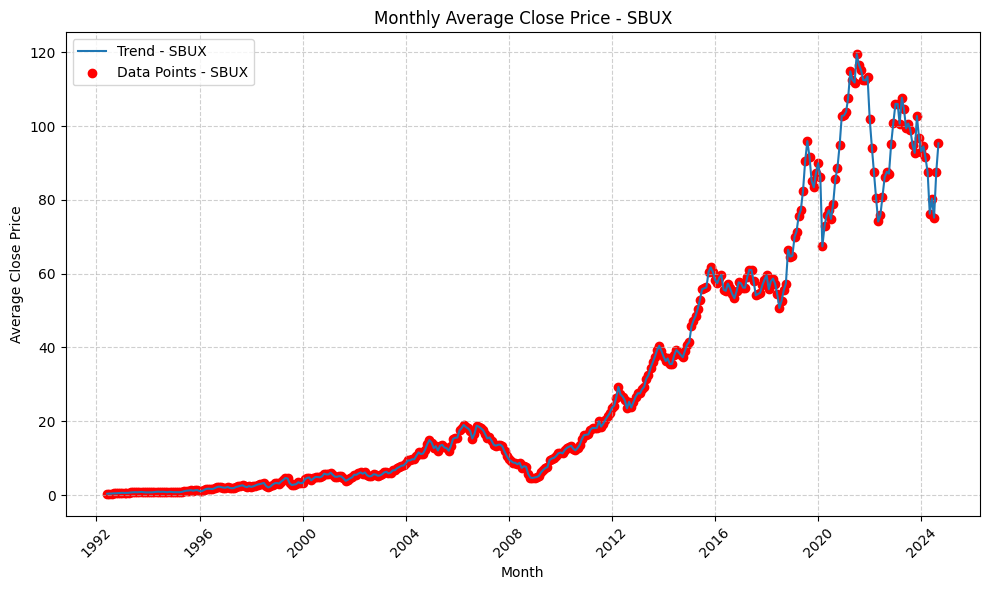

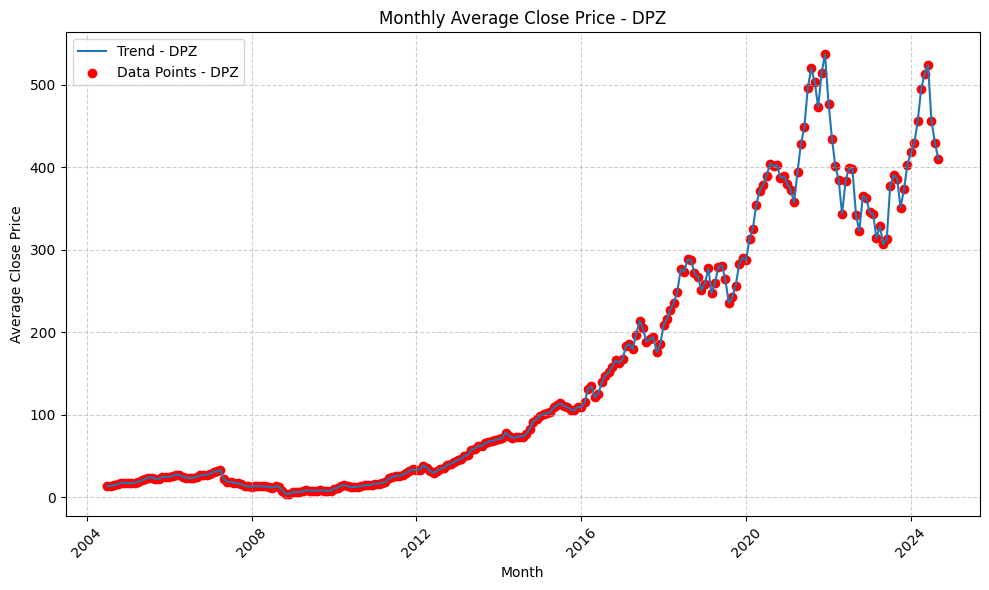

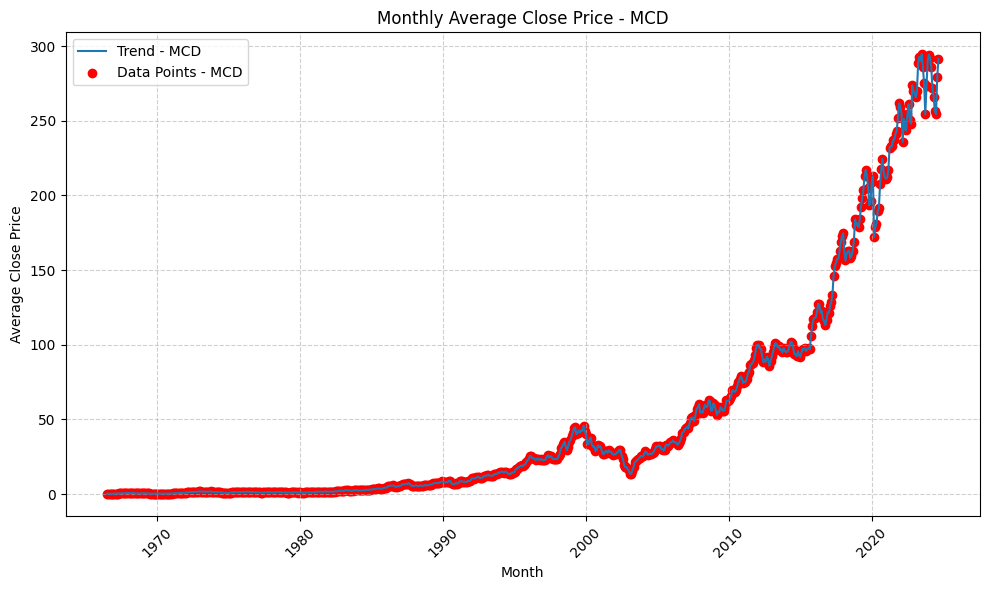

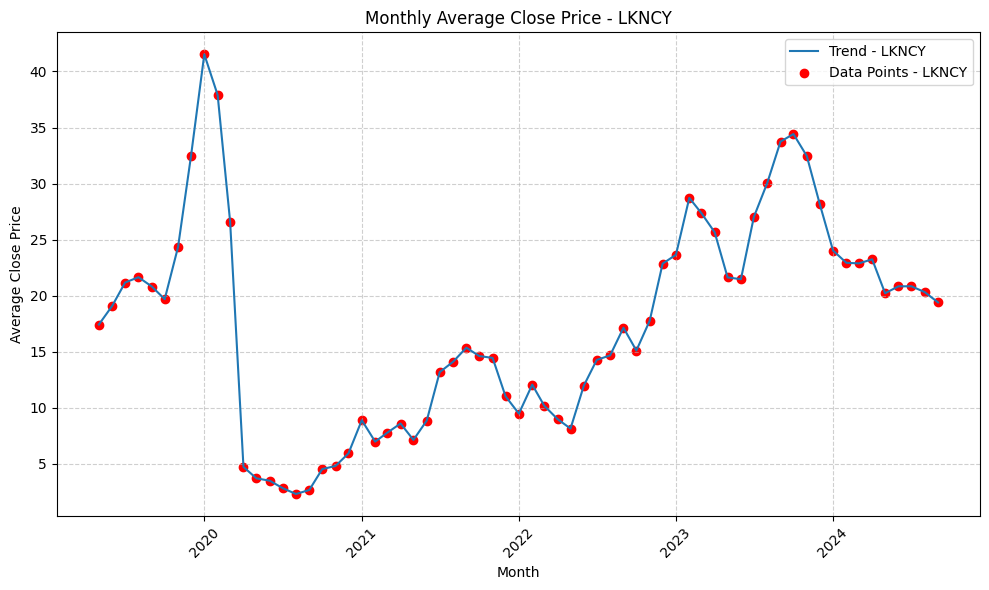

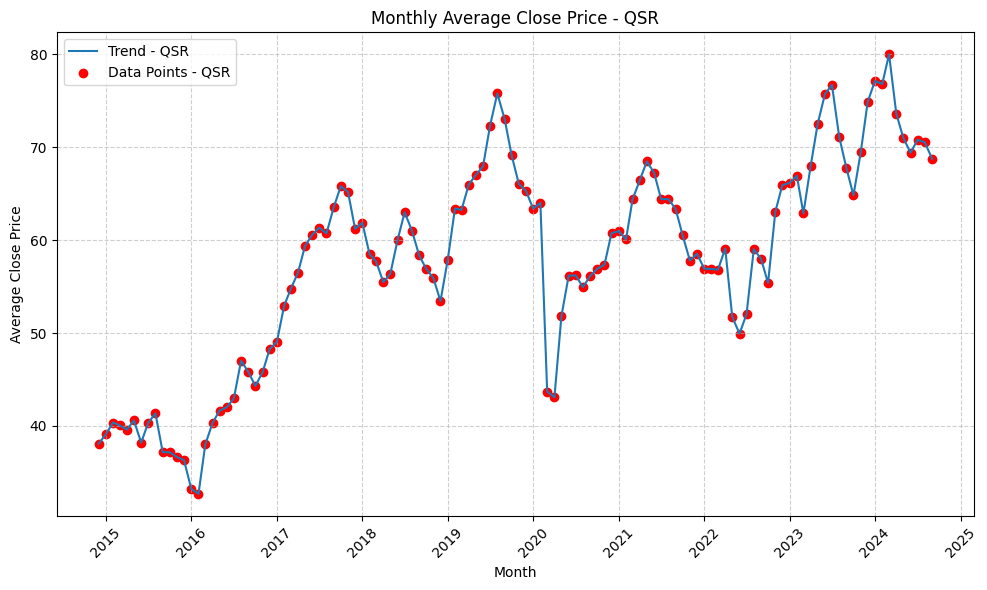

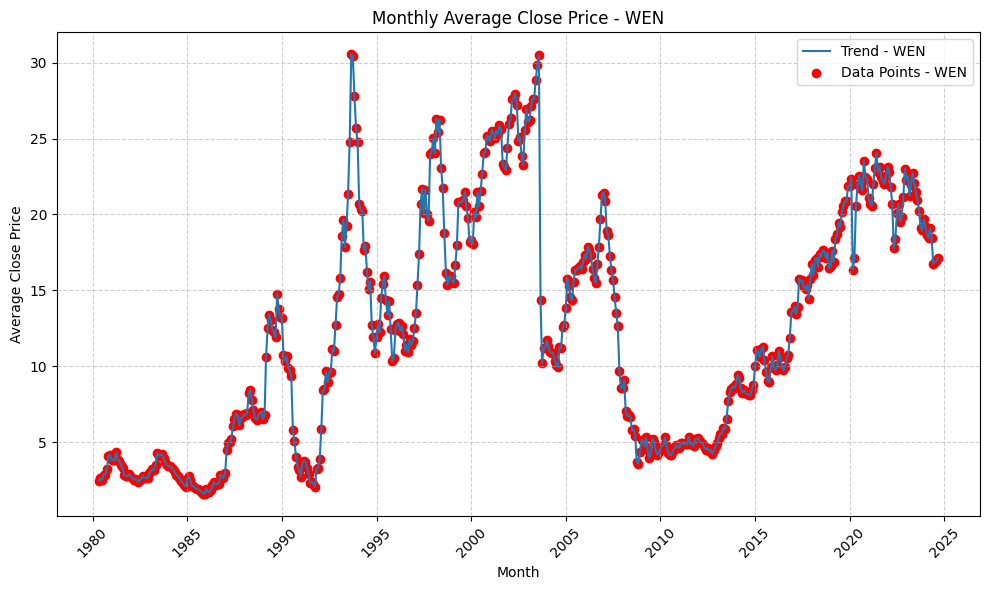

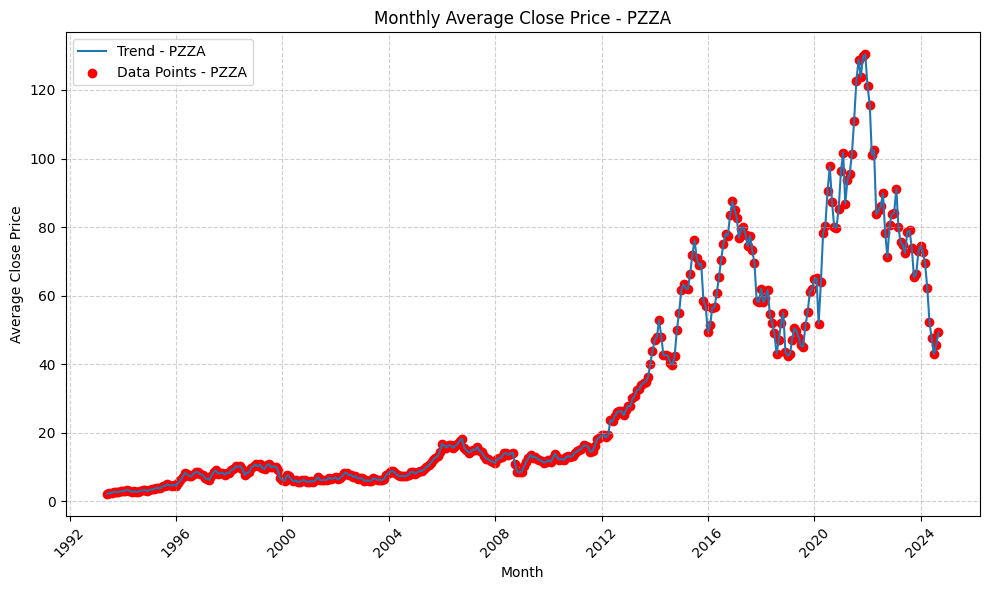

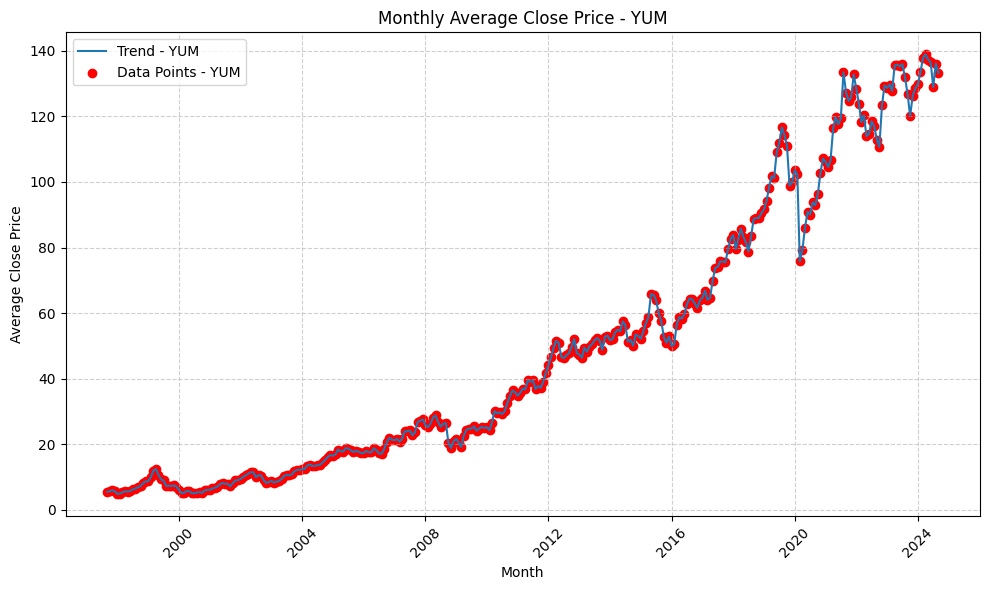

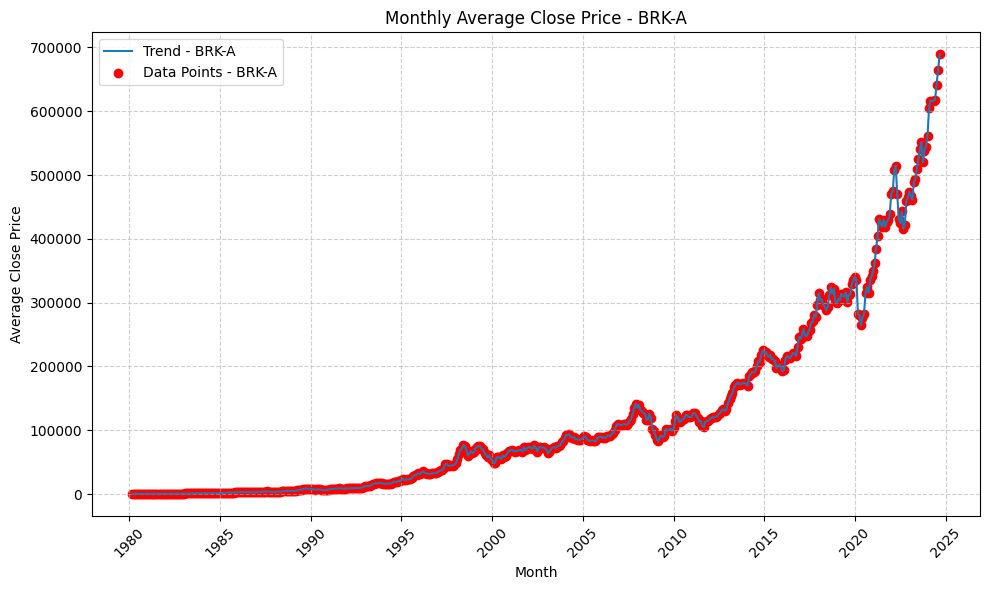

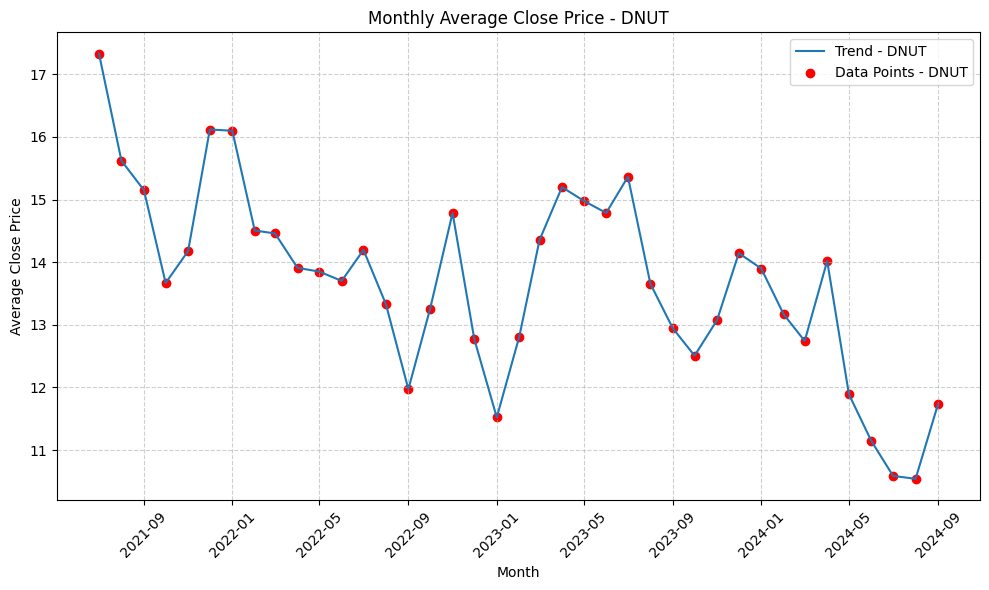

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Create separate enhanced charts for each company
for df in monthly_averages:
    # Ensure YearMonth is in datetime format
    df['YearMonth'] = pd.to_datetime(df['YearMonth'].astype(str))
    
    # Plot line and scatter
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearMonth'], df['Close'], linestyle='-', label=f"Trend - {df['Company'].iloc[0]}")
    plt.scatter(df['YearMonth'], df['Close'], color='red', label=f"Data Points - {df['Company'].iloc[0]}")
    
    # Add chart details
    plt.title(f"Monthly Average Close Price - {df['Company'].iloc[0]}")
    plt.xlabel("Month")
    plt.ylabel("Average Close Price")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 5. For each company:
- Compute the yearly average of the `Close` price.
- Plot a comparison of yearly averages for all companies on a chart.
- Justify your chart selection.

In [52]:
for i, df in enumerate(dataframes):
    # Ensure the date column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract year from the Date column
    df['Year'] = df['Date'].dt.year
    
    # Calculate yearly average Close price
    yearly_avg = df.groupby('Year')['Close'].mean()
    
    # Store in dictionary with the company name (assuming a 'Company' column exists)
    company_name = df['Company'].iloc[0] if 'Company' in df.columns else f"Company {i + 1}"
    yearly_averages[company_name] = yearly_avg

# Combine the yearly averages into a single DataFrame
yearly_avg_df = pd.DataFrame(yearly_averages)

# Reset the index for display
yearly_avg_table = yearly_avg_df.reset_index()
yearly_avg_table = yearly_avg_table.rename(columns={'index': 'Year'})
yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data

# Display the table
print(yearly_avg_table)

    Year    Company        SBUX         DPZ         MCD      LKNCY        QSR  \
0   1966        N/A         N/A         N/A    0.203745        N/A        N/A   
1   1967        N/A         N/A         N/A    0.462338        N/A        N/A   
2   1968        N/A         N/A         N/A    0.574233        N/A        N/A   
3   1969        N/A         N/A         N/A    0.385905        N/A        N/A   
4   1970        N/A         N/A         N/A    0.318841        N/A        N/A   
5   1971        N/A         N/A         N/A    0.661915        N/A        N/A   
6   1972        N/A         N/A         N/A    1.356051        N/A        N/A   
7   1973        N/A         N/A         N/A    1.599320        N/A        N/A   
8   1974        N/A         N/A         N/A    1.089390        N/A        N/A   
9   1975        N/A         N/A         N/A    1.192023        N/A        N/A   
10  1976        N/A         N/A         N/A    1.425932        N/A        N/A   
11  1977        N/A         

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_2948/2417592428.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data


### Commentary:
Next, we aim to visualize the yearly percentage changes for all 10 companies with the use of the above-defined table `yearly_avg_table`. It's important to note that some companies were listed earlier than others, resulting in varying time horizons across the companies.


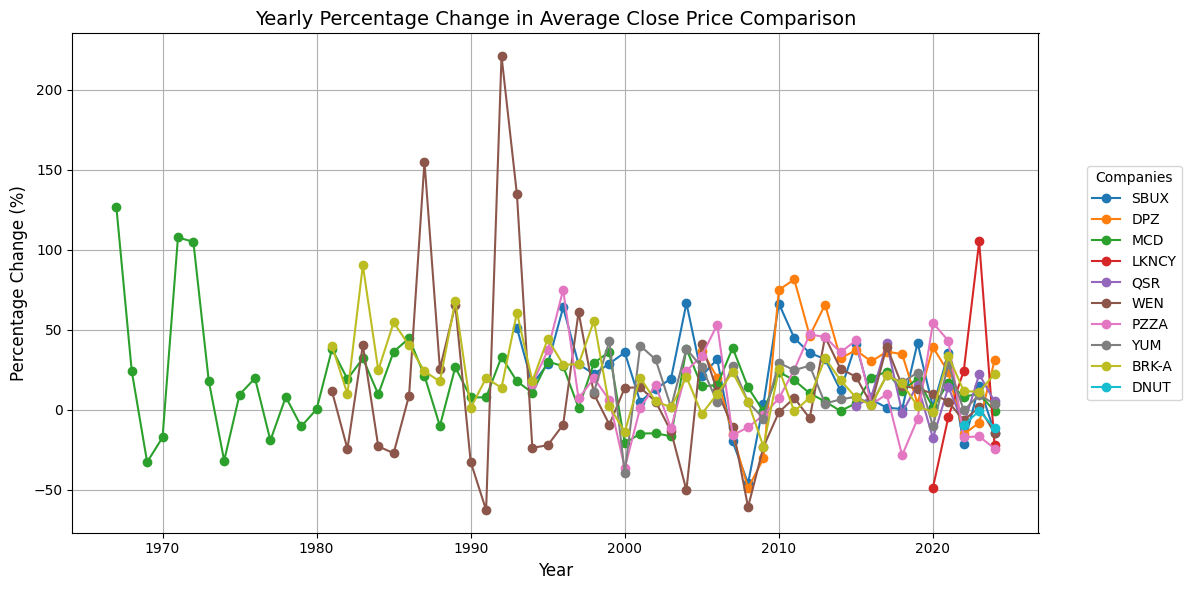

In [65]:
# Compute yearly percentage change in close prices
percentage_change_data = {}

for company in yearly_avg_table.columns[1:]:  # Exclude 'Year' column
    if company != "Company":  # Exclude the "Company" column
        yearly_avg_table[company] = pd.to_numeric(yearly_avg_table[company], errors='coerce')  # Ensure numeric values
        percentage_change = yearly_avg_table[company].pct_change() * 100
        percentage_change_data[company] = percentage_change

# Convert the percentage change data into a DataFrame
percentage_change_df = pd.DataFrame(percentage_change_data)
percentage_change_df['Year'] = yearly_avg_table['Year']

# Plotting the percentage change comparison
plt.figure(figsize=(12, 6))
for company in percentage_change_data.keys():
    valid_data = percentage_change_df[['Year', company]].dropna()  # Drop rows with NA values
    plt.plot(
        valid_data['Year'],
        valid_data[company],
        marker='o',
        label=company
    )

plt.title("Yearly Percentage Change in Average Close Price Comparison", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.legend(
    title="Companies",
    bbox_to_anchor=(1.05, 0.5),  # Position legend to the right of the plot
    loc='center left',  # Centered vertically, left-aligned to the anchor
    borderaxespad=0.0
)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


## Trend Analysis

1. **Maturity**: The post-2000 era demonstrates a significant reduction in volatility for most companies, reflecting their transition into more mature phases of growth. For example, companies like McDonald's (MCD) and Starbucks (SBUX) had largely established their global footprints by the 2000s. With diversified revenue streams across multiple regions, these companies became less vulnerable to economic conditions in any single market. Additionally, their increased business scale and operational efficiency contributed to lower stock price volatility, as illustrated in the graph. 

2. **Economic Cycles (Booms and Recessions)**: The graph captures broader market trends and the influence of economic cycles on performance. The fast-food and beverage sectors, being closely tied to disposable income, are inherently cyclical. Recessionary periods, such as those in the 1980s and 2000s, likely led to earnings volatility and corresponding declines in stock performance, explaining the dips seen in certain years. Conversely, economic boom periods are also evident in the chart. For instance, during the 2010s, nearly all 10 companies displayed consistently positive annual performance, reflecting the favorable economic environment of that decade.

3. **Market Saturation and Innovation**: The stabilization in volatility post-2000 also reflects market saturation within the fast-food and beverage sectors. By this period, many companies had reached their peak expansion in developed markets, limiting opportunities for exponential growth. This saturation necessitated a shift toward innovation to maintain relevance and attract new customers. Strategies such as menu diversification, sustainability initiatives, and the adoption of digital tools (e.g., delivery apps and loyalty programs) likely played a role in sustaining performance. However, the reduced growth potential in saturated markets contributed to the more predictable and less volatile stock performance observed in the graph.


## Justification of Chart Selection
A line graph is the most effective visual tool for presenting the performance of all companies at a glance. As noted above, the differing IPO dates of the companies create challenges for direct comparison due to the varying time horizons. The line graph effectively illustrates these distinct time frames, providing a clear overview despite the differences.

Alternative visualizations, such as pie charts or bar graphs, are unsuitable for this analysis because they fail to capture the fluctuations in annual performance over time. Using these formats would require condensing each company's annual performance data into a single metric, obscuring valuable insights about their actual performance trends.

That said, a key drawback of line graphs is that they can become difficult to interpret when plotting data for 10 companies simultaneously. To address this, we created additional graphics to provide a clearer view of the data. Each graph is accompanied by a brief commentary to enhance understanding.


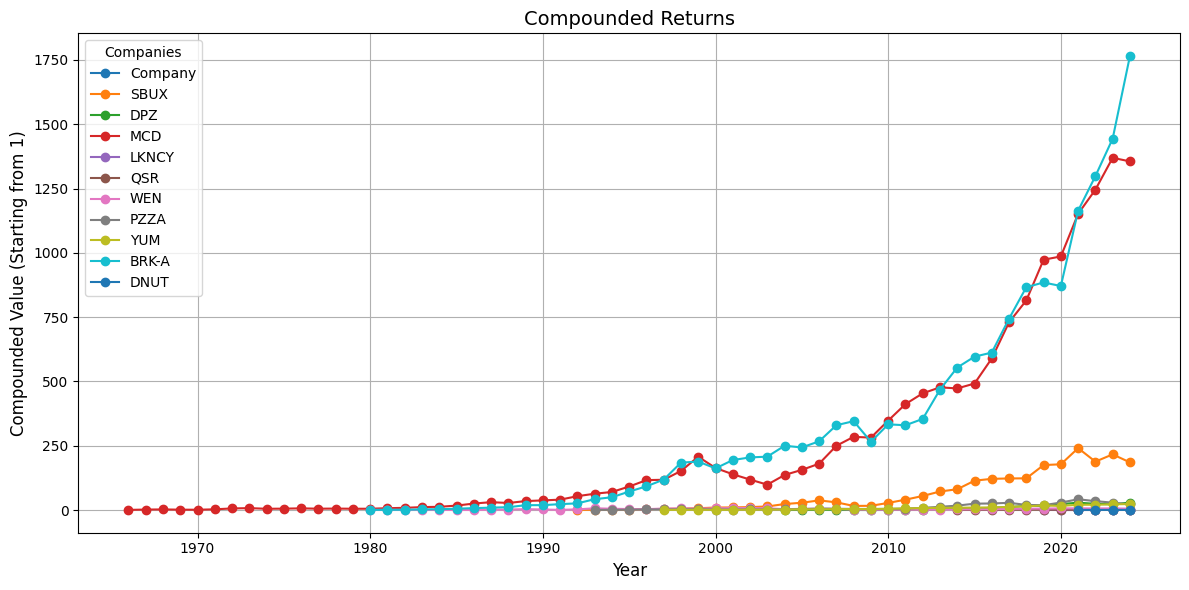

In [66]:
compounded_returns = {}

for company in yearly_avg_table.columns[1:]:  # Exclude 'Year' column
    yearly_avg_table[company] = pd.to_numeric(yearly_avg_table[company], errors='coerce')  # Ensure numeric values
    
    # Calculate percentage change and compounded returns
    percentage_change = yearly_avg_table[company].pct_change().fillna(0)
    compounded_return = (1 + percentage_change).cumprod()
    
    # Keep only the last occurrence of 1 before transitioning to non-1 values
    data = compounded_return.copy()
    one_mask = (data == 1)
    keep_last_one = one_mask & (~one_mask.shift(-1, fill_value=False))
    data[one_mask & ~keep_last_one] = None  # Remove all earlier 1s except the last one
    compounded_returns[company] = data

# Combine all compounded return data into a single DataFrame for plotting
compounded_returns_df = pd.DataFrame(compounded_returns)
compounded_returns_df['Year'] = yearly_avg_table['Year']

# Plotting the compounded returns comparison
plt.figure(figsize=(12, 6))
for company in compounded_returns_df.columns[:-1]:  # Exclude 'Year' column
    valid_data = compounded_returns_df[['Year', company]].dropna()  # Drop rows with NA values for each company
    if not valid_data.empty:  # Ensure data exists for the company
        plt.plot(
            valid_data['Year'],
            valid_data[company],
            marker='o',
            label=company
        )

plt.title("Compounded Returns", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Starting from 1)", fontsize=12)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### Commentary:
The diagram shows the compounded returns for the Closing Price of all 10 companies. Among these, McDonald's (MCD) demonstrates the highest overall performance, indicating it would have been the most profitable investment if purchased at its IPO. However, this conclusion may be misleading... The following shows a comparison of the performance when taking a look at the Adjusted Closing Price. 

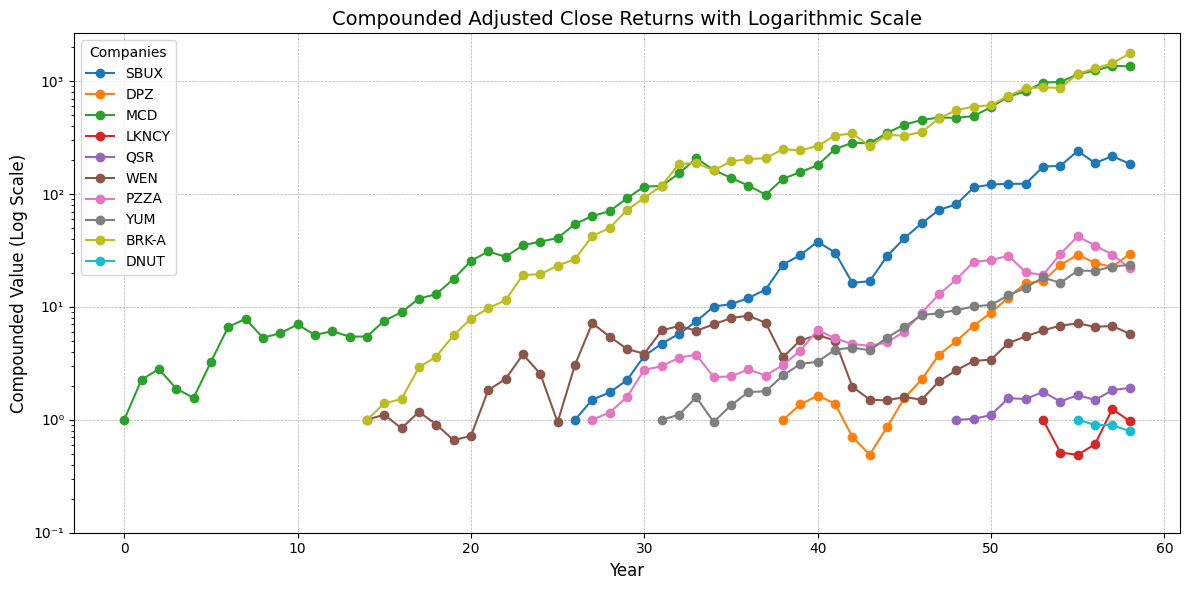

In [82]:
# Adjusting data for plotting (handling negative, zero, and equal-to-1 values except the last 1)
adjusted_compounded_returns_df = compounded_returns_df.copy()

# Iterate through columns to handle values
for column in adjusted_compounded_returns_df.columns:
    if column != 'Year' and column != 'Company':  # Exclude 'Year' and 'Company' columns
        # Work on a copy of the column to avoid SettingWithCopyWarning
        data = adjusted_compounded_returns_df[column].copy()
        
        # Replace non-positive values with NaN
        data[data <= 0] = None
        
        # Identify and keep only the last 1 before transition to non-1 values
        one_mask = (data == 1)
        keep_last_one = one_mask & (~one_mask.shift(-1, fill_value=False))
        data[one_mask & ~keep_last_one] = None  # Remove all other 1s except the last one
        
        # Assign the modified data back to the DataFrame
        adjusted_compounded_returns_df[column] = data

# Plotting the adjusted data with a logarithmic y-axis scale
plt.figure(figsize=(12, 6))
for company in adjusted_compounded_returns_df.columns:
    if company != 'Year' and company != 'Company':  # Exclude 'Year' and 'Company' columns
        plt.plot(
            adjusted_compounded_returns_df.index, 
            adjusted_compounded_returns_df[company], 
            marker='o', 
            label=company
        )

# Chart formattings
plt.title("Compounded Adjusted Close Returns with Logarithmic Scale", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Log Scale)", fontsize=12)
plt.yscale("log")  # Logarithmic scale for the y-axis
plt.yticks(
    [10**-1, 10**0, 10**1, 10**2, 10**3],  # Define power-of-10 ticks
    labels=["10⁻¹", "10⁰", "10¹", "10²", "10³"]  # Custom labels for ticks
)
plt.grid(True, which="major", linestyle="--", linewidth=0.5)
plt.legend(title="Companies")
plt.tight_layout()

# Display the plot
plt.show()


### Commentary:
The compounded returns for the adjusted prices, presented on an exponential scale, reveal a different perspective. Notably, Berkshire Hathaway (BRK-A) emerges as the best-performing stock when measured from its IPO. Interestingly, a quick Google search clarifies the discrepancy between Close and Adjusted Close prices: since its IPO in 1965, McDonald's has undergone a total of 12 stock splits, artificially diluting the stock's nominal value. Consequently, relying solely on the Closing Price can provide a misleading representation of performance. Based on these findings, we have decided to compute and analyze both Close and Adjusted Close values in the following exercises.

### **NOTE**: 
The following shows diagrams for both the **Close and Adjusted Close values** to provide a comprehensive view of stock performance. The Adjusted Close offers a more comparable dataset as it accounts for the effects of dividends and stock splits, which can otherwise distort average returns and performance metrics.

Dividends and stock splits often obscure the true underlying stock performance by introducing fluctuations in the raw closing price. This is particularly relevant for companies like Wendy's (WEN) and Starbucks (SBUX), which have undergone multiple stock splits in the past. While these splits caused significant changes in the closing price, they did not impact the company’s market capitalization, highlighting the importance of using adjusted values for accurate analysis.

To ensure full transparency and present both perspectives, we have included graphs for both the Close and Adjusted Close values. This approach allows for a clear comparison between the raw price trends and the normalized, performance-adjusted data.

# Bar Graph

We decided to present the data in a different format because, so far, we have only analyzed it using a constant time scale starting from McDonald's IPO in 1965. However, this approach provides limited insights, as it does not account for the average annual performance of each company. To better understand which business has delivered the highest average returns, we created a bar graph analysis for both Close and Adjusted Close values. This approach offers a clearer comparison of annualized performance across companies.

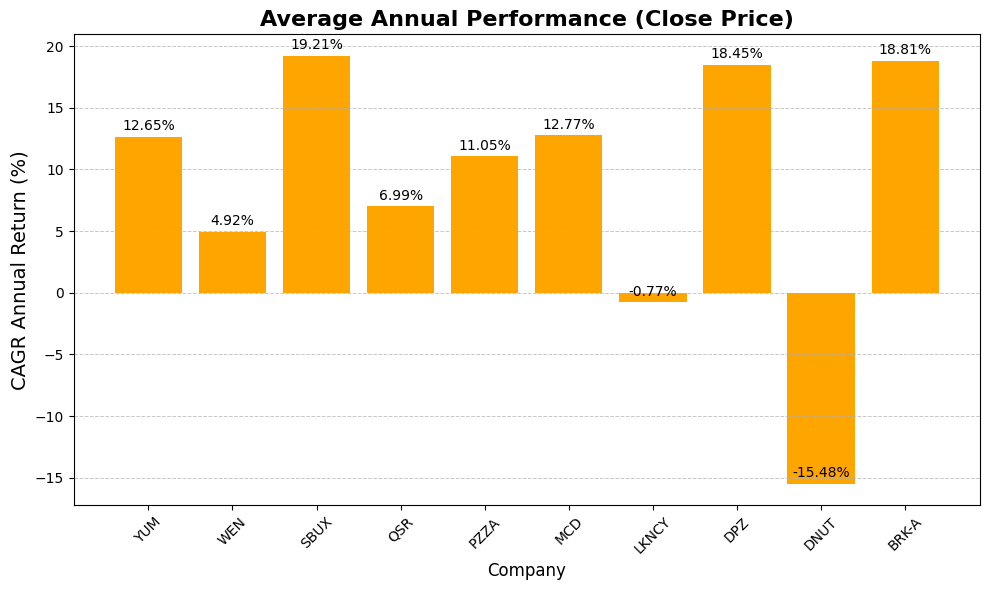

In [147]:
# CLOSE PRICE
# Function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Function to compute CAGR for a single stock
def compute_cagr(data, company_name, threshold):
    # Convert Date to datetime and sort data by Date
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
    
    # Filter out data points above the threshold
    data = data[data['Close'] <= threshold]
    
    if data.empty:
        return None  # Handle cases where filtered data is empty
    
    # Get first and last adjusted close values
    start_date = data['Date'].iloc[0]
    end_date = data['Date'].iloc[-1]
    start_value = data['Close'].iloc[0]
    end_value = data['Close'].iloc[-1]
    
    # Calculate the number of years between the first and last date
    periods = (end_date - start_date).days / 365.25  # Accounting for leap years
    
    # Compute CAGR
    cagr = calculate_cagr(start_value, end_value, periods)
    return company_name, cagr

# Dictionary to store CAGR values
cagr_values = {}

# Compute CAGR for each company
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Close' column.")
        continue
    
    # Apply special handling for BRK-A to make it more appropriate
    threshold = outlier_thresholds.get(company, np.inf)  # Use a high default threshold
    if company == "BRK-A":
        threshold = 500000  # Assume a realistic high value for BRK-A
    
    result = compute_cagr(data, company, threshold)
    if result:
        company_name, cagr = result
        cagr_values[company_name] = cagr

# Create a bar chart for CAGR values
plt.figure(figsize=(10, 6))
plt.bar(cagr_values.keys(), cagr_values.values(), color='orange')
plt.xlabel("Company", fontsize=12)
plt.ylabel("CAGR Annual Return (%)", fontsize=14)
plt.title("Average Annual Performance (Close Price)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add labels for each bar
for i, (company, cagr) in enumerate(cagr_values.items()):
    plt.text(i, cagr + 0.3, f"{cagr:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

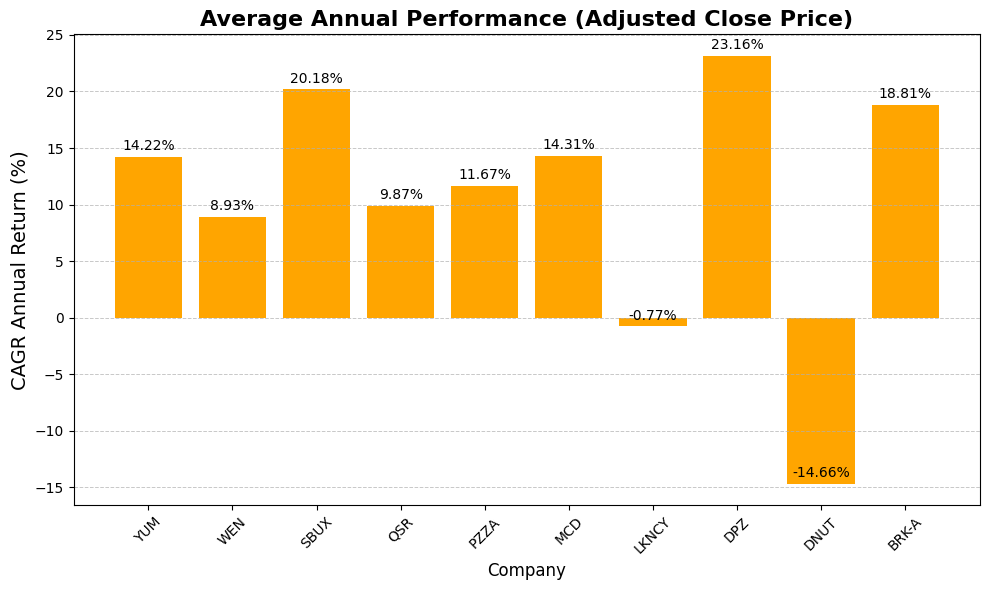

In [148]:
# ADJUSTED CLOSE
# Function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Function to compute CAGR for a single stock
def compute_cagr(data, company_name, threshold):
    # Convert Date to datetime and sort data by Date
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
    
    # Filter out data points above the threshold
    data = data[data['Adj Close'] <= threshold]
    
    if data.empty:
        return None  # Handle cases where filtered data is empty
    
    # Get first and last adjusted close values
    start_date = data['Date'].iloc[0]
    end_date = data['Date'].iloc[-1]
    start_value = data['Adj Close'].iloc[0]
    end_value = data['Adj Close'].iloc[-1]
    
    # Calculate the number of years between the first and last date
    periods = (end_date - start_date).days / 365.25  # Accounting for leap years
    
    # Compute CAGR
    cagr = calculate_cagr(start_value, end_value, periods)
    return company_name, cagr

# Dictionary to store CAGR values
cagr_values = {}

# Compute CAGR for each company
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    if 'Date' not in data.columns or 'Adj Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Adj Close' column.")
        continue
    
    # Apply special handling for BRK-A to make it more appropriate
    threshold = outlier_thresholds.get(company, np.inf)  # Use a high default threshold
    if company == "BRK-A":
        threshold = 500000  # Assume a realistic high value for BRK-A
    
    result = compute_cagr(data, company, threshold)
    if result:
        company_name, cagr = result
        cagr_values[company_name] = cagr


# Create a bar chart for CAGR values
plt.figure(figsize=(10, 6))
plt.bar(cagr_values.keys(), cagr_values.values(), color='orange')
plt.xlabel("Company", fontsize=12)
plt.ylabel("CAGR Annual Return (%)", fontsize=14)
plt.title("Average Annual Performance (Adjusted Close Price)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add labels for each bar
for i, (company, cagr) in enumerate(cagr_values.items()):
    plt.text(i, cagr + 0.35, f"{cagr:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Commentary:
This bar graph illustrates the CAGR returns and provides a different perspective on performance. It reveals that the best-performing stock, based on the CAGR of the Adjusted Close Price, is Dominos Pizza (DPZ), contrary to the earlier graphs that suggested SBUX and MCD as top performers. This is because DPZ has delivered its performance over a shorter period of time, leading to higher CAGR returns. 

Interestingly, analyzing the Close Price values paints a slightly different picture. Starbucks (SBUX) emerges with the highest CAGR at 19.21%, followed by Domino's Pizza (DPZ) and Berkshire Hathaway (BRK-A) Again, these deviating results between Close and Adjusted Close can be explained by stock splits and dividends. 

### 6. For each company, create a plot showing the range of prices for each month.
- Justify the chart selection.


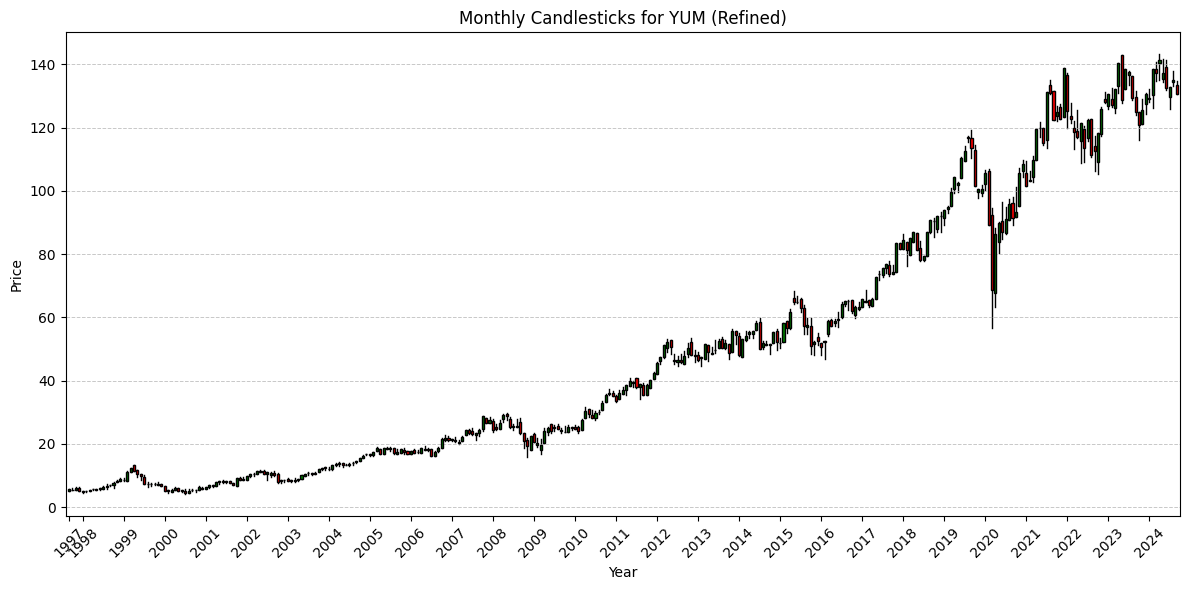

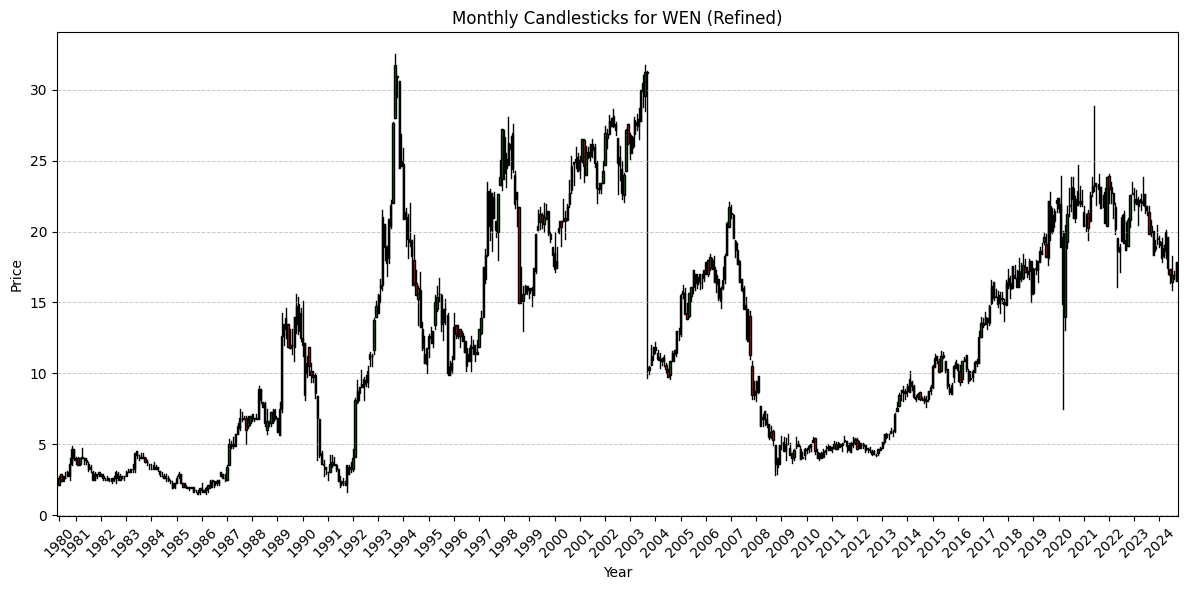

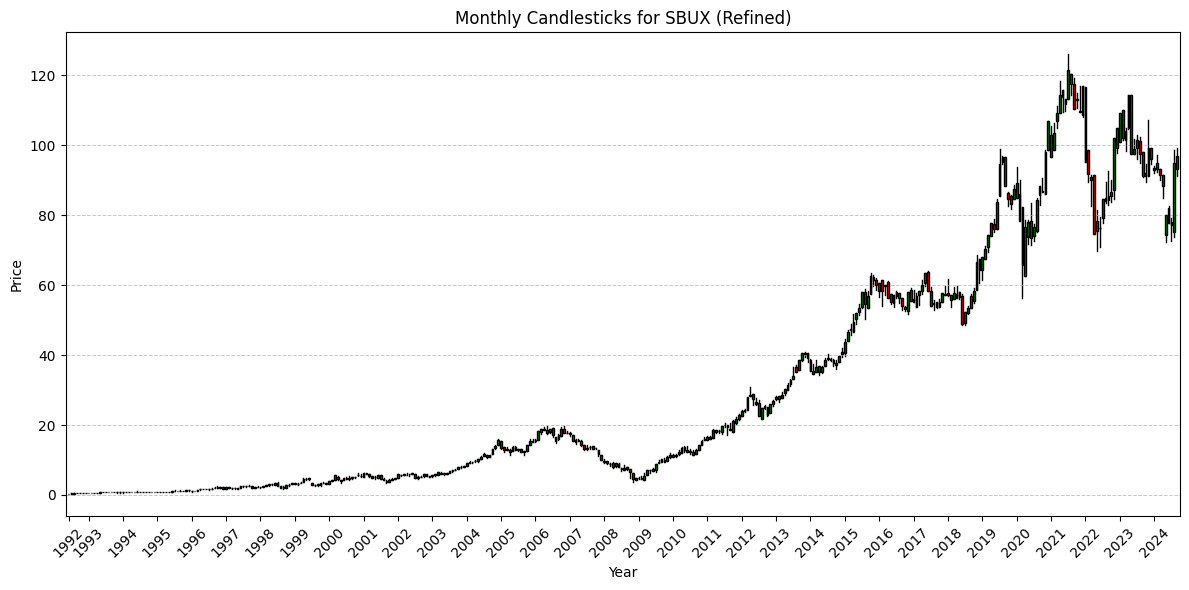

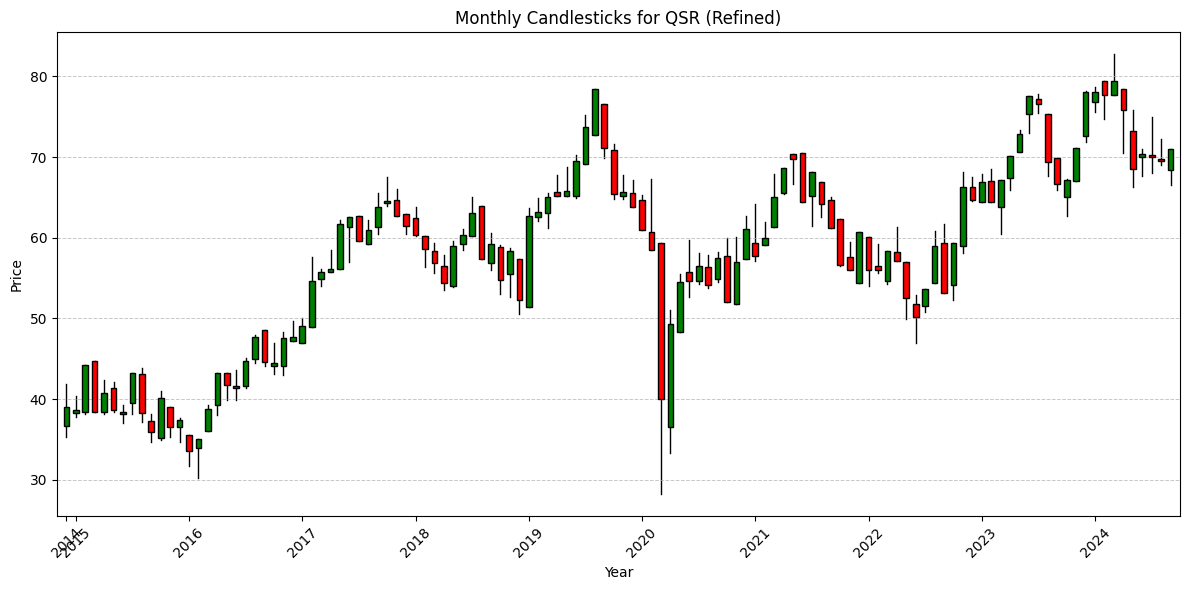

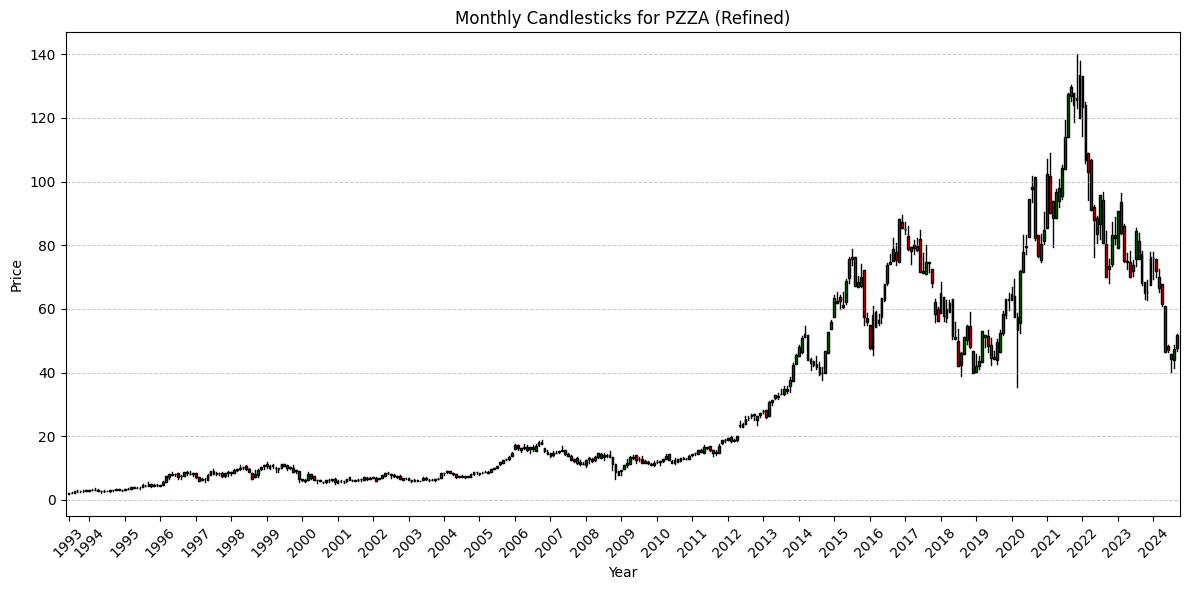

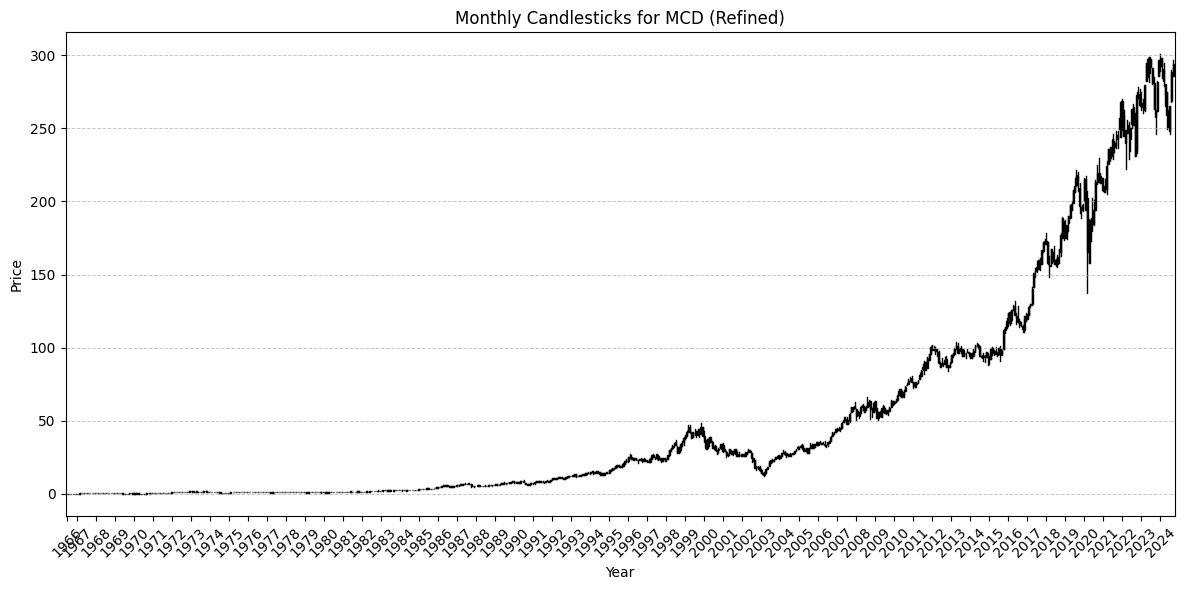

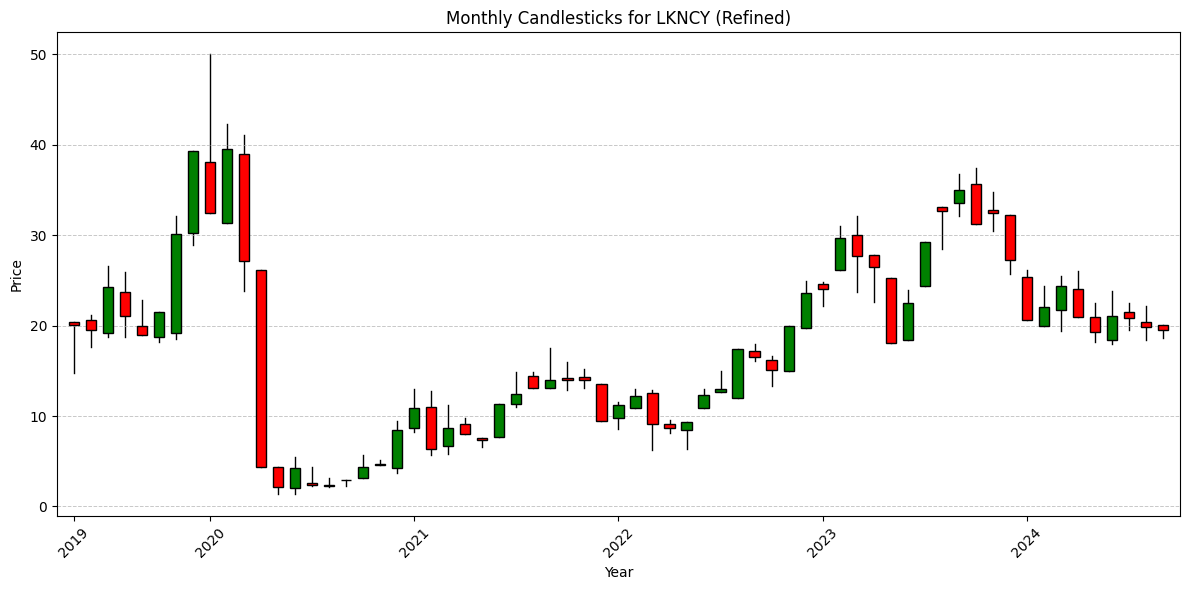

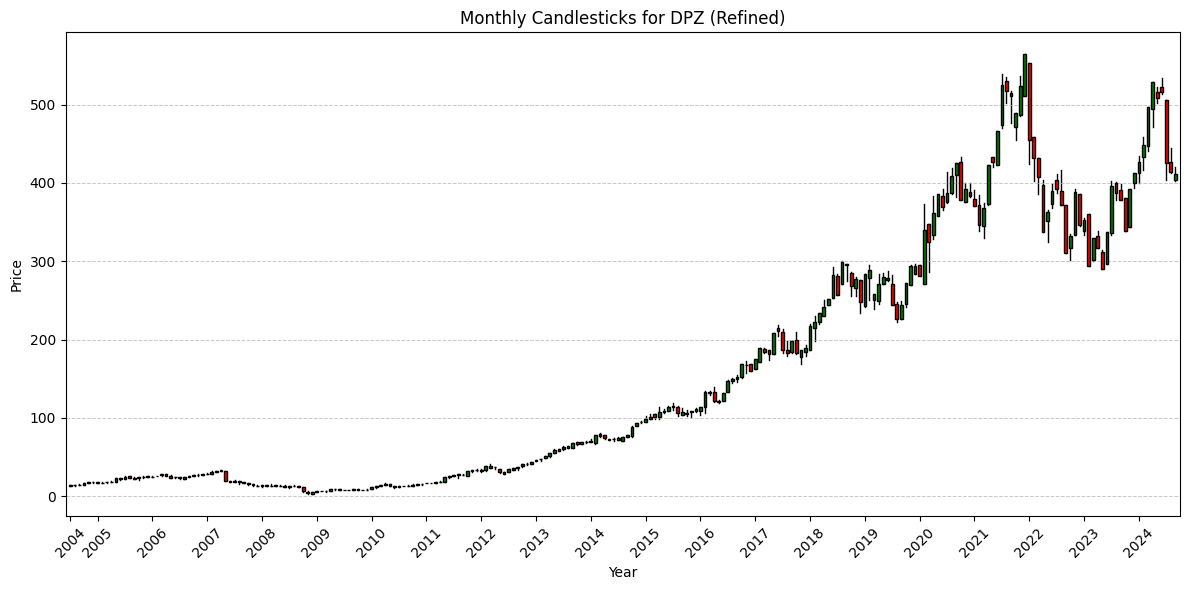

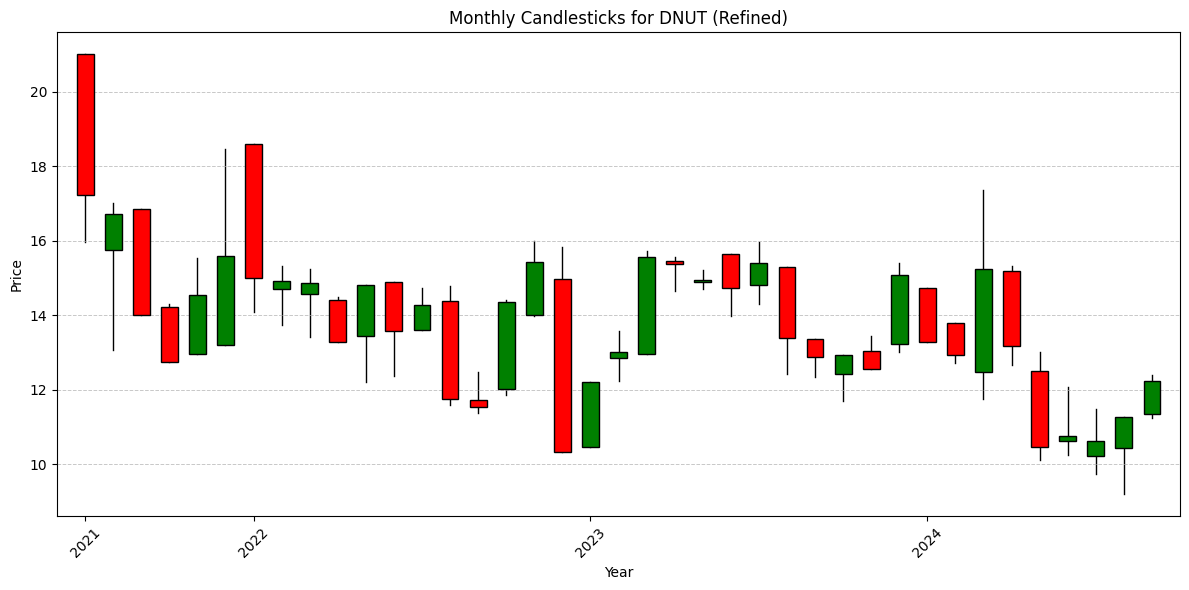

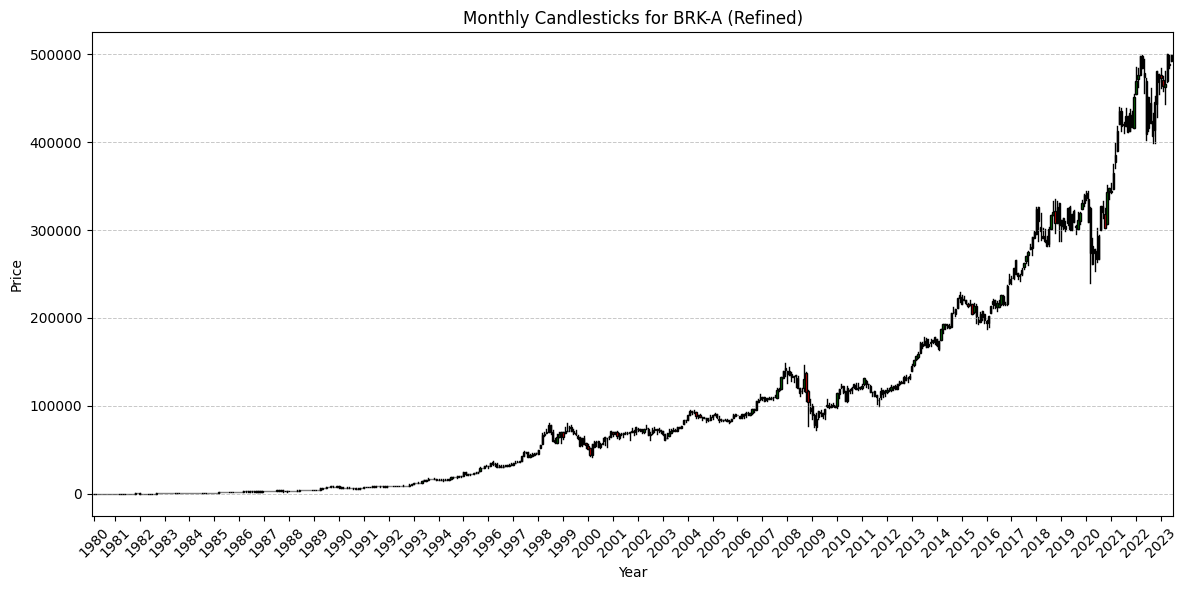

In [74]:
# Adjusting the candlestick charts to show only the year on the x-axis and refine BRK-A visualization
def plot_candlesticks_refined(data, company_name, threshold):
    # Convert Date to datetime and extract year-month for grouping
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year  # Extract year for simpler x-axis labels
    data['YearMonth'] = data['Date'].dt.to_period('M')
    
    # Remove data points above the threshold
    data = data[data['Close'] <= threshold]
    
    # Group by year-month and calculate open, close, high, and low prices
    monthly_data = data.groupby('YearMonth').agg(
        Open=('Close', 'first'),
        Close=('Close', 'last'),
        High=('Close', 'max'),
        Low=('Close', 'min'),
        Year=('Year', 'first')  # Keep year for x-axis labeling
    ).reset_index()
    
    # Determine colors based on monthly performance
    monthly_data['Color'] = ['green' if close > open_ else 'red' 
                             for open_, close in zip(monthly_data['Open'], monthly_data['Close'])]
    
    # Plot candlesticks
    plt.figure(figsize=(12, 6))
    for i, row in monthly_data.iterrows():
        # Plot wick (high-low) in black
        plt.plot([i, i], [row['Low'], row['High']], color='black', linewidth=1, zorder=1)
        # Plot candle body (open-close) in green/red
        plt.gca().add_patch(plt.Rectangle((i - 0.3, min(row['Open'], row['Close'])),
                                          0.6, abs(row['Close'] - row['Open']),
                                          color=row['Color'], ec='black', zorder=2))
    
    # Formatting the plot
    plt.title(f"Monthly Candlesticks for {company_name} (Refined)")
    plt.xlabel("Year")
    plt.ylabel("Price")
    
    # Simplify x-axis to show only years
    years = monthly_data['Year'].unique()
    year_positions = [monthly_data[monthly_data['Year'] == year].index[0] for year in years]
    plt.xticks(ticks=year_positions, labels=years, rotation=45)
    
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.xlim(-1, len(monthly_data))  # Add some spacing for visual appeal
    plt.tight_layout()
    plt.show()

# Generate the refined candlestick charts
for company, file_path in file_paths.items():
    # Load data
    data = pd.read_csv(file_path)
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print(f"File for {company} is missing 'Date' or 'Close' column.")
        continue
    
    # Apply special handling for BRK-A to make it more appropriate
    threshold = outlier_thresholds[company]
    if company == "BRK-A":
        threshold = 500000  # Assume a realistic high value for BRK-A
    
    plot_candlesticks_refined(data, company, threshold)


### Why Candlesticks? 

We chose **candlestick charts** as our chart selection because they provide the most comprehensive visualization of monthly trading data, offering insights that go beyond simple averages or trends. A candlestick chart conveys multiple layers of information in a single visualization, making it particularly effective for analyzing stock performance over time.

The **color of the candle** immediately indicates whether a stock increased or decreased in value during the month. Specifically, a green candle shows that the stock's value increased (the closing price was higher than the opening price), while a red candle signifies a decrease in value (the closing price was lower than the opening price). This visual distinction allows users to quickly identify positive or negative trends without needing to analyze numerical data.

The **body of the candle** represents the difference between the opening and closing prices for the month. A tall body indicates significant price movement, suggesting a month of strong activity, while a short body reflects relatively stable performance. This feature highlights the degree of change in stock value within a given month.

The **wicks** (also known as shadows) of the candlestick add further detail by showing the stock's high and low prices during the month. The top wick represents the highest price reached, while the bottom wick shows the lowest price. These elements provide critical insights into the volatility of the stock, revealing how much its price fluctuated over the month.



### 7. Create a plot showing the relationship between trading volume and the `Close` price for a selected company.
- Add insights about the pattern and justify your chart selection.


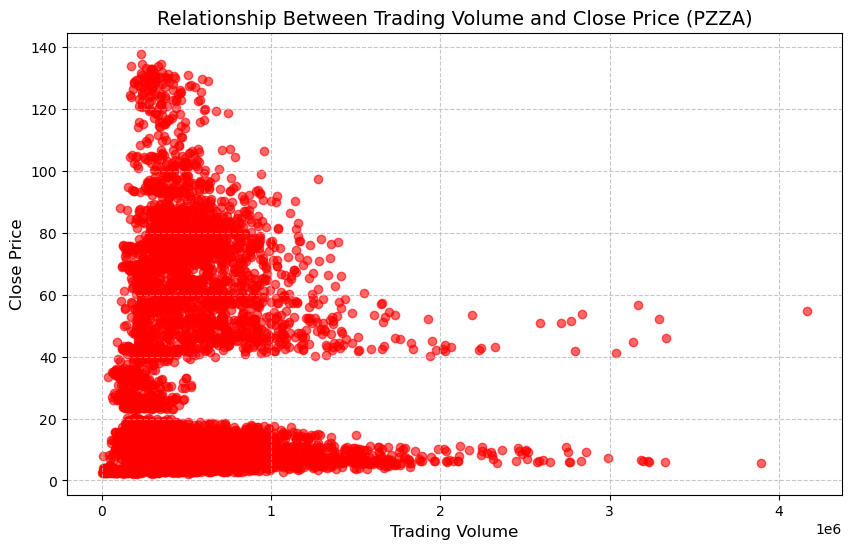

In [782]:
# Find the DataFrame for the company "PZZA"
pzza_data = [df for df in dataframes if df['Company'].iloc[0] == 'PZZA'][0]  # Filter by company name

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pzza_data['Volume'], pzza_data['Close'], alpha=0.6, color='red')
plt.title('Relationship Between Trading Volume and Close Price (PZZA)', fontsize=14)
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Insights about the pattern :- 

1. **Relationship Observation:**

    - The scatter plot reveals a non linear pattern and most data points are clustered at lower trading values (close to 0) and lower Close Prices (under 100), indicating that low trading activity is common for PZZA. 

2. **Distinct Clusters:**

    - There are horizontal clusters in the data such as around Close Prices of 20, 60 and 100, suggesting that these prices levels may be recurring or significant for the company. 

3. **Spare High Volume Activity:**

    - Trading volumes exceeding 2.5 million are rare and such instances occur accross a broad range of Close Prices. 


#### Justification for Chart Selection:

1. **Shows Relationships Carefully:**

    -  A scatter plot is the best choice for visualizing the relationship between two continuous variables—Trading Volume and Close Price—allowing us to observe patterns, clusters, and outliers effectively.
    
2.  **Highlights Trends and Anomalies:** 

    - It enables easy identification of trends and outliers which are critical for analysis.

3.  **Avoids Misrepresentation:**

    -  Other charts, like bar or line plots, would not work well since the data does not follow a time sequence or a category-based structure. 



### 8. For each company, identify the month with the highest total trading volume.
- Display the results in a summary table, showing the month and total volume.

In [783]:
# Dictionary to store results
results = {"Company": [], "Highest Volume Month": [], "Total Volume": []}

for df in dataframes:
    # Extract the company name
    company_name = df["Company"].iloc[0]

    # Group by 'Month' and calculate total volume
    monthly_volume = df.groupby("Month")["Volume"].sum()

    # Find the month with the highest trading volume
    max_volume_month = monthly_volume.idxmax()
    max_volume = monthly_volume[max_volume_month]

    # Append to results dictionary
    results["Company"].append(company_name)
    results["Highest Volume Month"].append(max_volume_month)
    results["Total Volume"].append(round(max_volume / 1e6, 2))  # Convert to millions and round

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False))


KeyError: 'Month'

### 9. Merge the datasets for all companies into a single dataset, one for each year.
- Print the structure of the combined dataset.
- Ensure proper alignment and handling of missing values.


### 10. For each company:
- Calculate the spread between the `High` and `Low` prices for each day.
- Calculate the average spread for each company and visualize the result in a chart.
- Justify the chart selection.
- Identify which companies exhibit the largest spreads and provide insights into their values.
